# Домашнее задание (10 баллов)

1. (2 балла) Закончить реализацию `ClassificationDecisionTree` в decision_tree (реализовать feature_importance_, проверить корректность predict) и `RandomForestClassifier` в random_forest (predict/predict_proba). Обратите внимение, что в random_forest в качестве `base_estimator` предполагается использовать `DecisionTreeClassifier` из sklearn, использовать вашу реализацию решающего дерева необязательно. <br> Запуск тестов 
- `python -m unittest discover sem_dt_rf/decision_tree/tests`
- `python -m unittest discover sem_dt_rf/random_forest/tests`
 

In [325]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


2. (1 балл) Для регрессионного дерева необходимо использовать такой критерий:
    $$H(R) = \min_c \frac{1}{|R|} \sum_{(x_i, y_i) \in R} (y_i - c)^2$$
    
    Докажите, что минимум H(R) достигается при $c$:

    $$ c = \frac{1}{|R|} \sum_{(x_j, y_j) \in R} y_j$$

Функция выпуклая(вторая производная равна 2), поэтому если её первая производная в точке равна 0, то это точка минимума.

$$H'(c) = \frac{2}{|R|}\sum_{i=1}^n {(c - y_i)} = 0$$
$$2c = \frac{2}{|R|}\sum_{i=1}^n {y_i}$$
$$c = \frac{1}{|R|}\sum_{i=1}^n {y_i}$$

Что требовалось доказать

3. (3 балла) Реализуйте регрессионное дерево. В качестве критерия необходимо использовать критерий, определённый в пункте 2. В качестве функции выдачи результатов необходимо использовать среднее значение ответов по всем объектам в листе.

    Сгенерируйте однопризнаковую выборку для тестирования дерева и покажите работу дерева на этой выборке (пример см. ниже, можно использовать свою версию). Отобразите на одном графике значения алгоритма и точки. Что меняется при изменении параметра глубины? Сделайте выводы.

In [1]:
#Реализация регрессионного дерева находится в sem_dt_rf/decision_tree/decision_tree.py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# generate example
x_shape = 300
x = np.arange(x_shape) / 100
y = x**3 * np.sin(x**3) + np.random.random(x_shape)

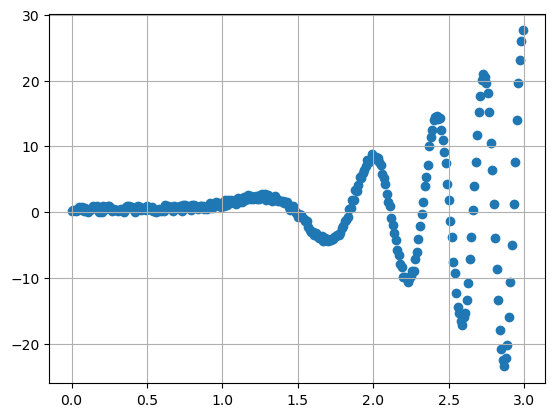

In [3]:
plt.scatter(x, y)
plt.grid()
plt.show()

In [4]:
from sem_dt_rf.decision_tree.decision_tree import RegressionDecisionTree 

In [5]:
tree, predicts = [], []

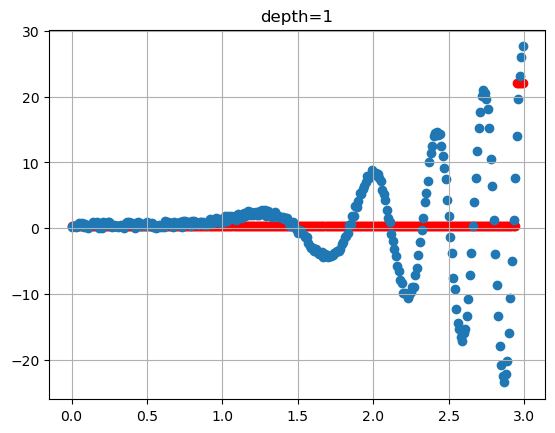

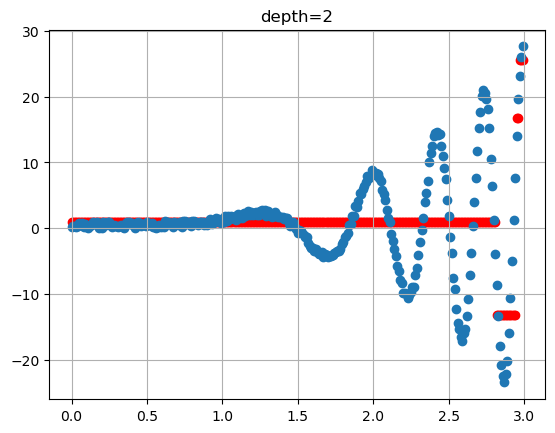

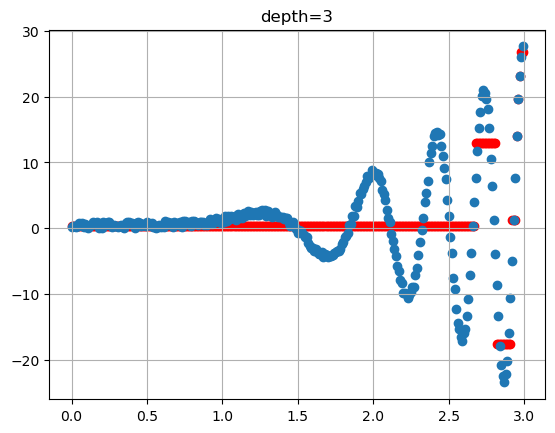

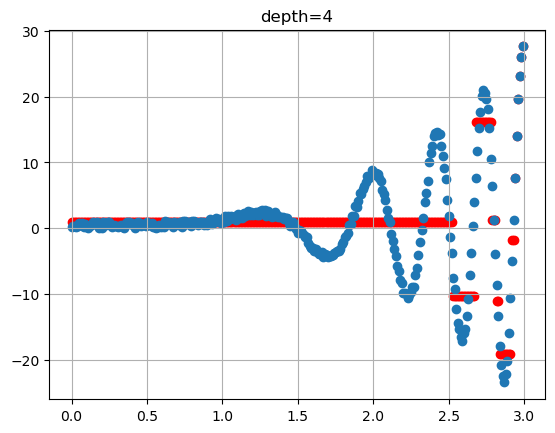

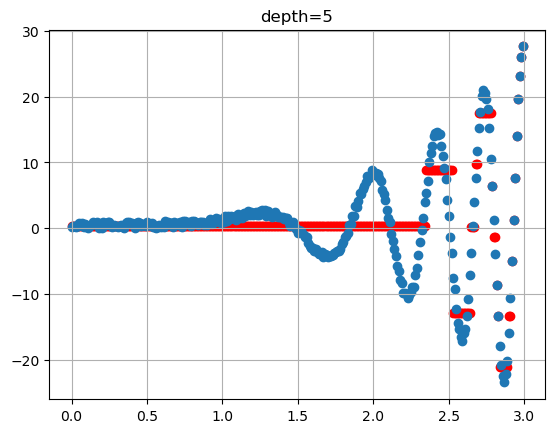

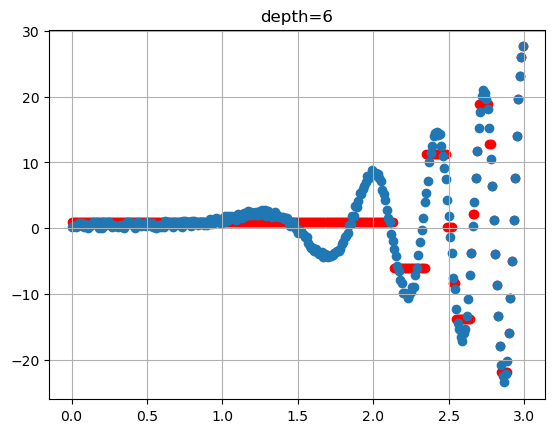

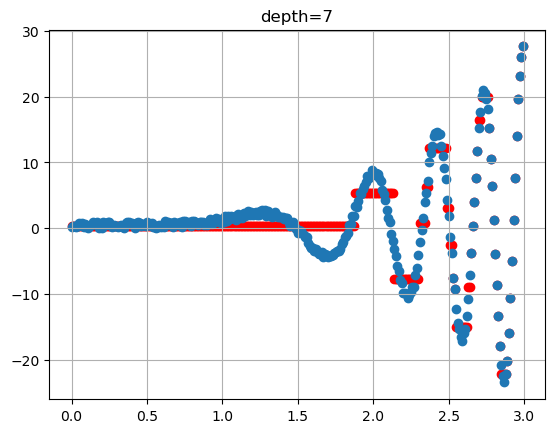

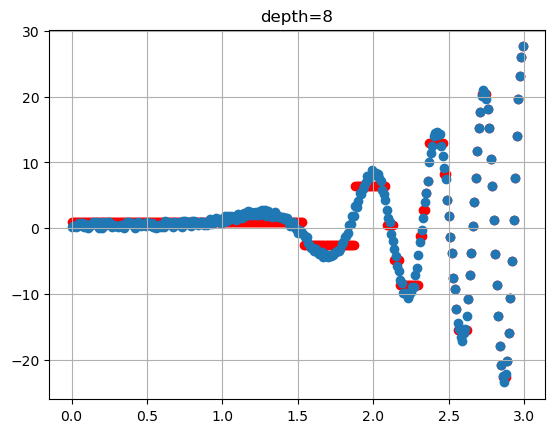

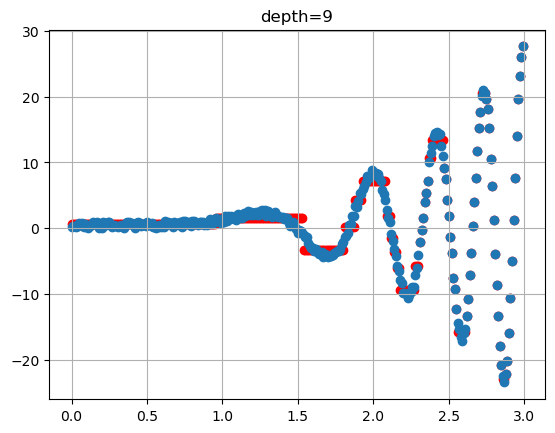

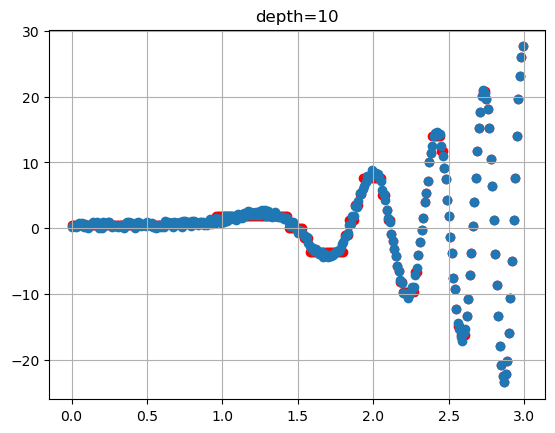

In [6]:
for i in range(10):
    reg_tree = RegressionDecisionTree (max_depth=i + 1, min_leaf_size=1)
    reg_tree.fit(x, y)
    predictions = reg_tree.predict(x)
    plt.scatter(x, predictions, color = 'red')
    plt.scatter(x, y)
    plt.grid()
    plt.title(f"depth={i+1}")
    plt.show()
    tree.append(reg_tree)
    predicts.append(predictions)

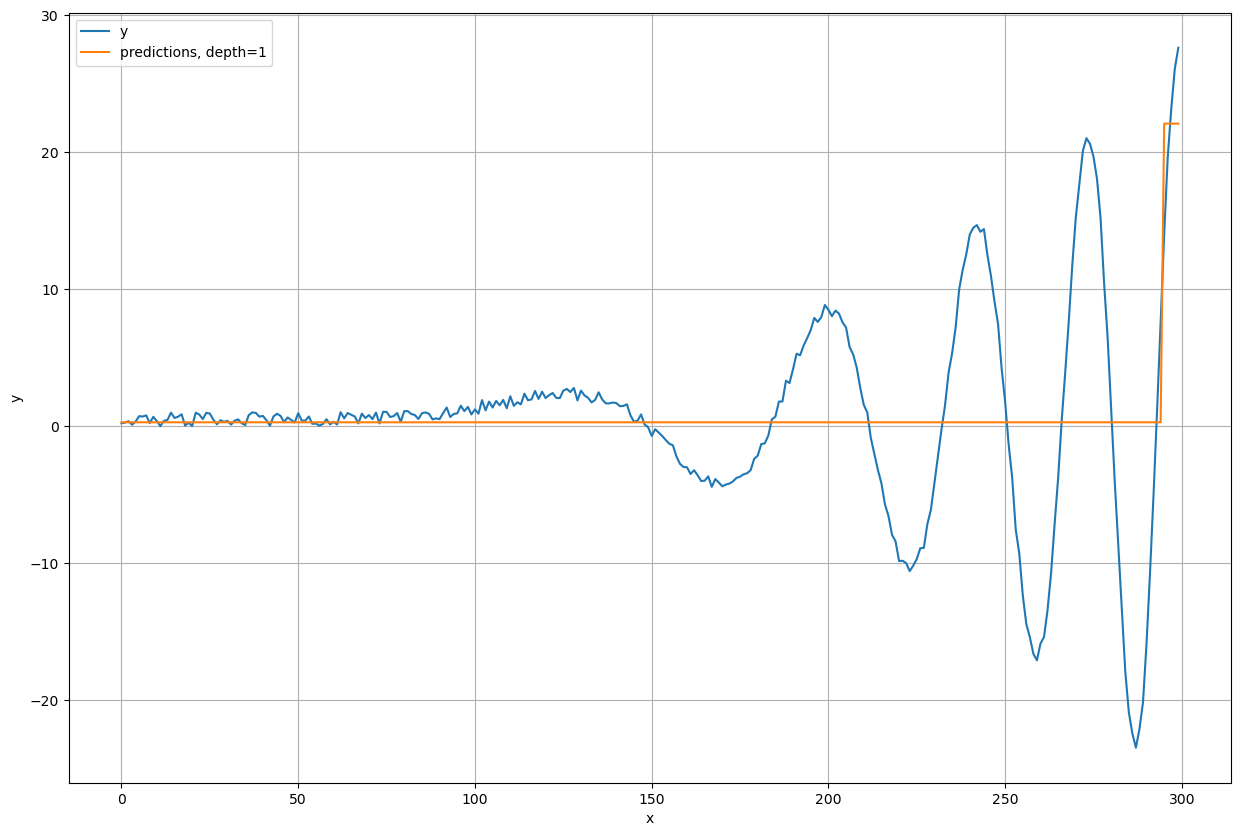

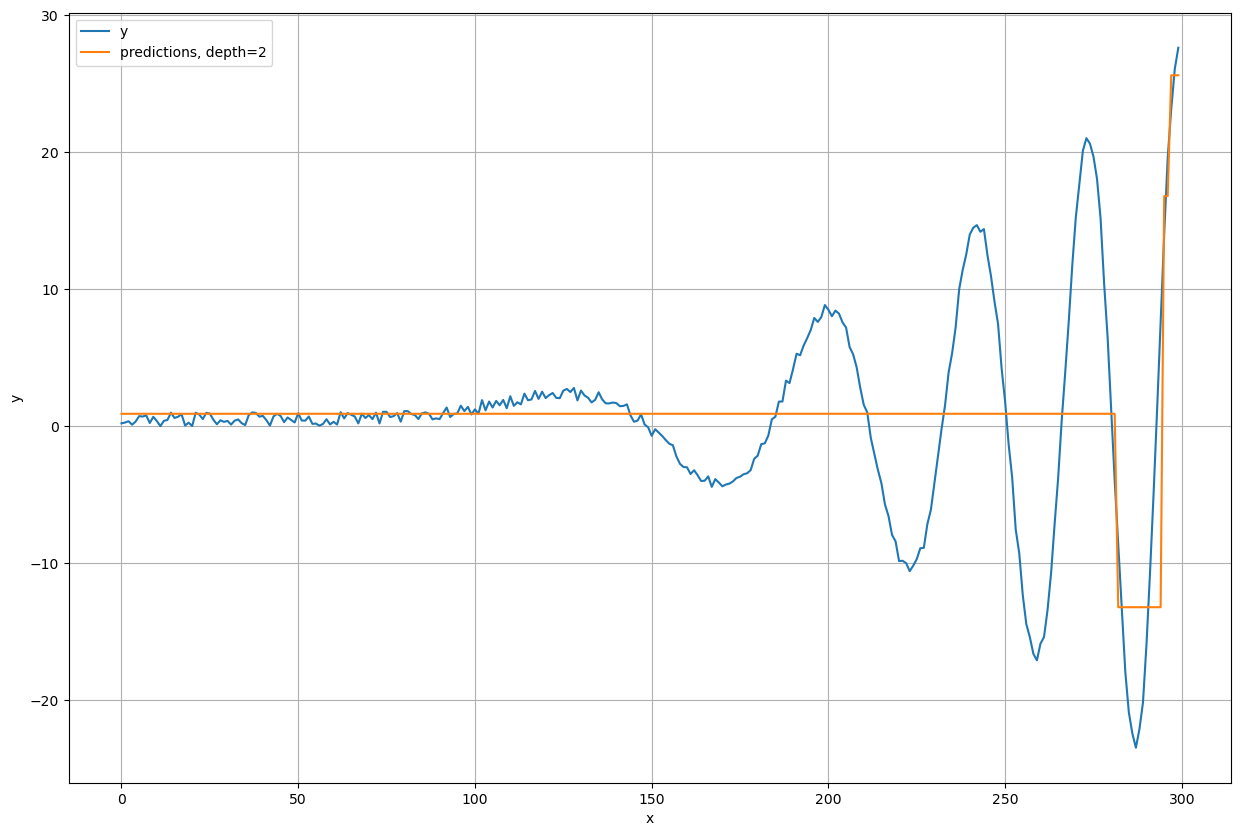

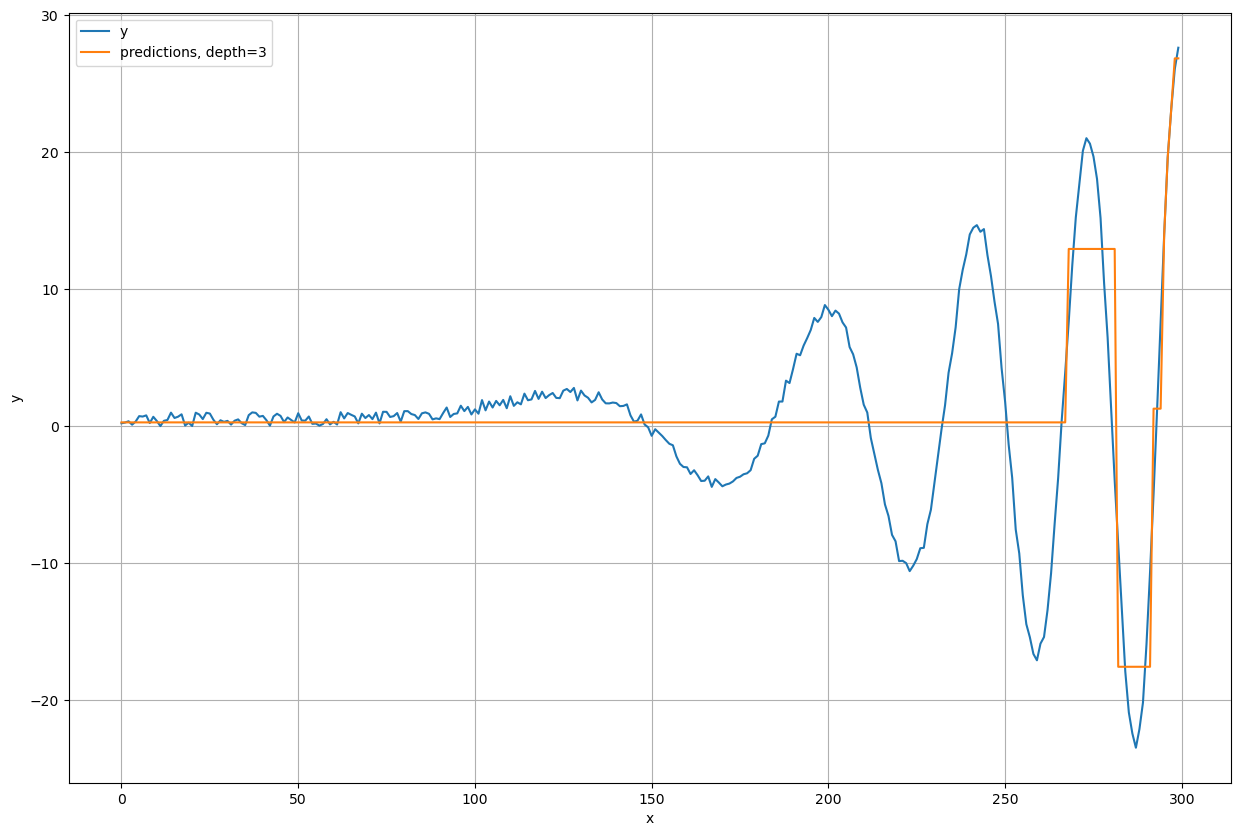

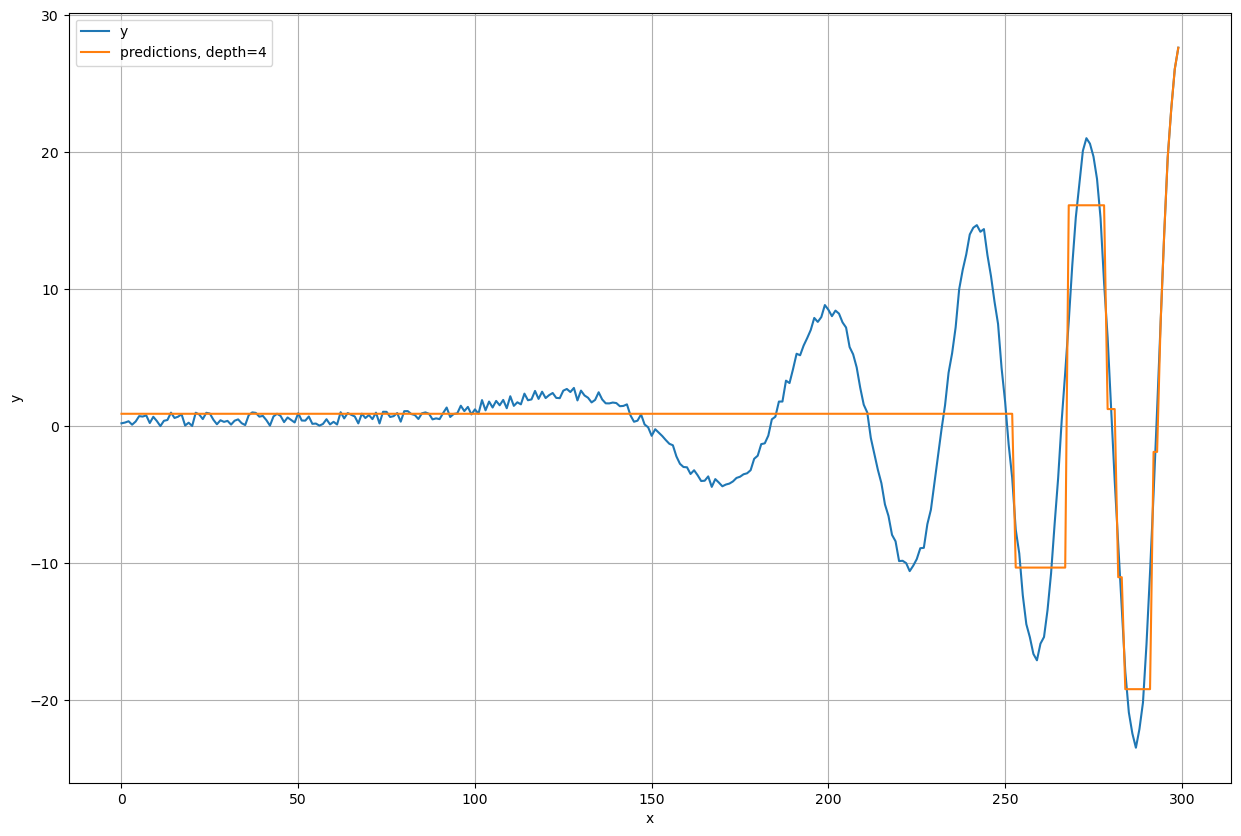

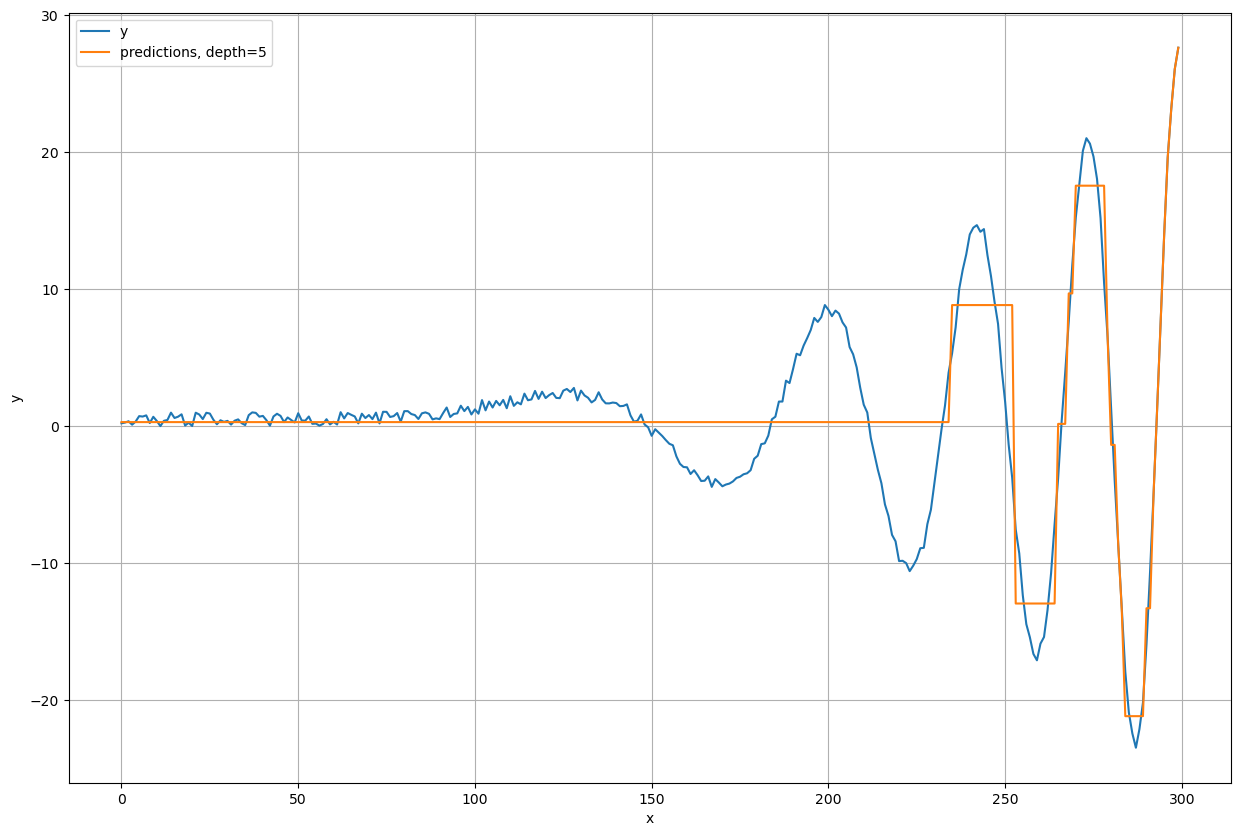

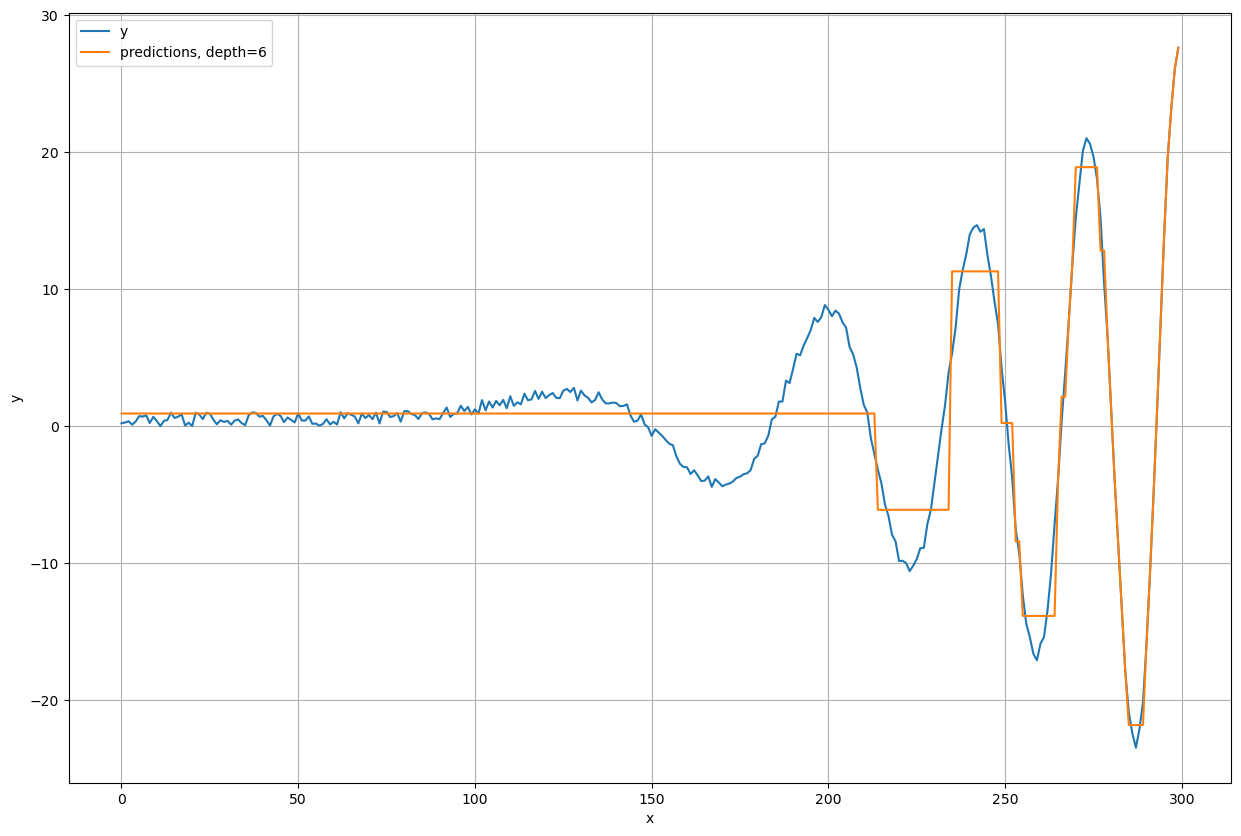

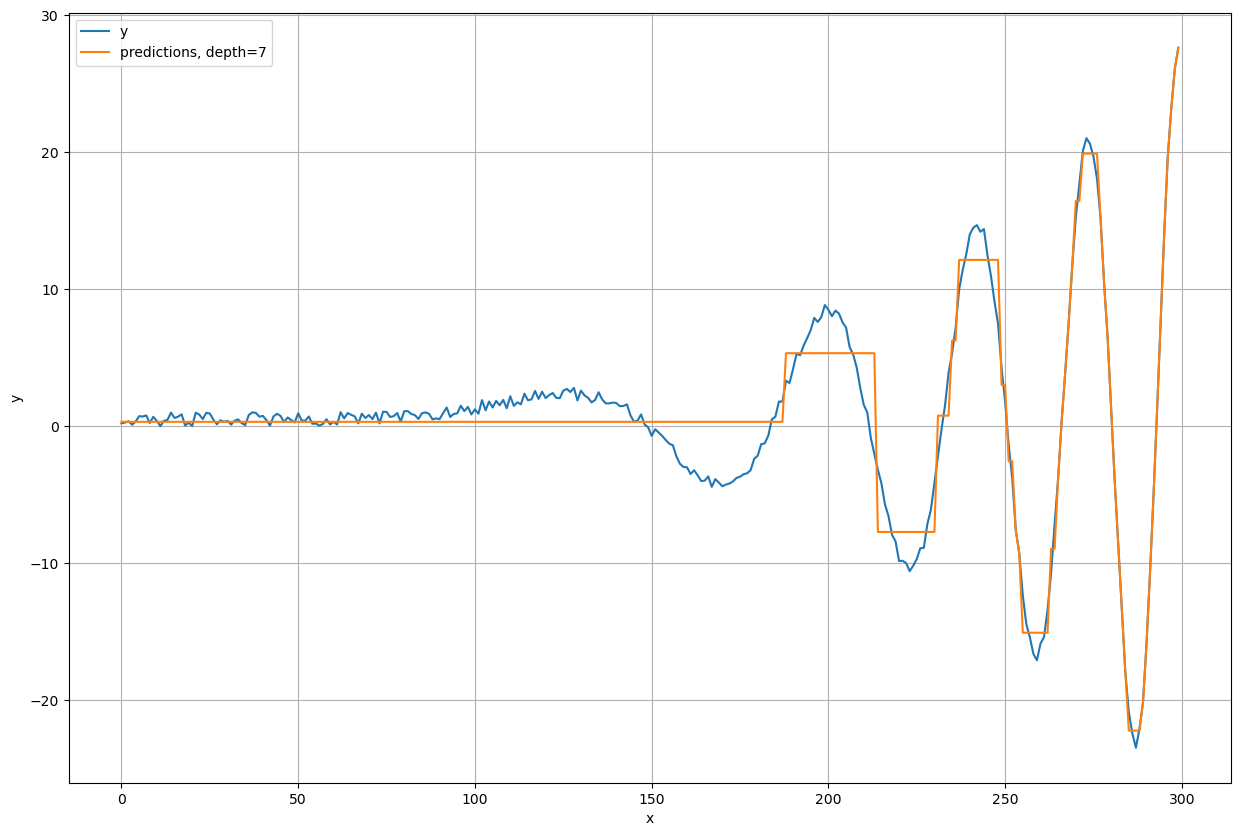

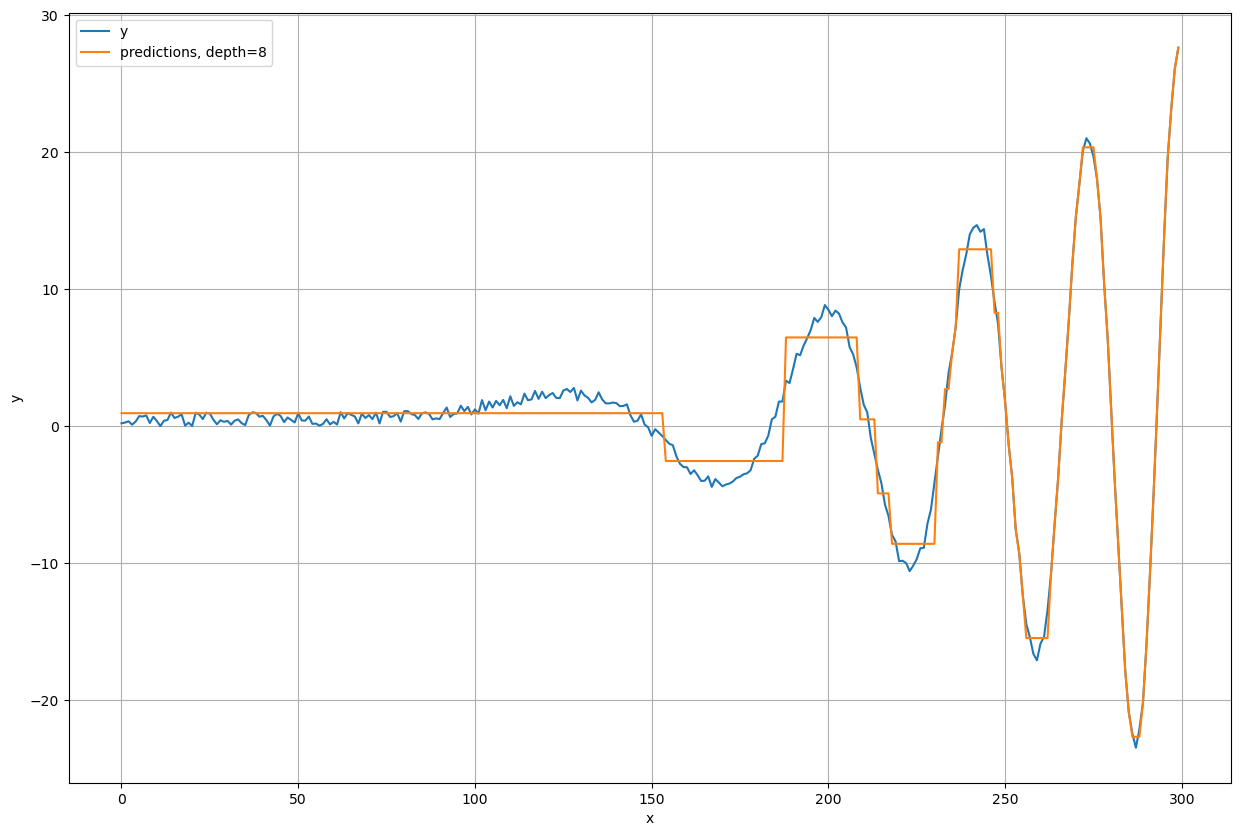

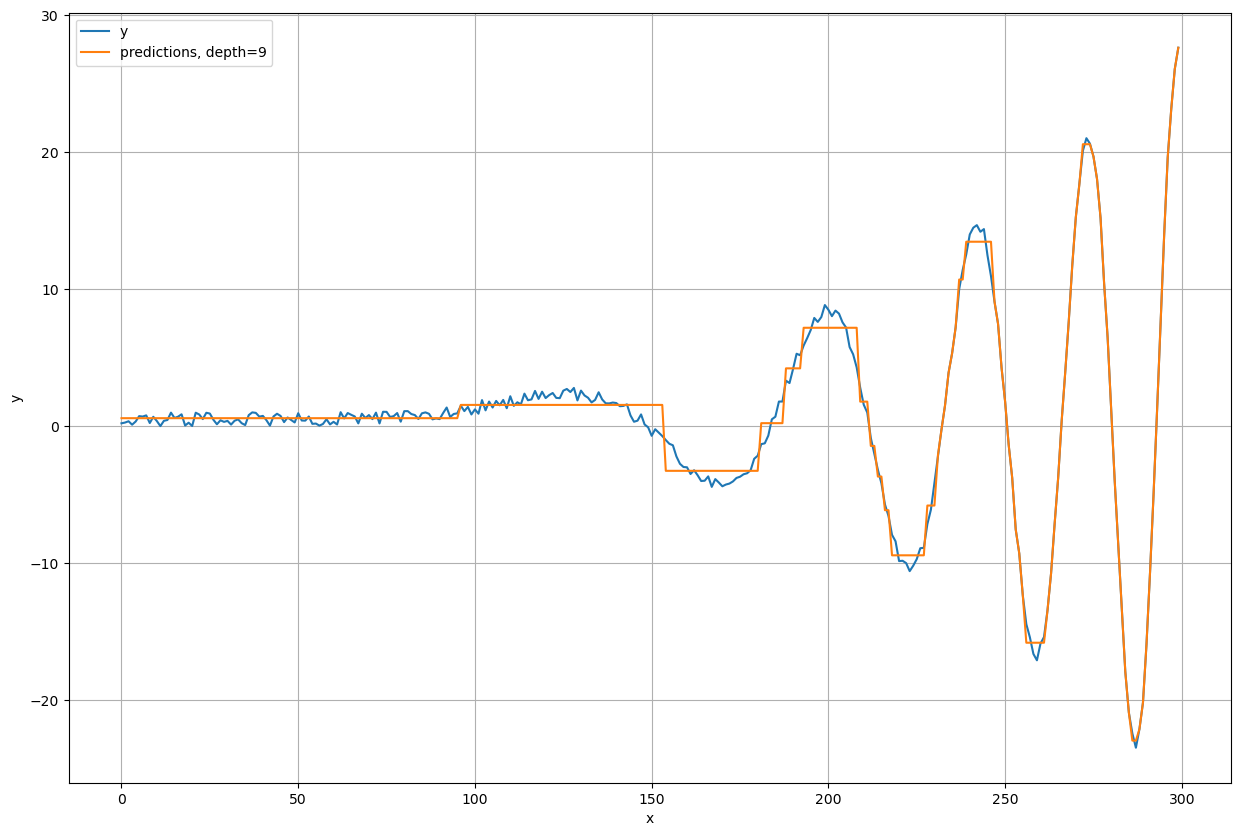

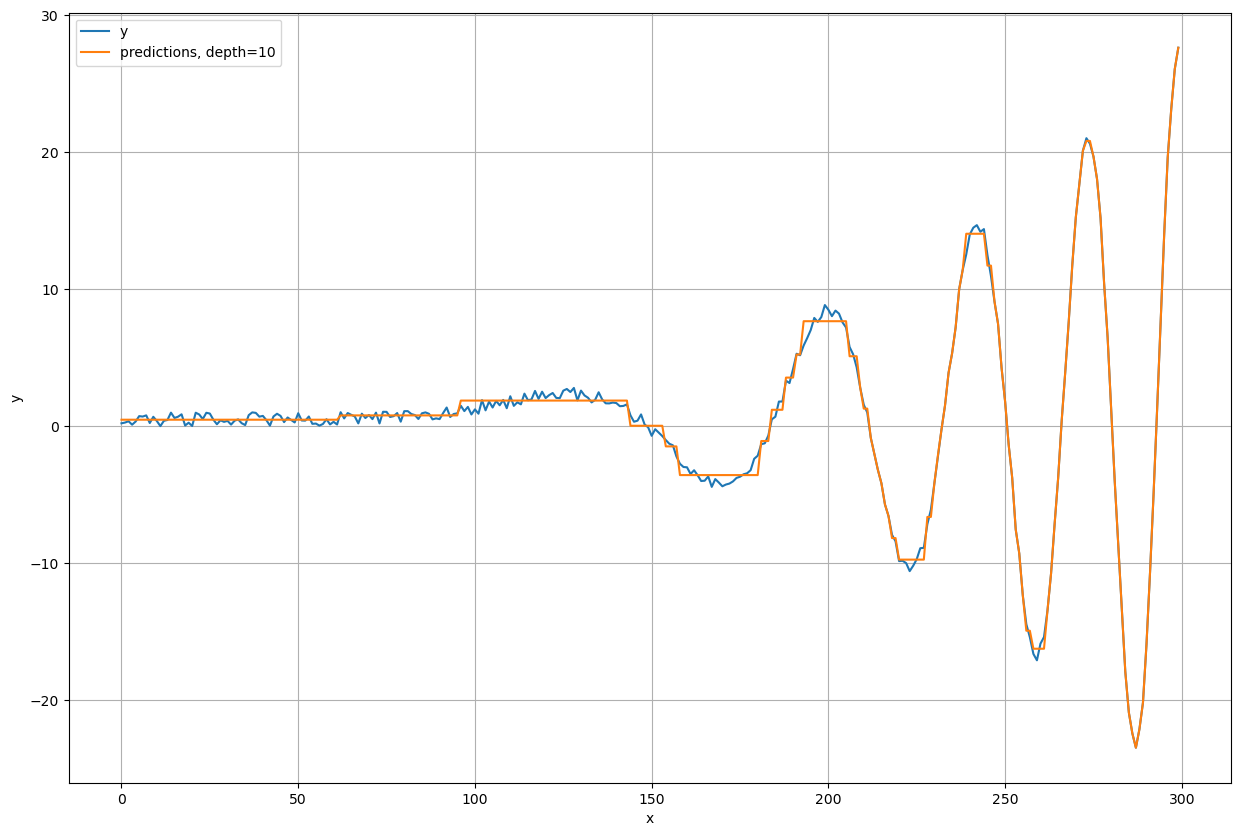

In [7]:
for i in range(10):
    plt.figure(figsize=(15, 10))
    plt.plot(y,label = 'y')
    plt.plot(predicts[i],label = f'predictions, depth={i+1}')
    plt.grid()
    plt.ylabel(r"y")
    plt.xlabel(r"x")
    plt.legend()

In [8]:
from sklearn.metrics import mean_squared_error

In [9]:
#Проверим по метрике MSE работу деревьев.
mse = []
for i in range(10):
    a = mean_squared_error(y, predicts[i])
    print(f"depth={i+1}",mean_squared_error(y, predicts[i]))
    mse.append(a)

depth=1 44.659518318140925
depth=2 36.08264312433252
depth=3 26.15263522872571
depth=4 17.89801871933842
depth=5 11.565416720047573
depth=6 6.544734895474078
depth=7 3.2201782496263824
depth=8 1.1904976428602254
depth=9 0.49762155842199907
depth=10 0.17451376119582646


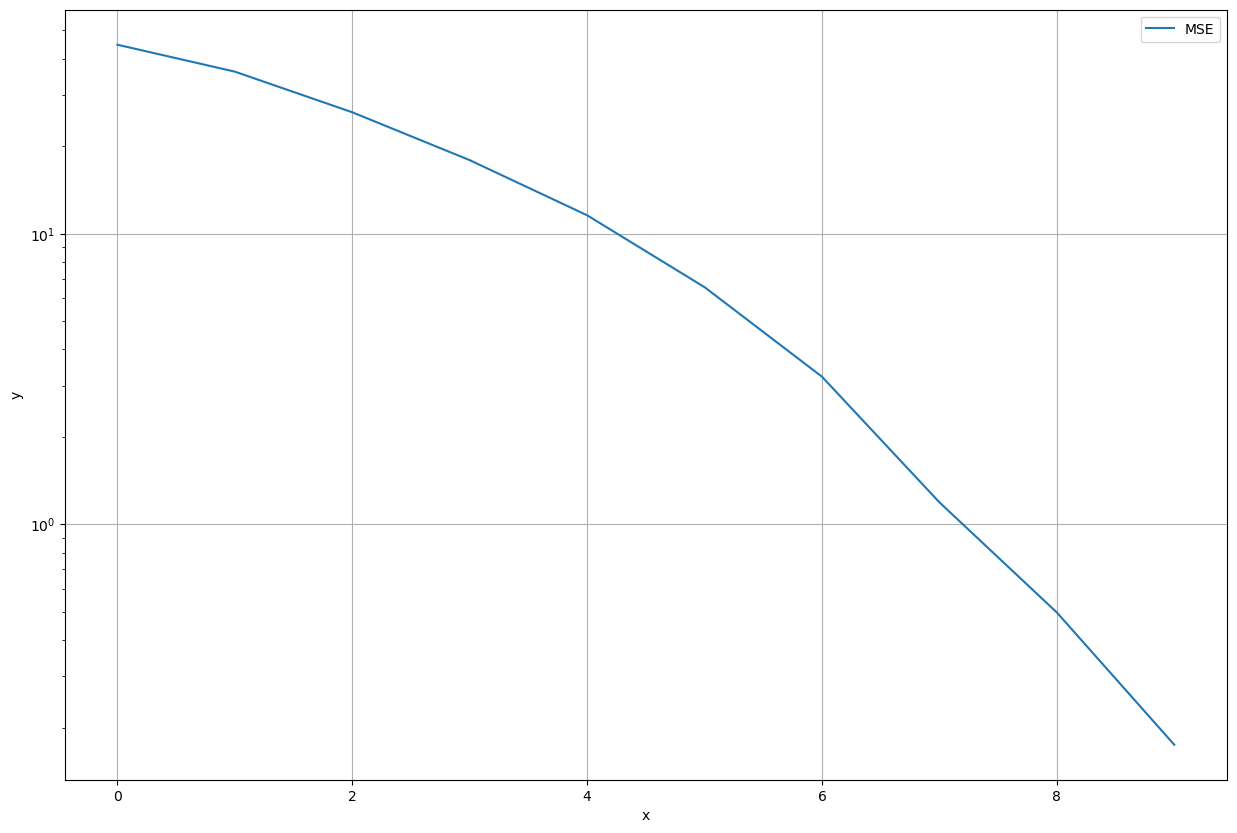

In [10]:
plt.figure(figsize=(15, 10))
plt.plot(mse,label = 'MSE')
plt.grid()
plt.ylabel(r"y")
plt.xlabel(r"x")
plt.legend()
plt.yscale('log')

Можно заметить, что чем больше глубина, тем точнее работает дерево. Причем, используя логарифмическую шкалу, можно заметить, что улучшение точности замедляется несильно

In [11]:
#Проверим на данных попроще. Возьмем более простую функцию и сделаем ошибку меньше
tree_1, predicts_1 = [], []
y = np.sin(x) + np.random.random(x_shape) / 10

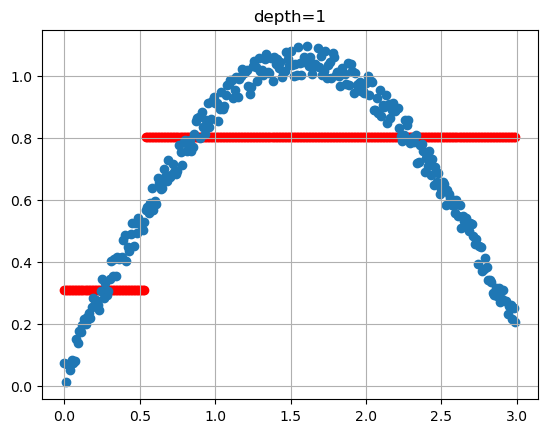

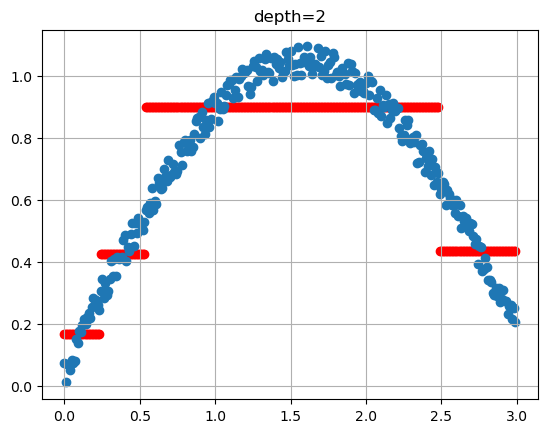

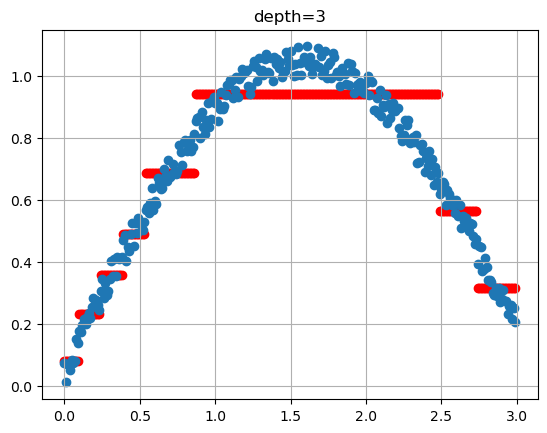

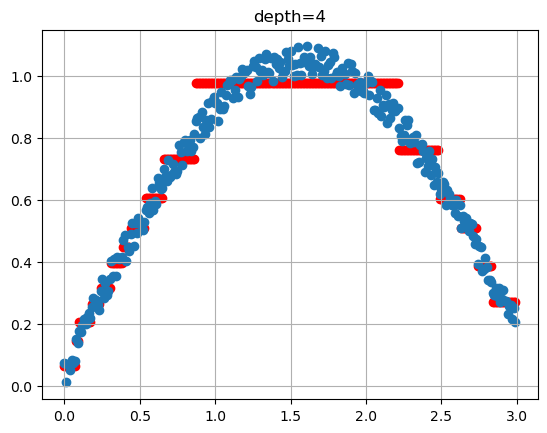

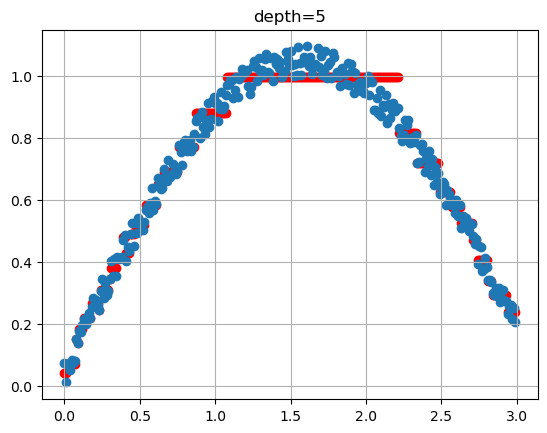

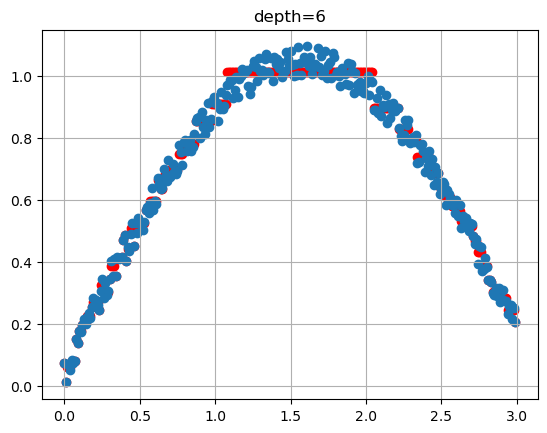

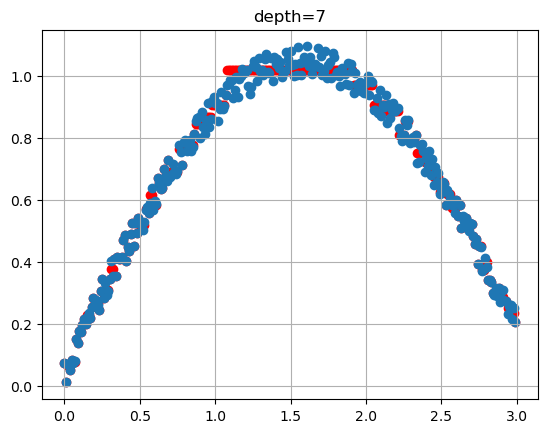

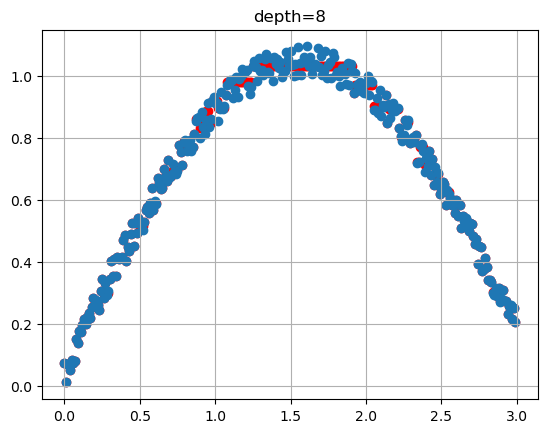

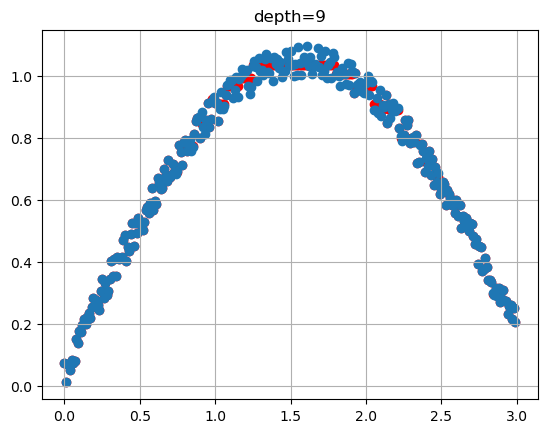

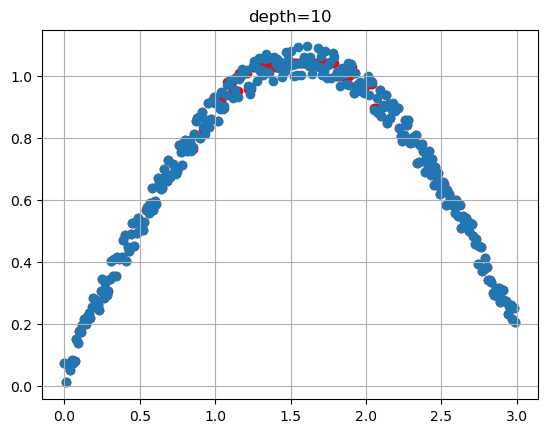

In [12]:
for i in range(10):
    reg_tree = RegressionDecisionTree (max_depth=i + 1, min_leaf_size=1)
    reg_tree.fit(x, y)
    predictions = reg_tree.predict(x)
    plt.scatter(x, predictions, color = 'red')
    plt.scatter(x, y)
    plt.grid()
    plt.title(f"depth={i+1}")
    plt.show()
    tree_1.append(reg_tree)
    predicts_1.append(predictions)

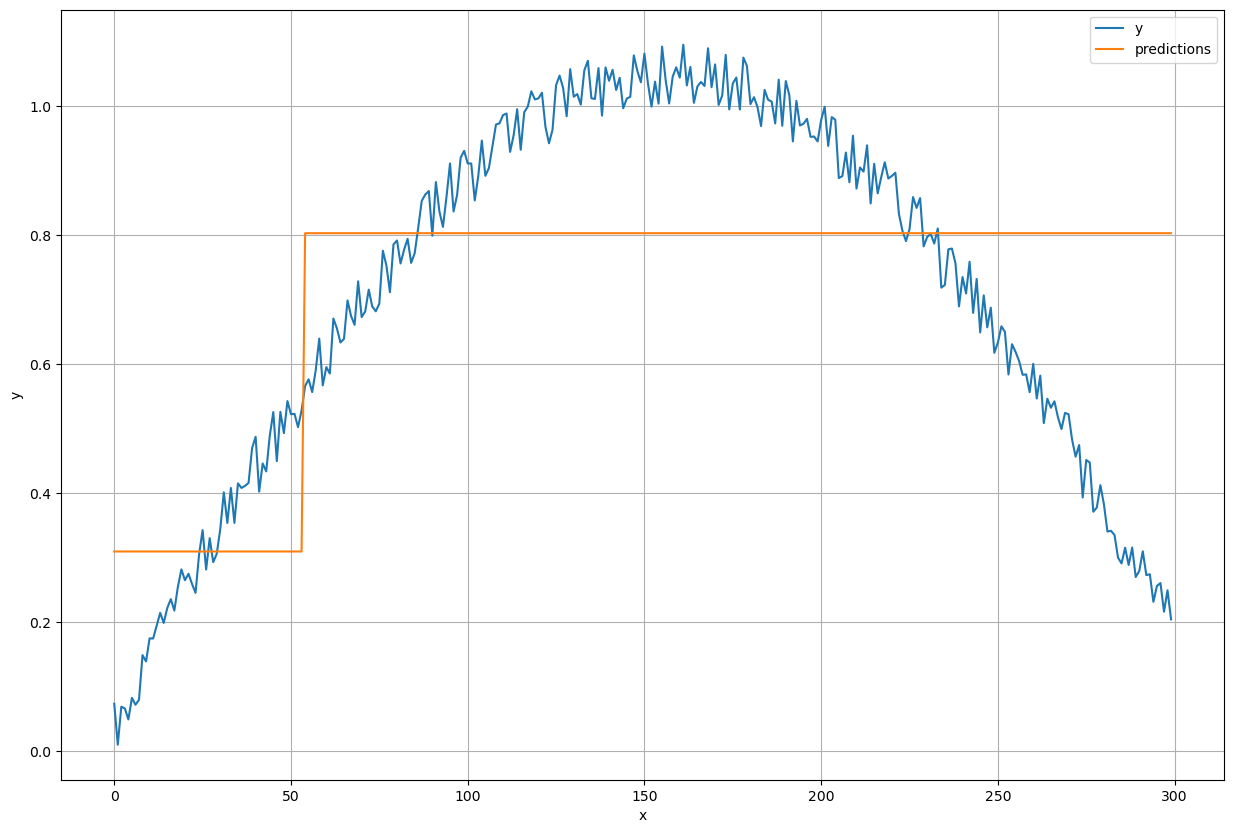

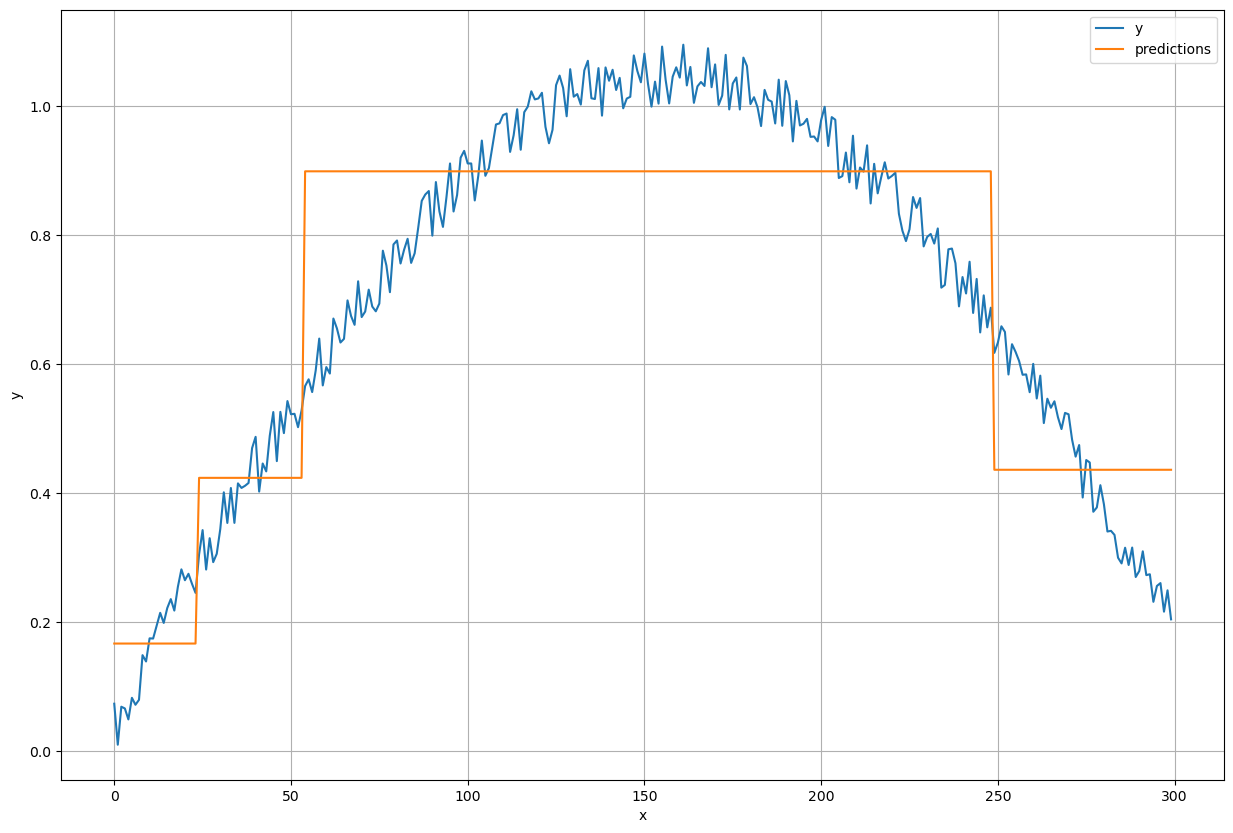

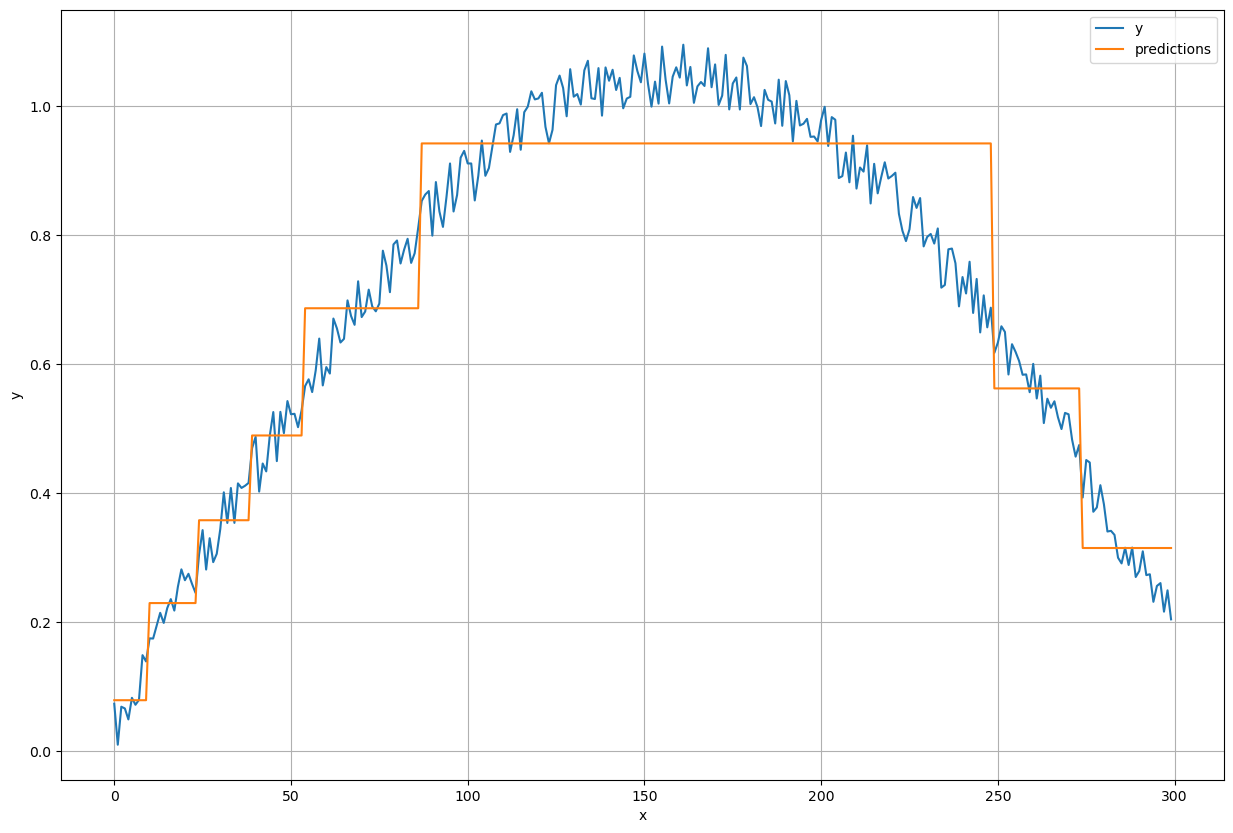

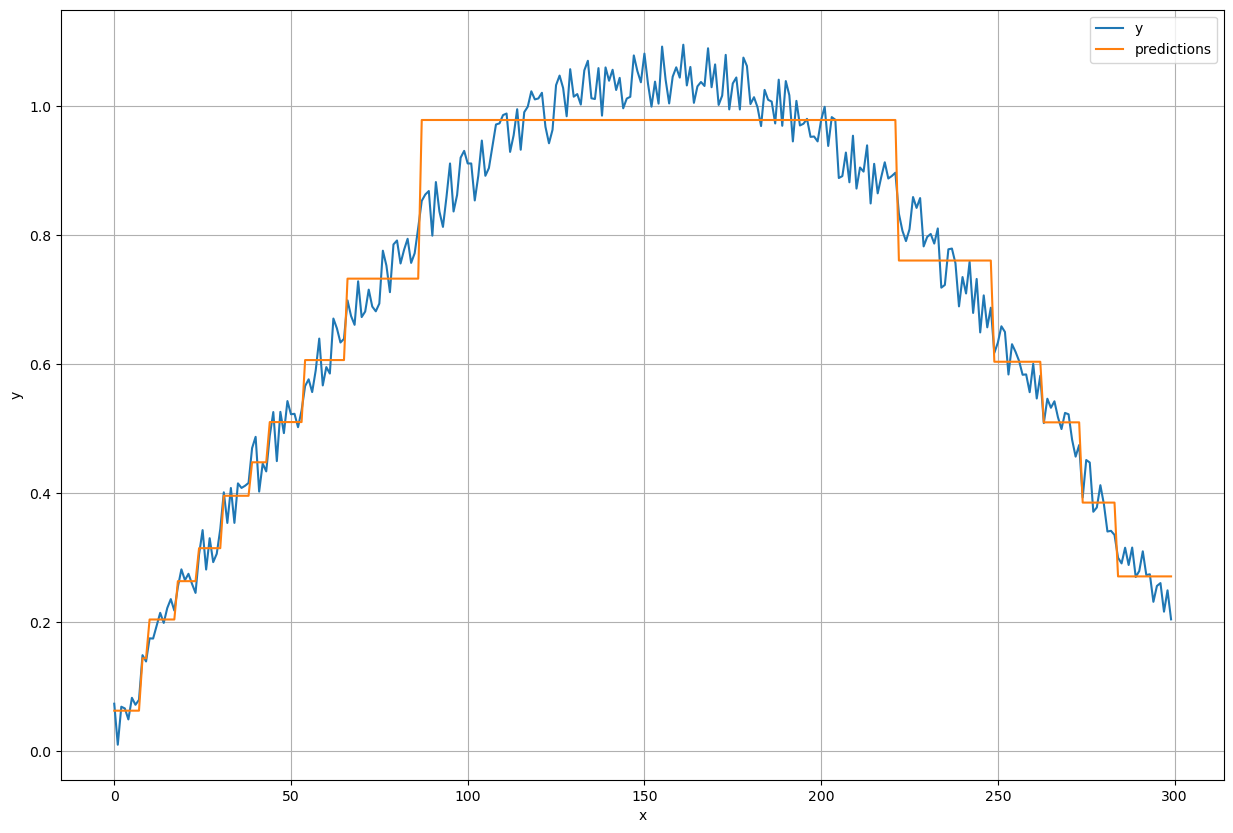

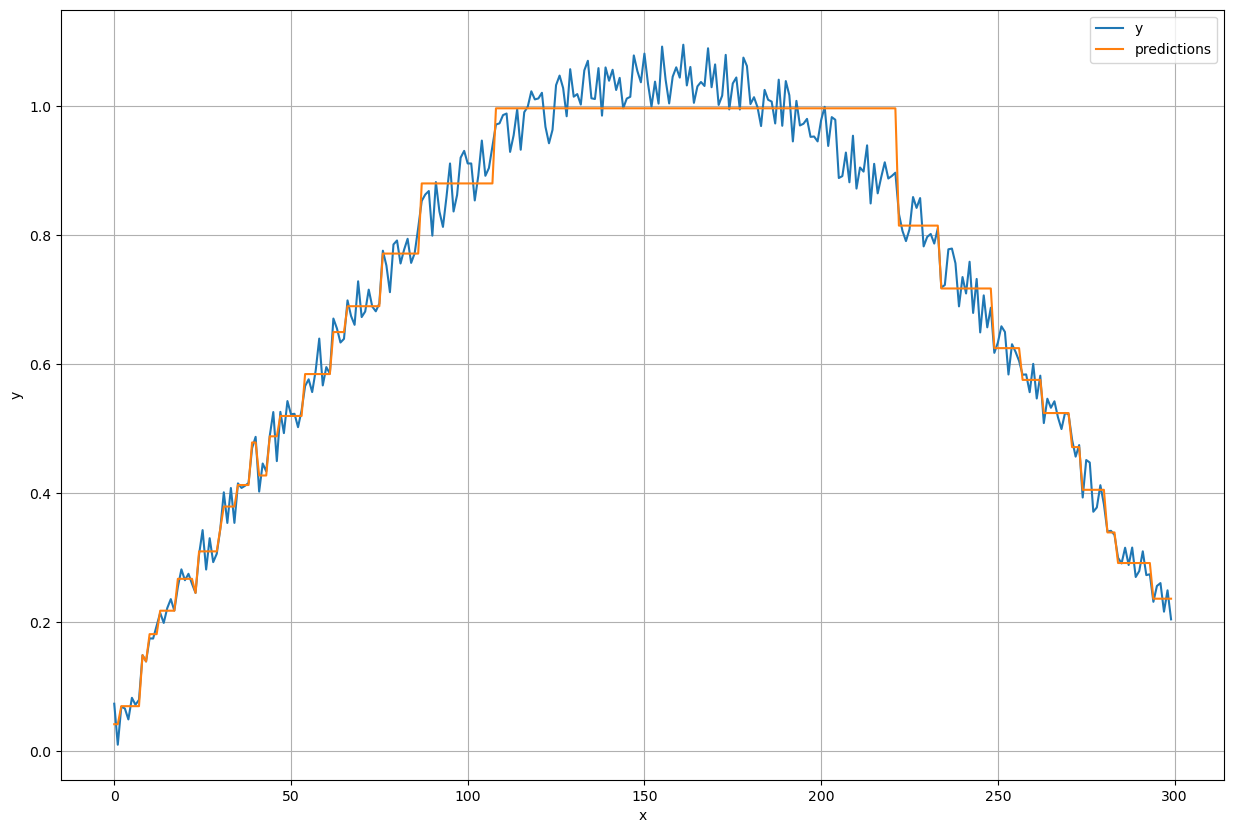

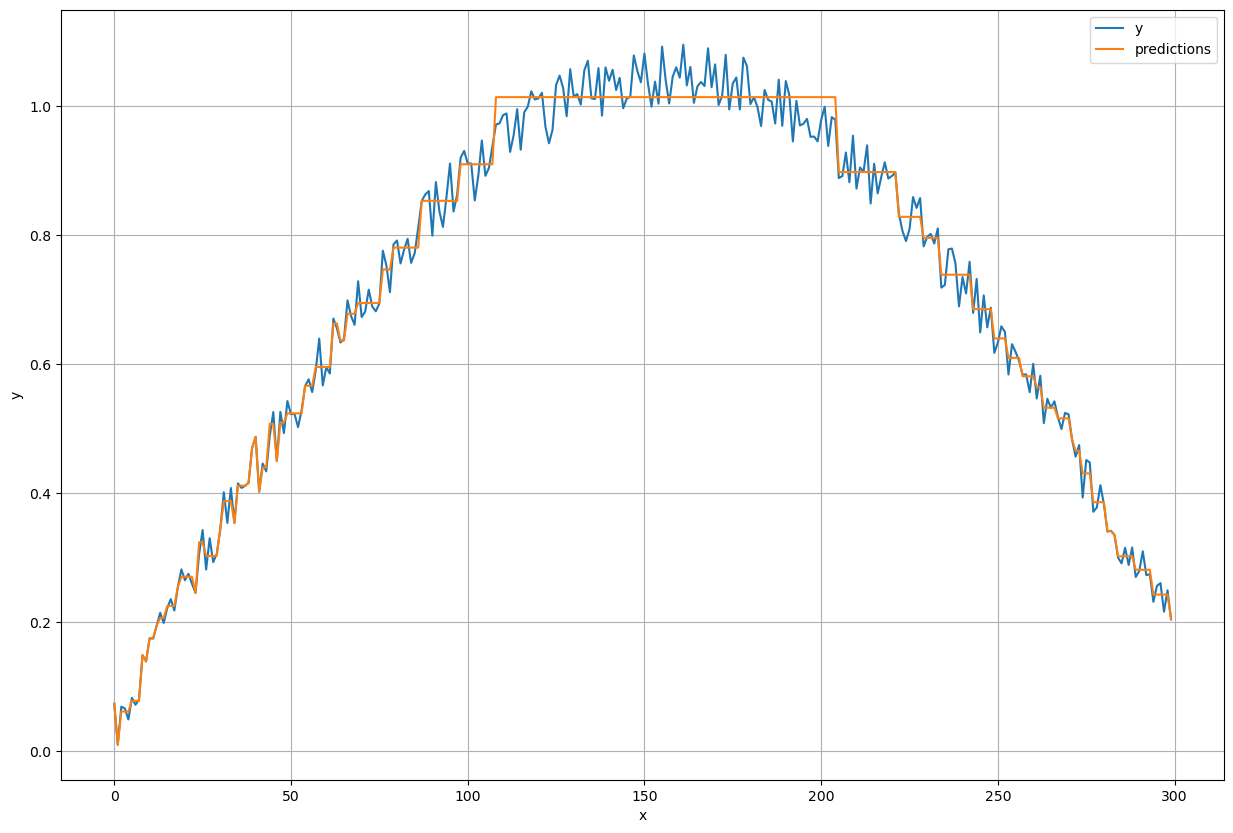

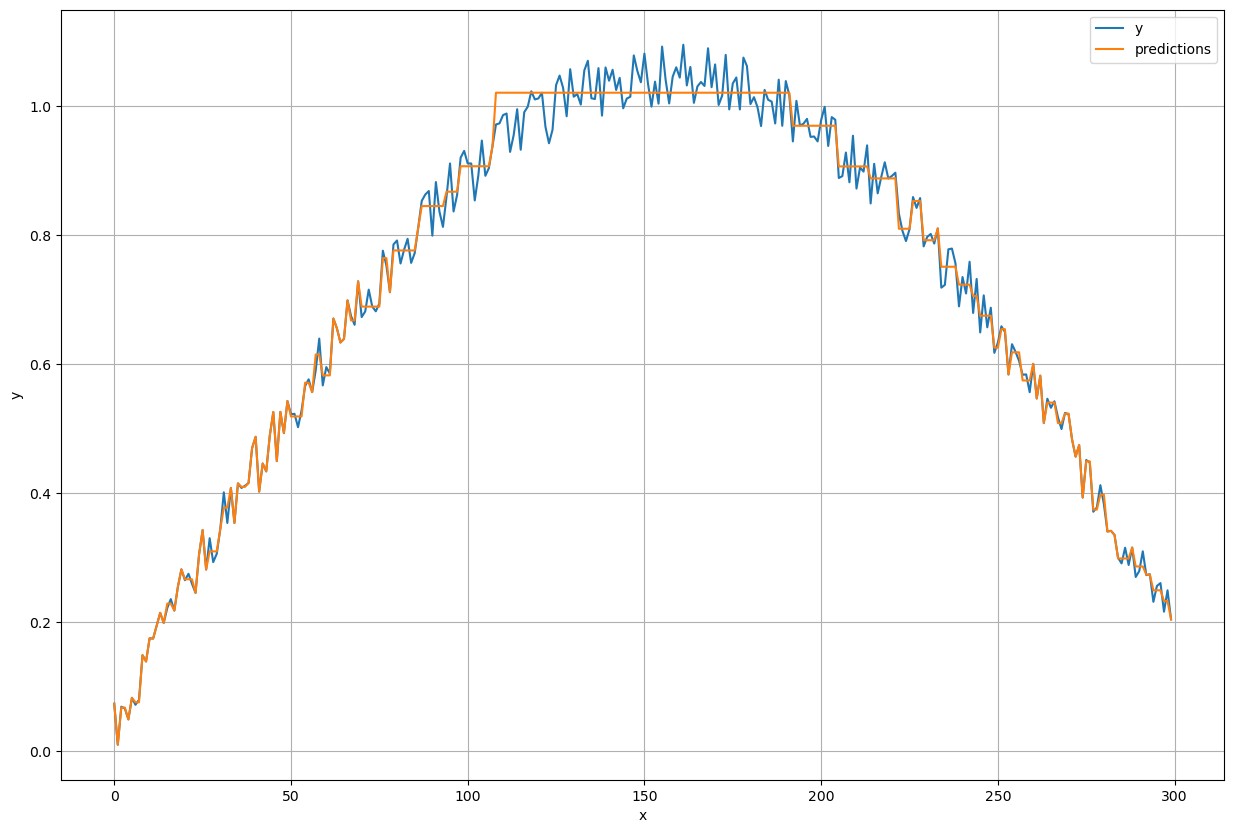

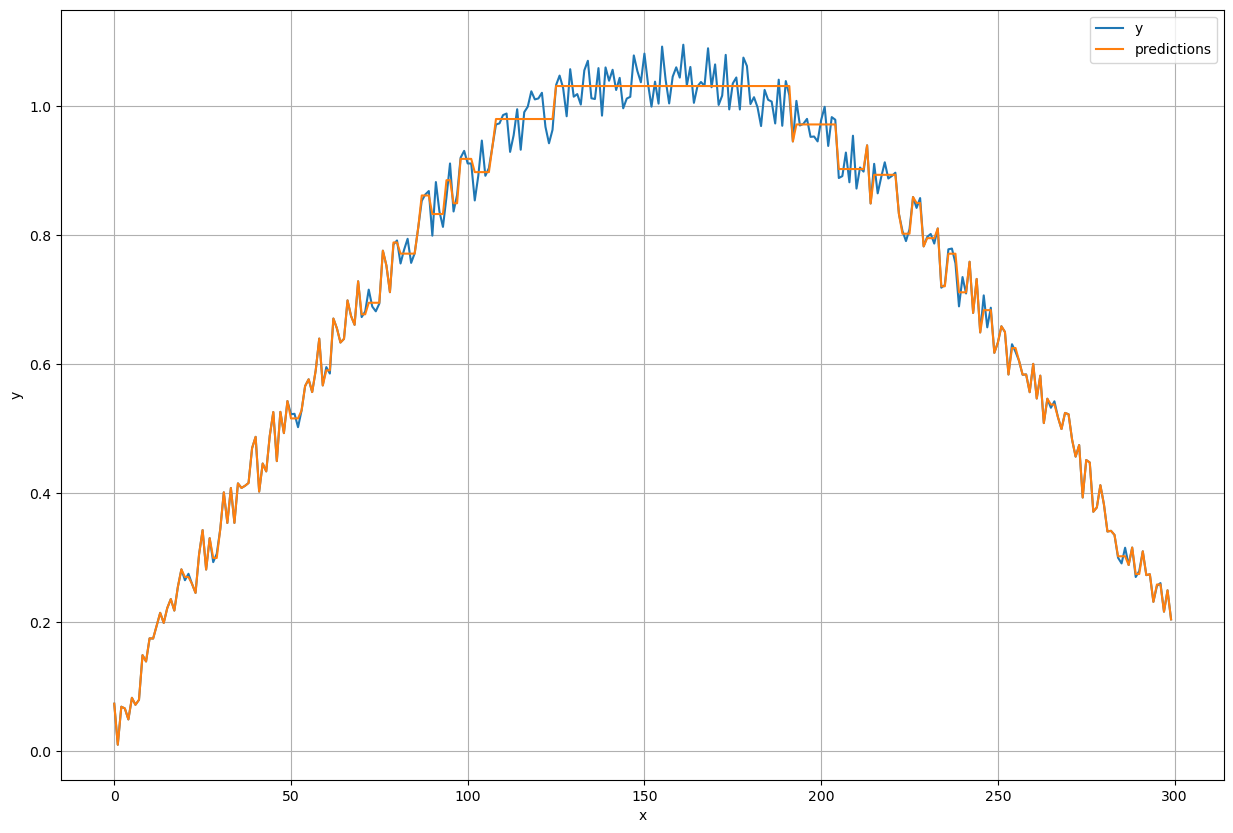

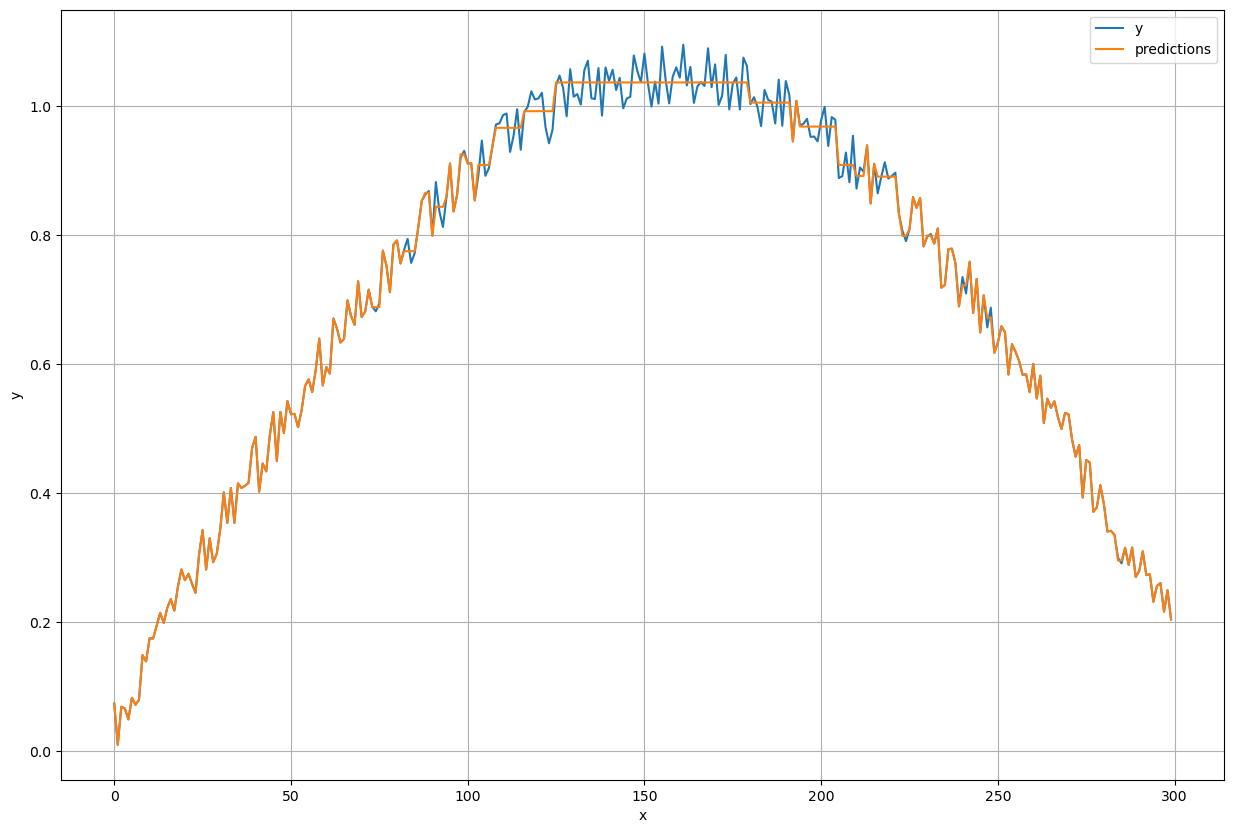

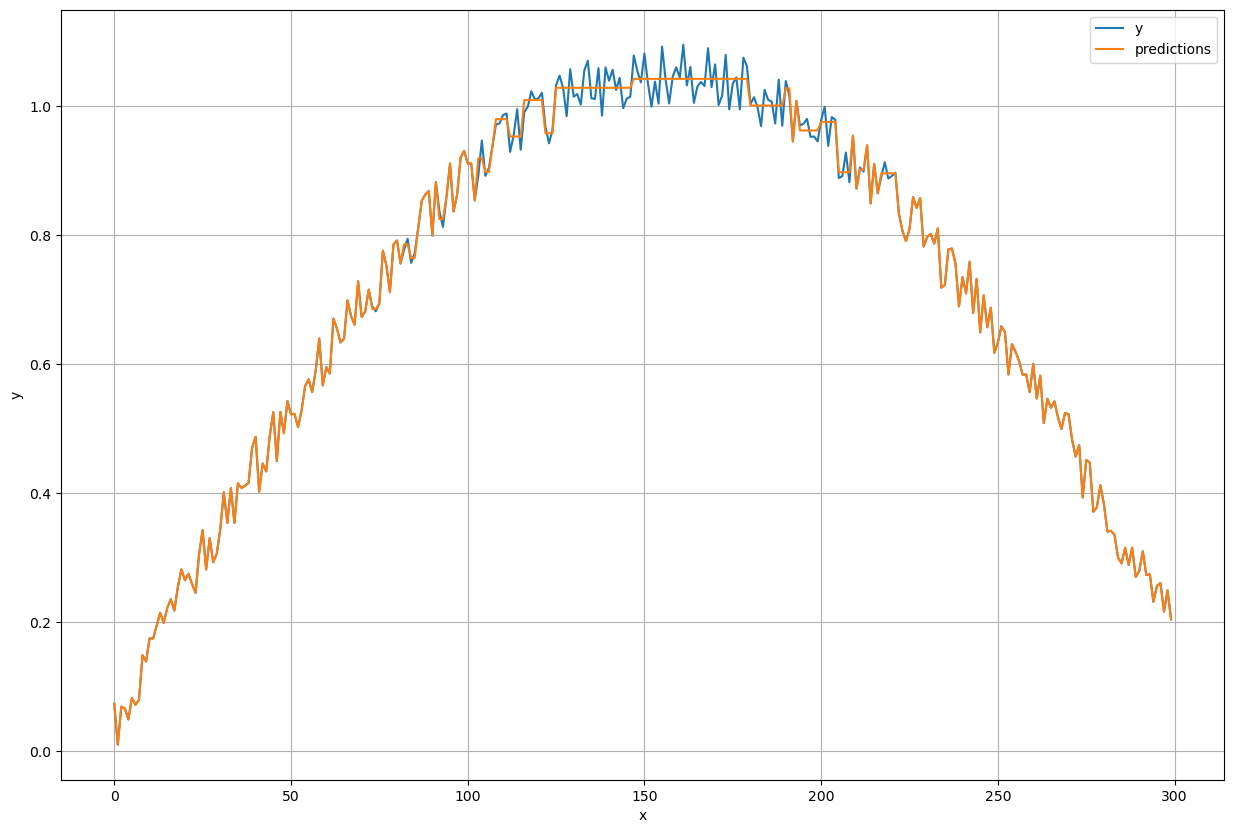

In [13]:
for i in range(10):
    plt.figure(figsize=(15, 10))
    plt.plot(y,label = 'y')
    plt.plot(predicts_1[i],label = 'predictions')
    plt.grid()
    plt.ylabel(r"y")
    plt.xlabel(r"x")
    plt.legend()

In [14]:
mse_1 = []
for i in range(10):
    a = mean_squared_error(y, predicts_1[i])
    print(f"depth={i+1}",mean_squared_error(y, predicts_1[i]))
    mse_1.append(a)

depth=1 0.04869559541257529
depth=2 0.016929082654702957
depth=3 0.007493054936714954
depth=4 0.0028790352508700503
depth=5 0.0015542953316752476
depth=6 0.0007288757412824493
depth=7 0.0005368995573797624
depth=8 0.00034001196792100824
depth=9 0.00025806529540308424
depth=10 0.00019441412961707907


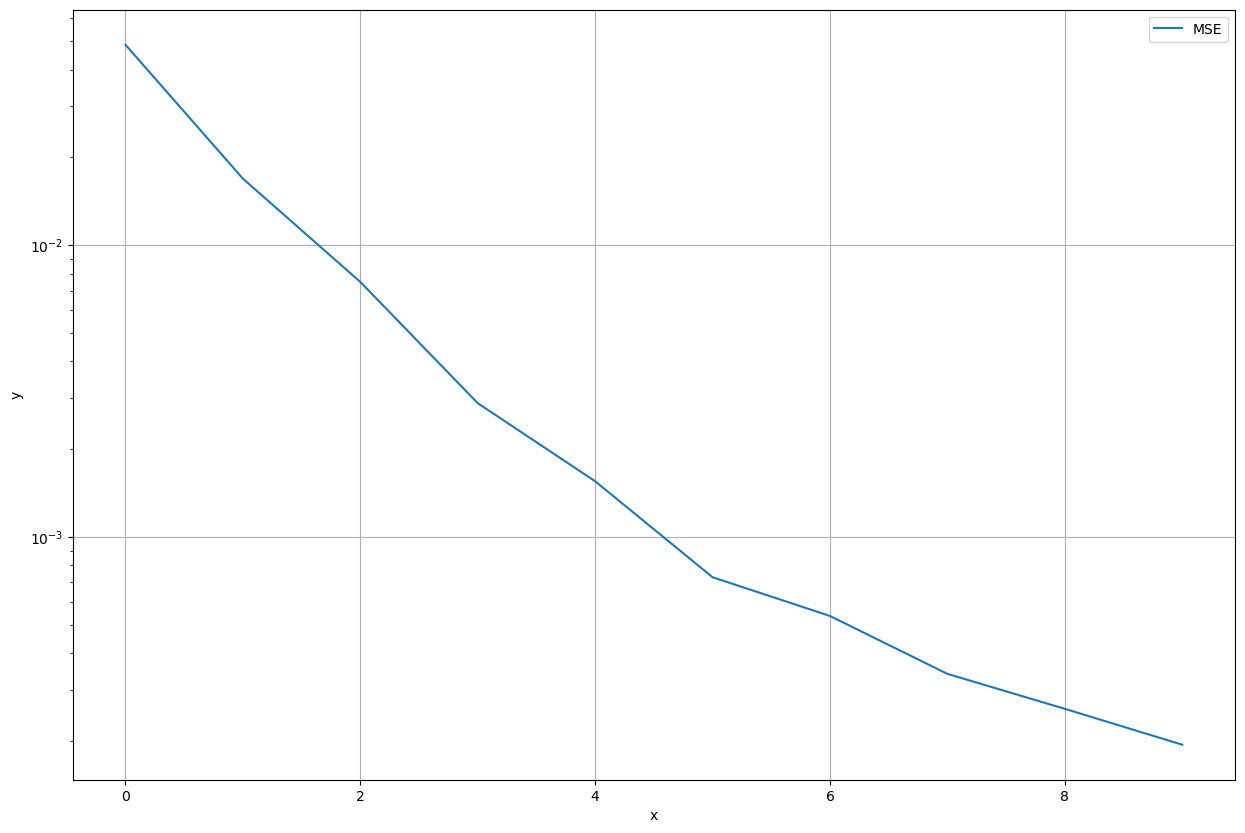

In [15]:
plt.figure(figsize=(15, 10))
plt.plot(mse_1,label = 'MSE')
plt.grid()
plt.ylabel(r"y")
plt.xlabel(r"x")
plt.legend()
plt.yscale('log')

На более простой функции, дерево работает хорошо. И чем больше глубина дерева, тем лучше точность.  Точность также замедляется несильно.

Проверим на sin(20x), функцию с высокой частотой

In [16]:
tree_2, predicts_2 = [], []
y = np.sin(20*x) + np.random.random(x_shape) / 10

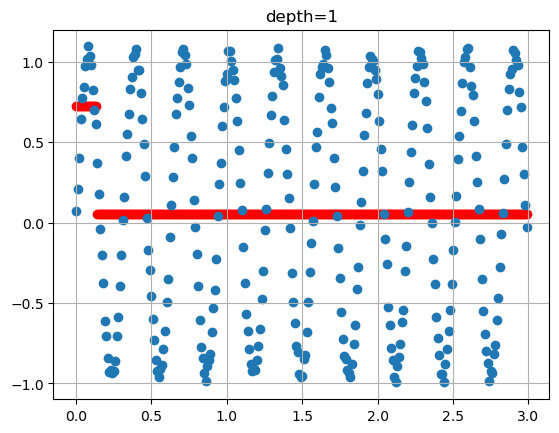

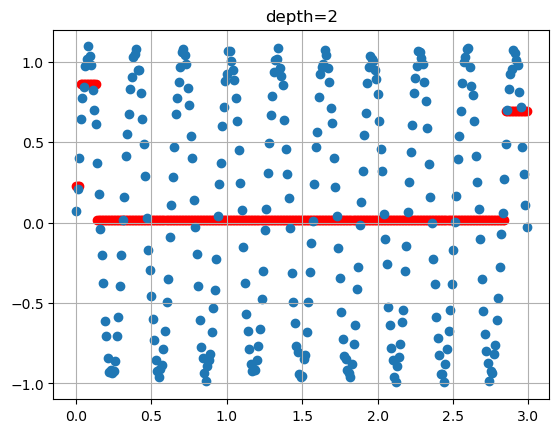

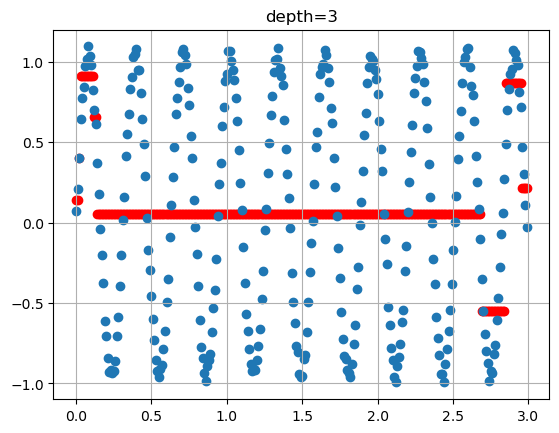

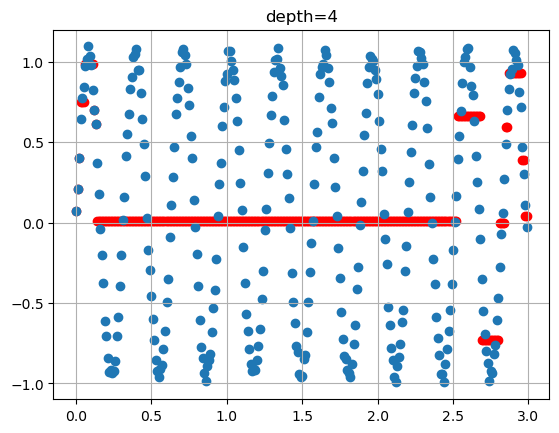

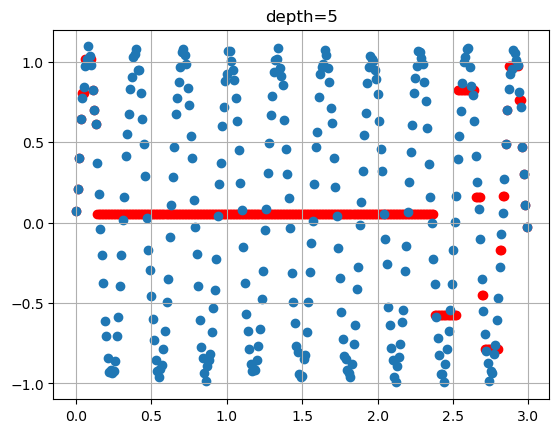

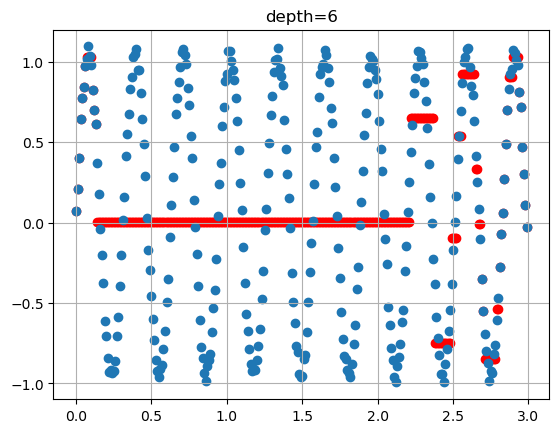

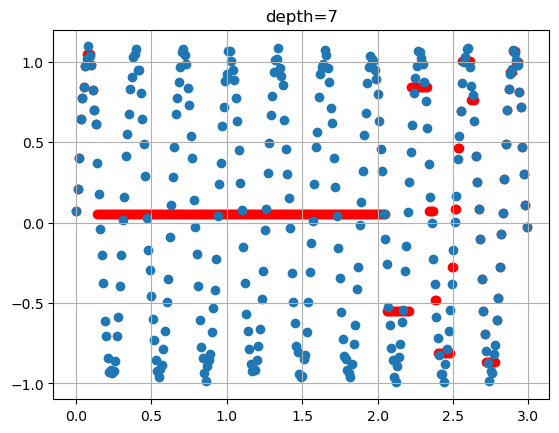

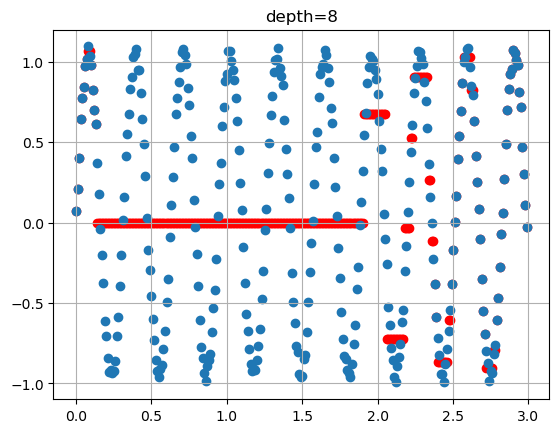

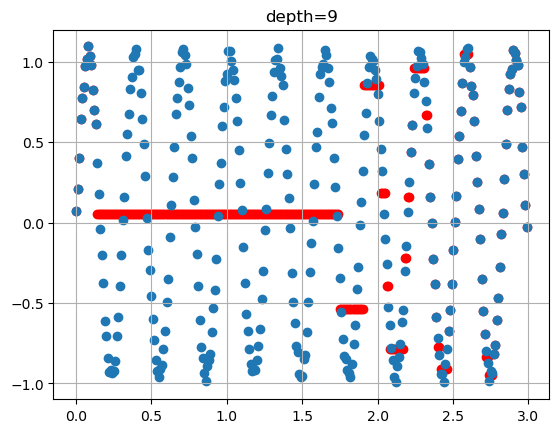

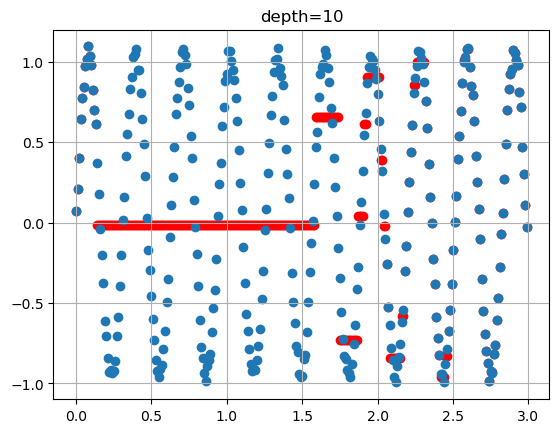

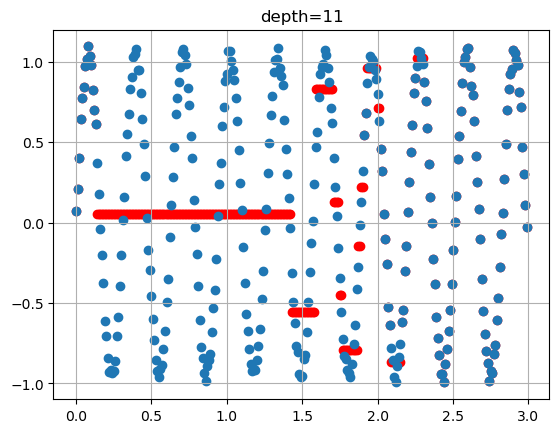

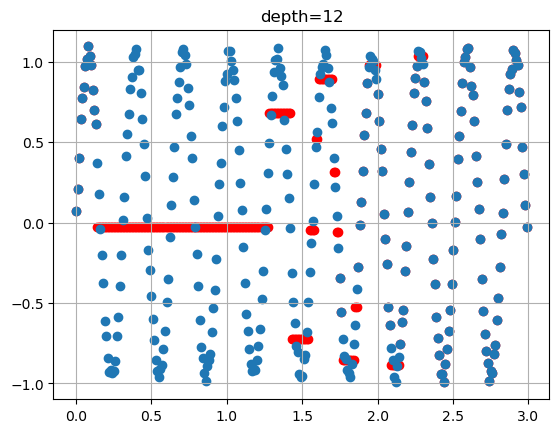

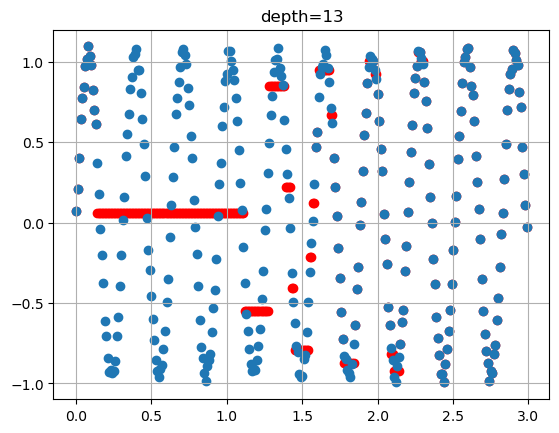

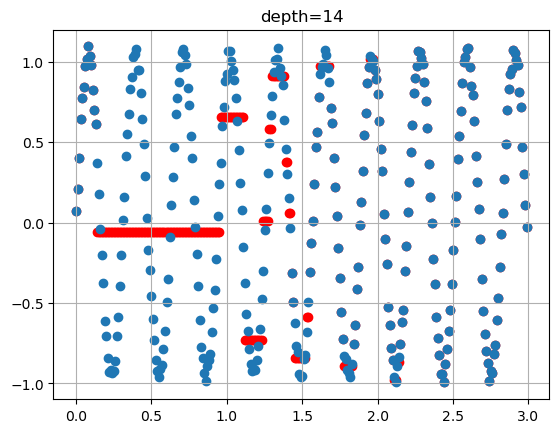

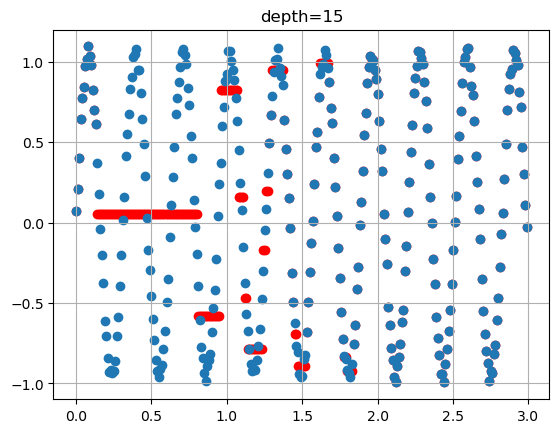

In [17]:
for i in range(15):
    reg_tree = RegressionDecisionTree (max_depth=i + 1, min_leaf_size=1)
    reg_tree.fit(x, y)
    predictions = reg_tree.predict(x)
    plt.scatter(x, predictions, color = 'red')
    plt.scatter(x, y)
    plt.grid()
    plt.title(f"depth={i+1}")
    plt.show()
    tree_2.append(reg_tree)
    predicts_2.append(predictions)

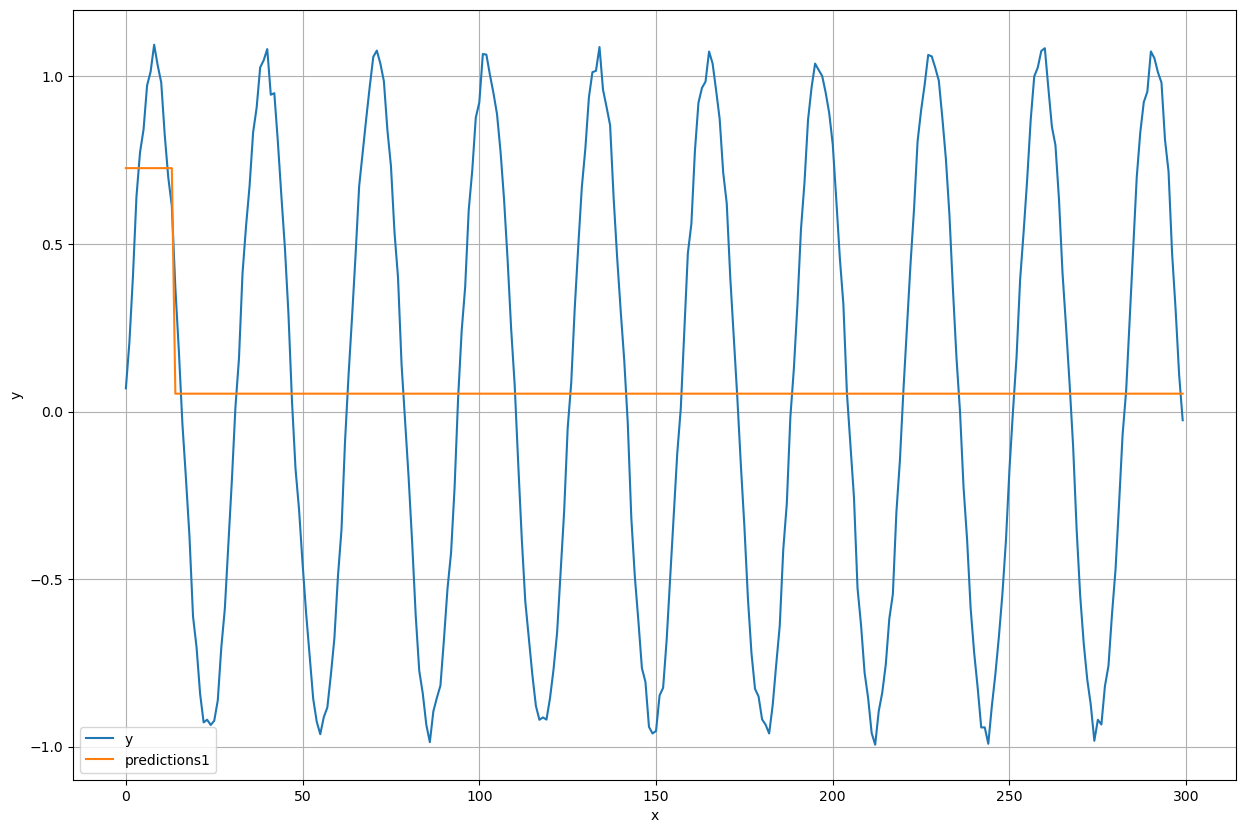

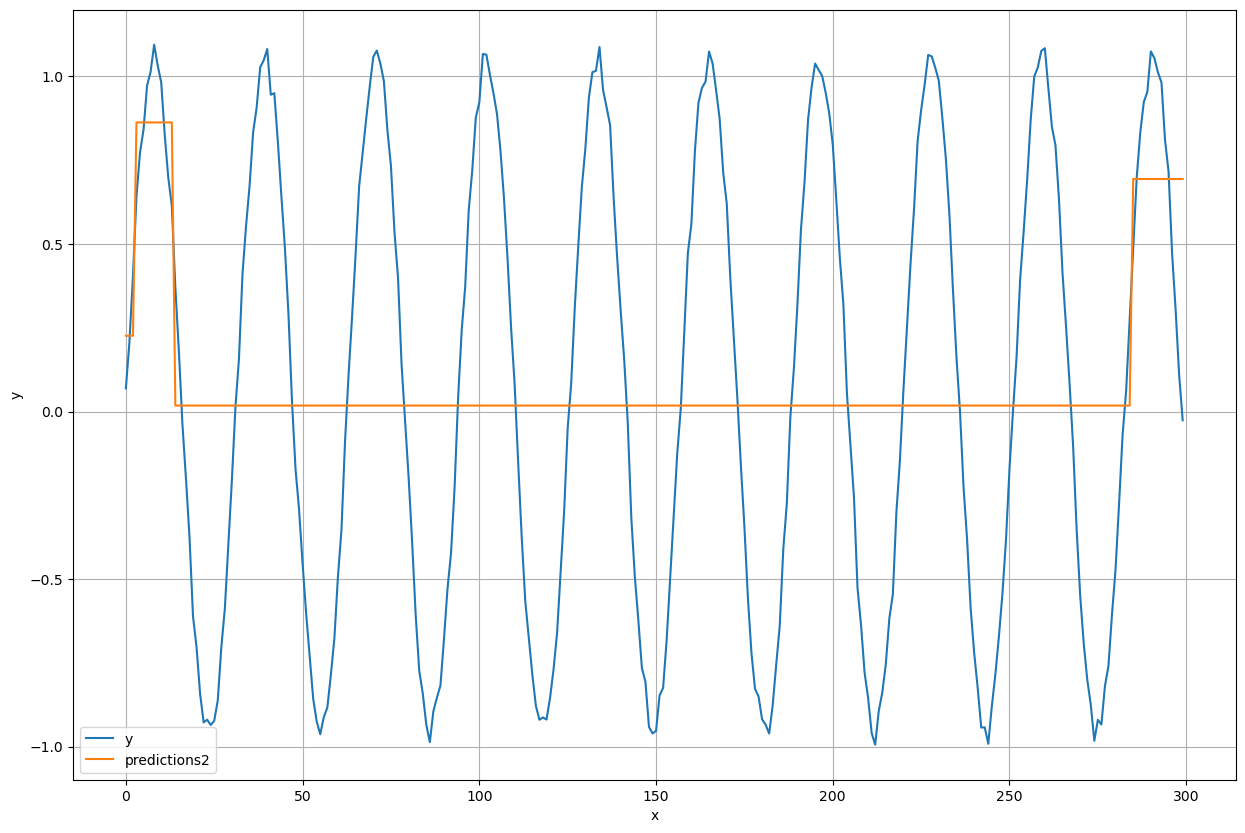

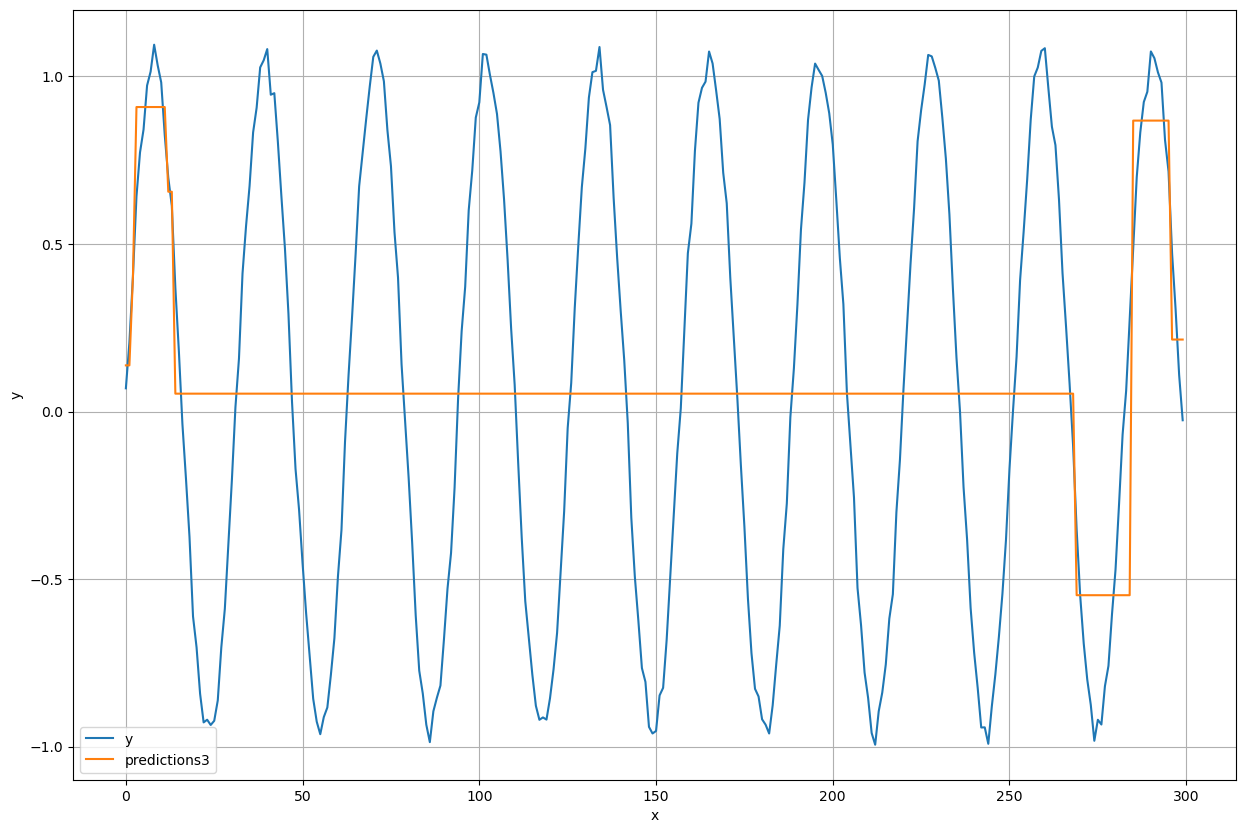

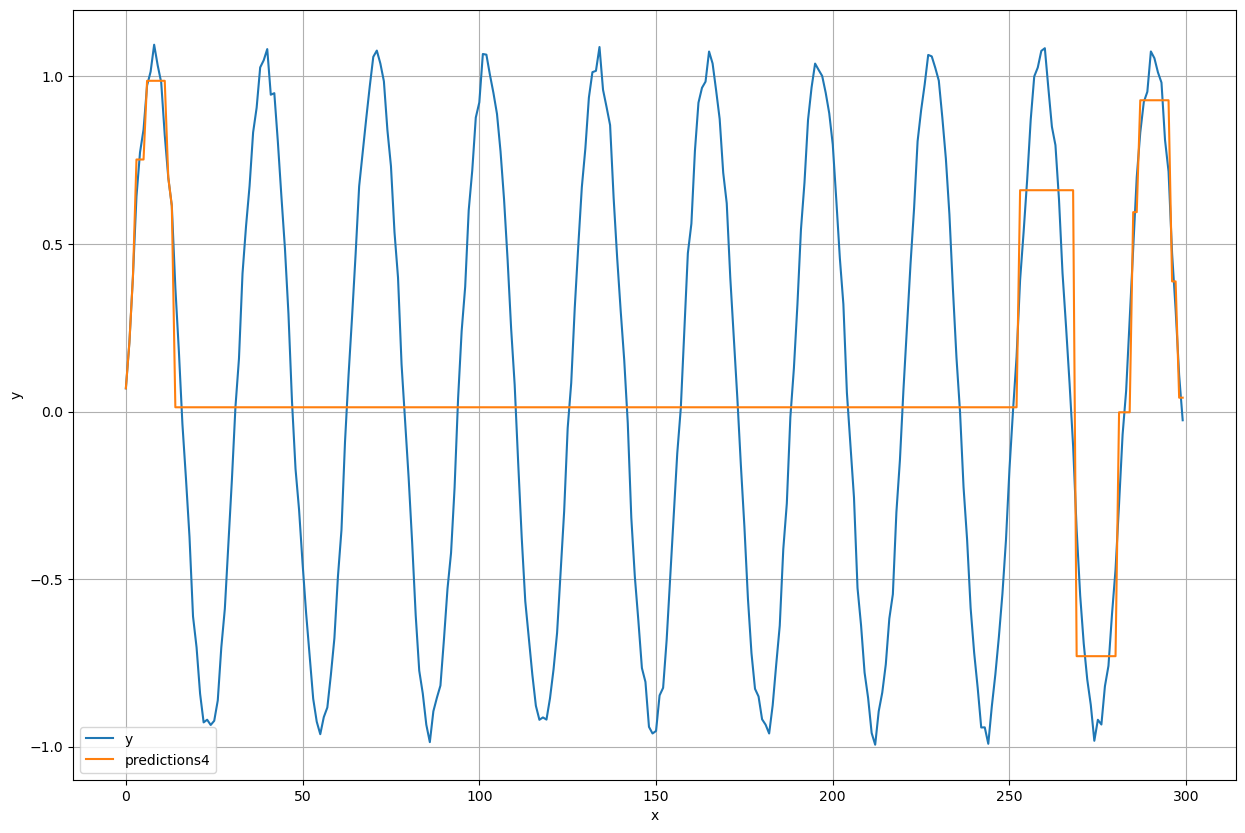

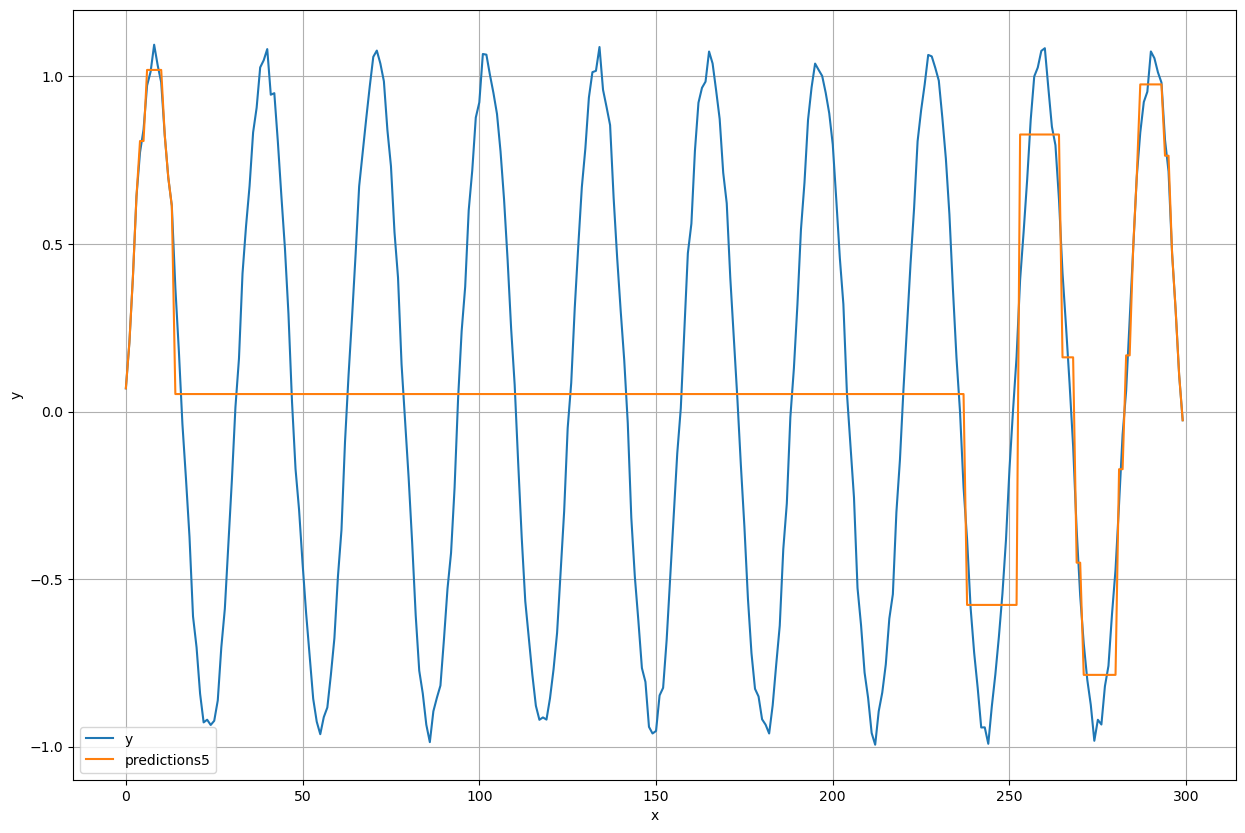

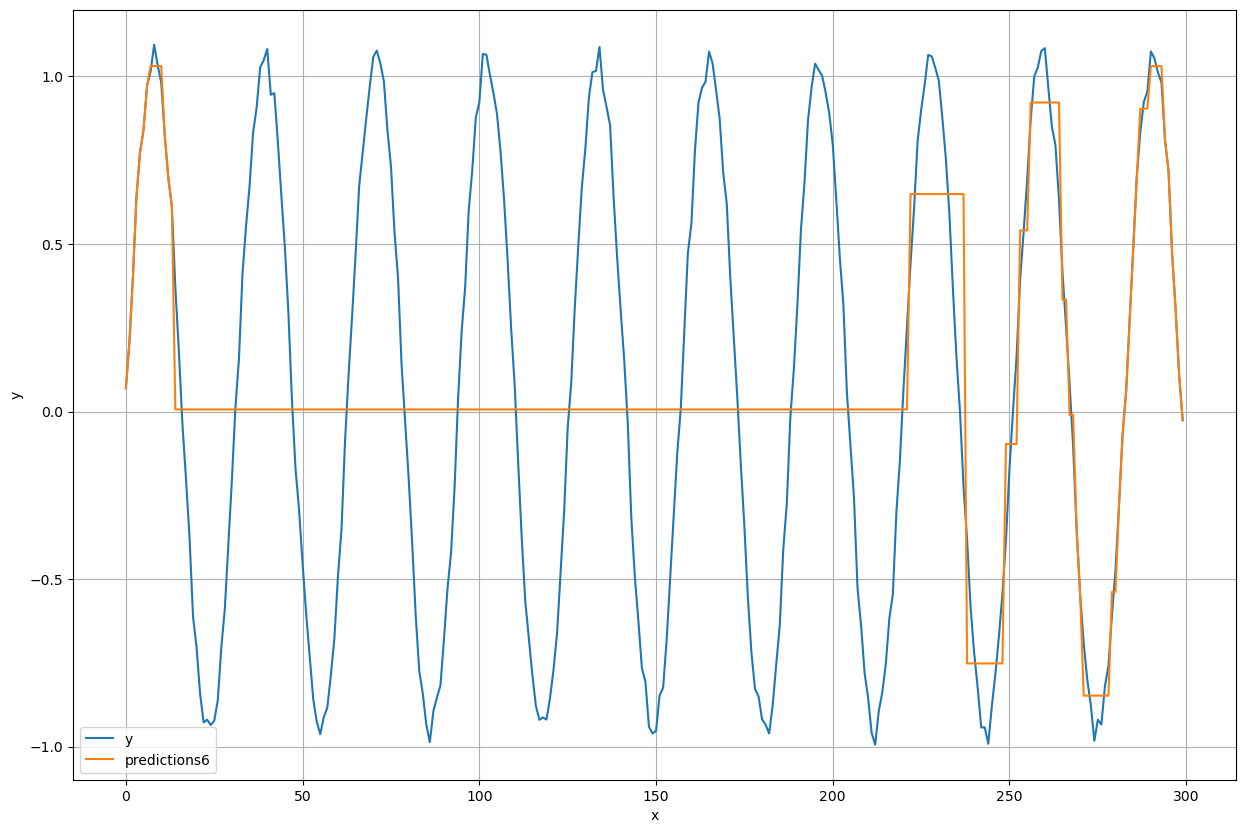

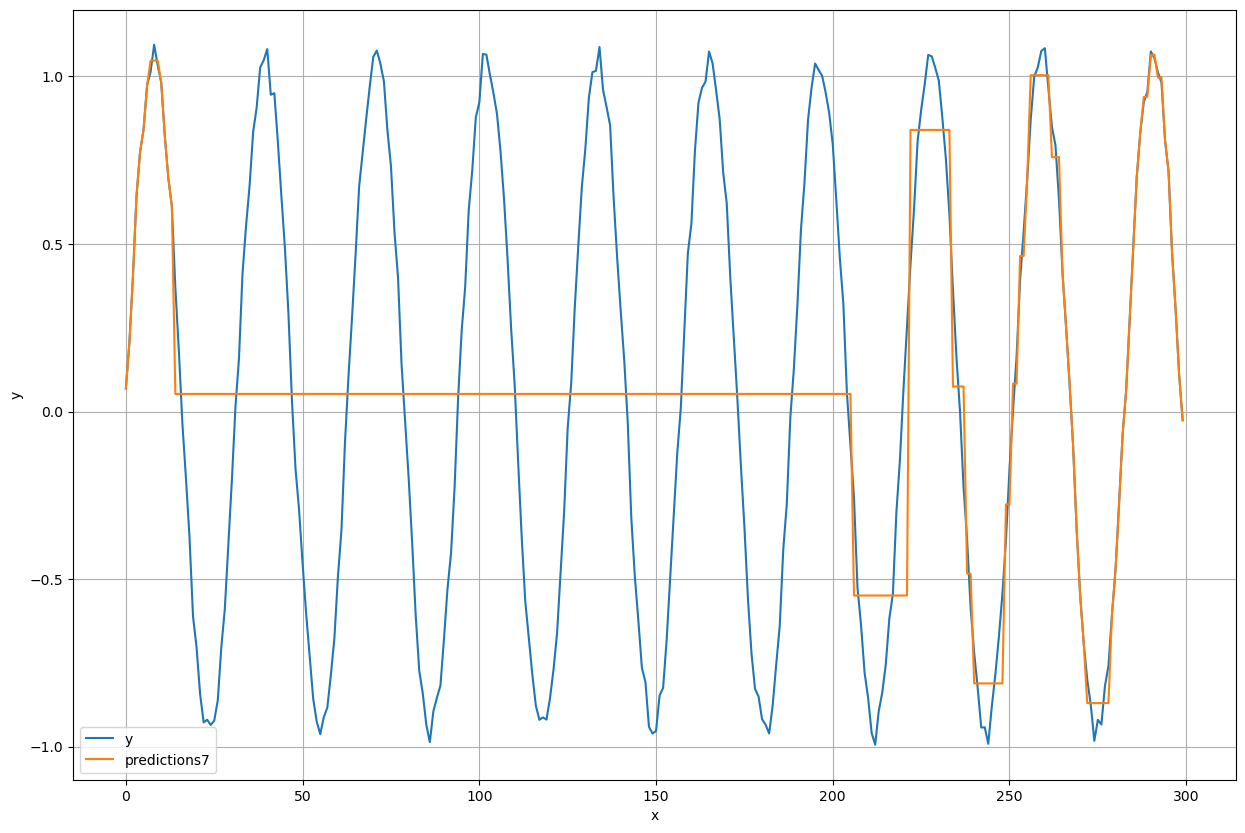

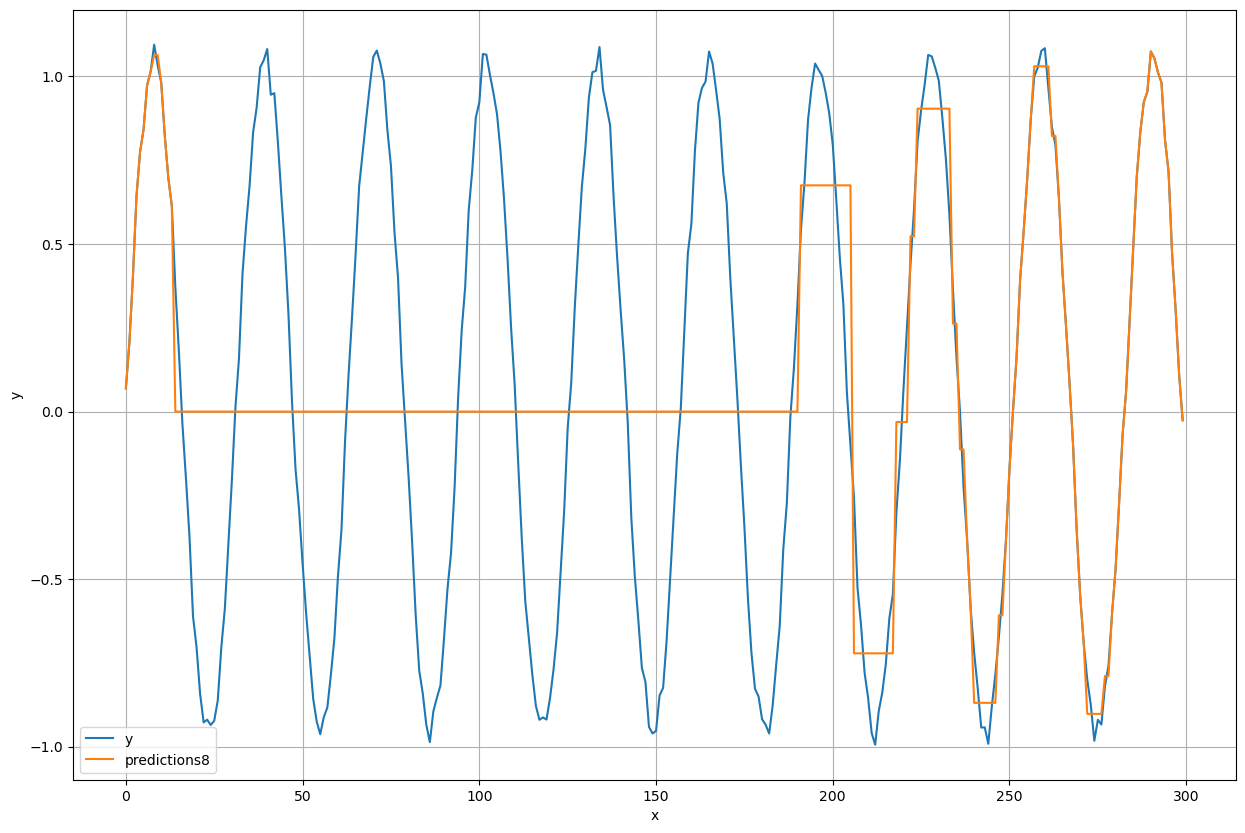

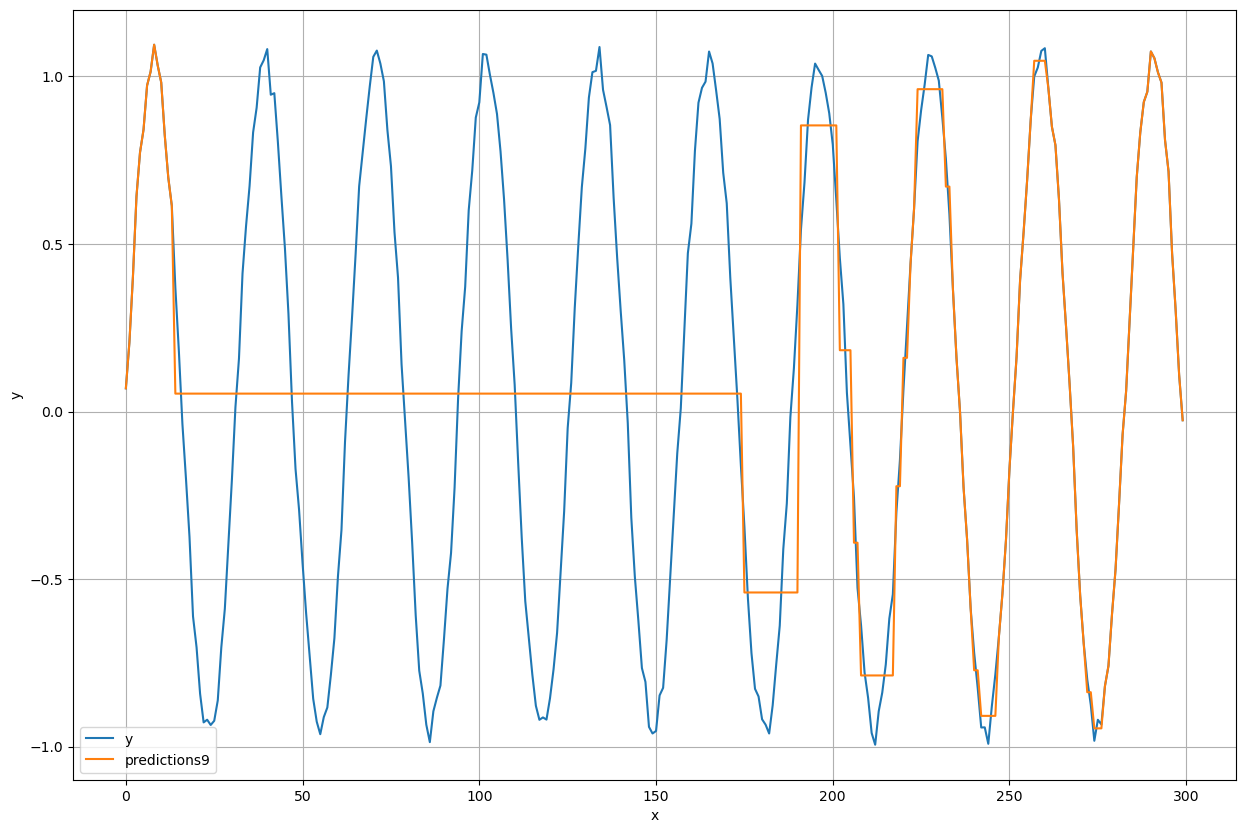

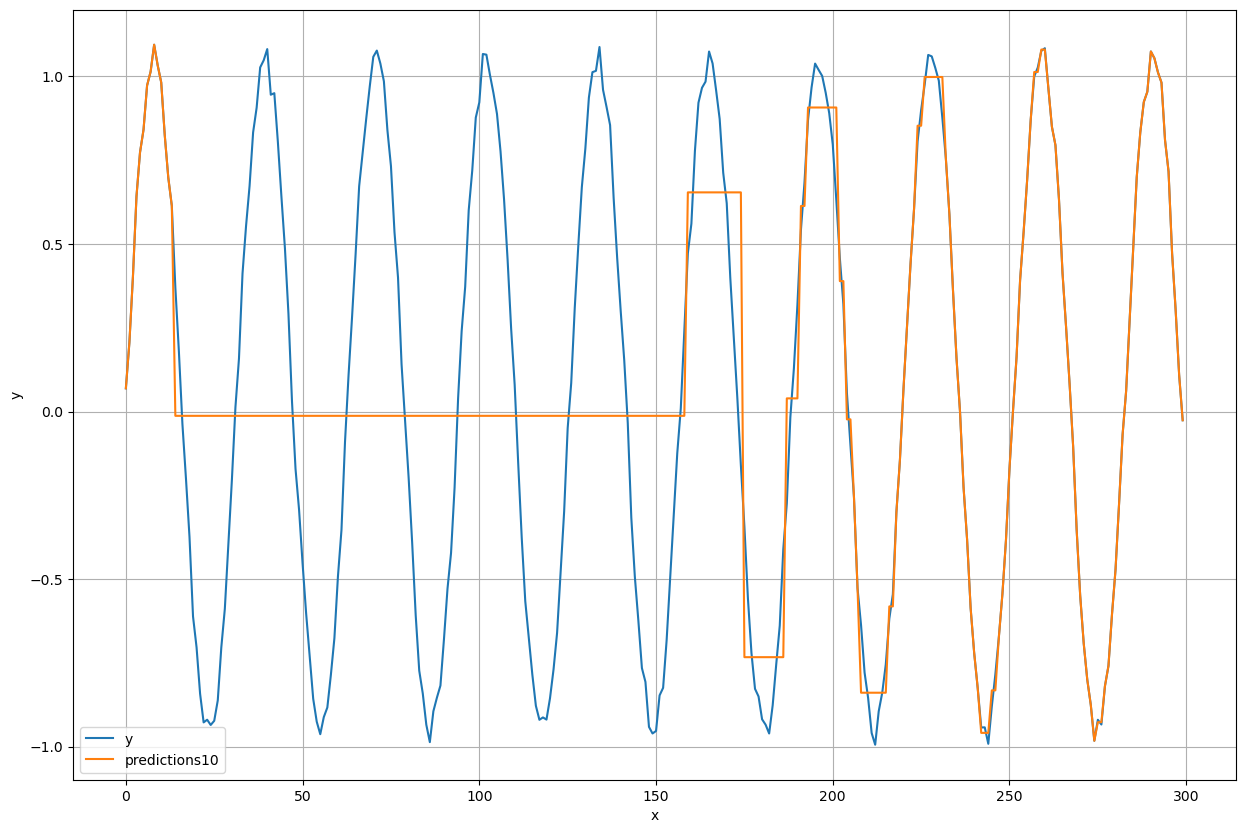

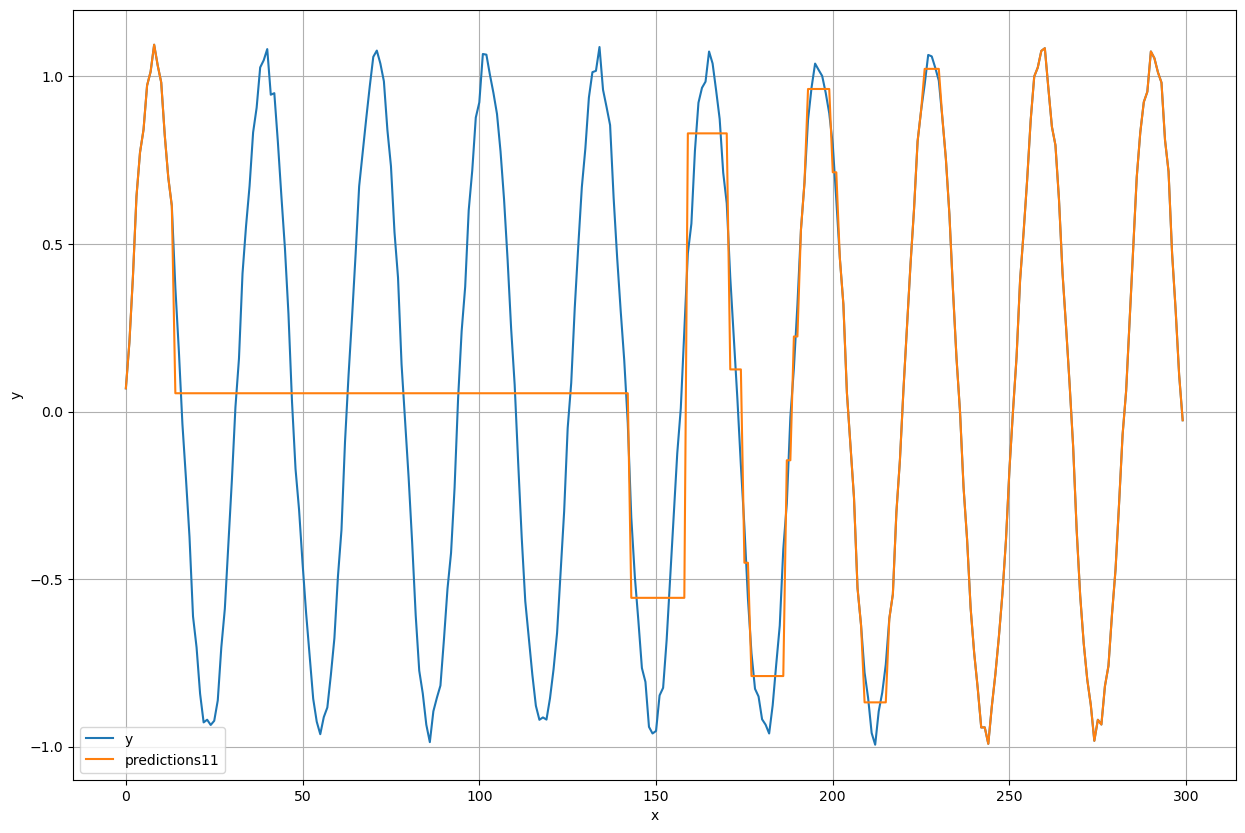

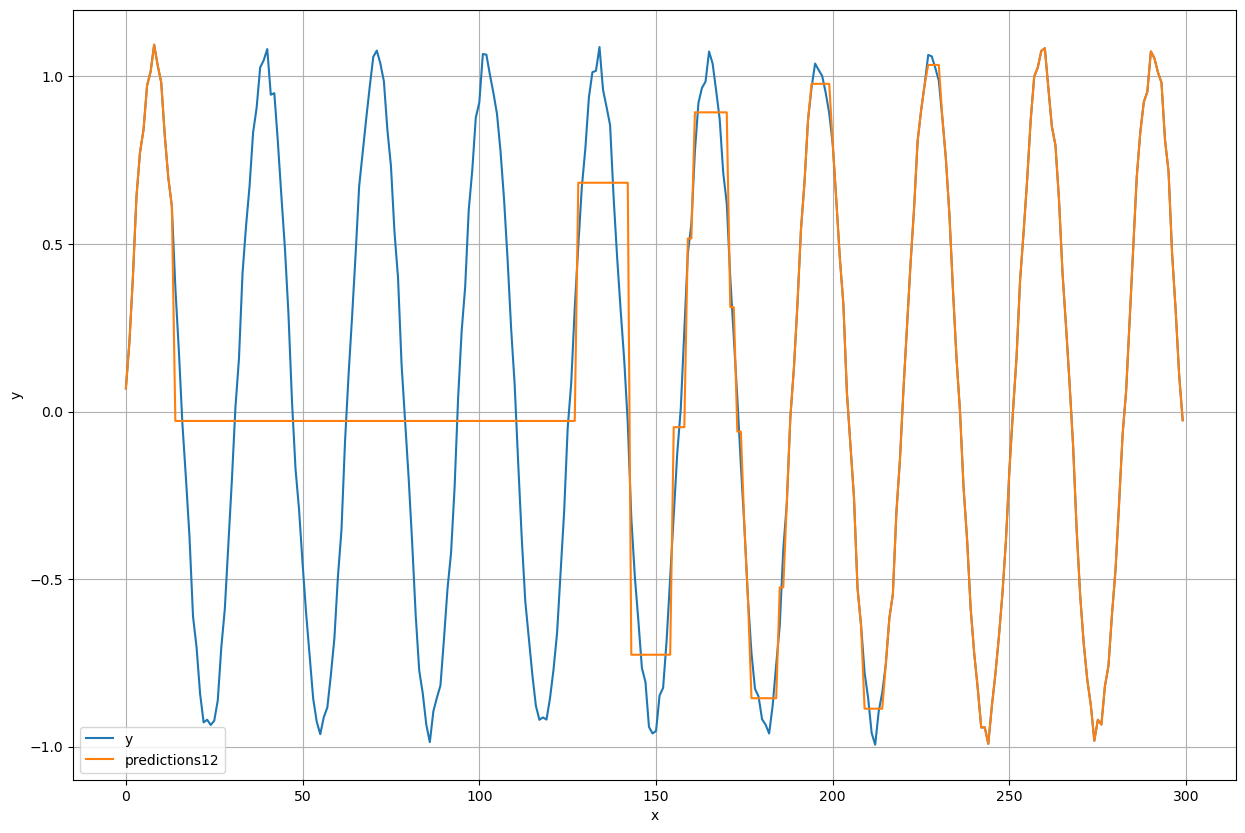

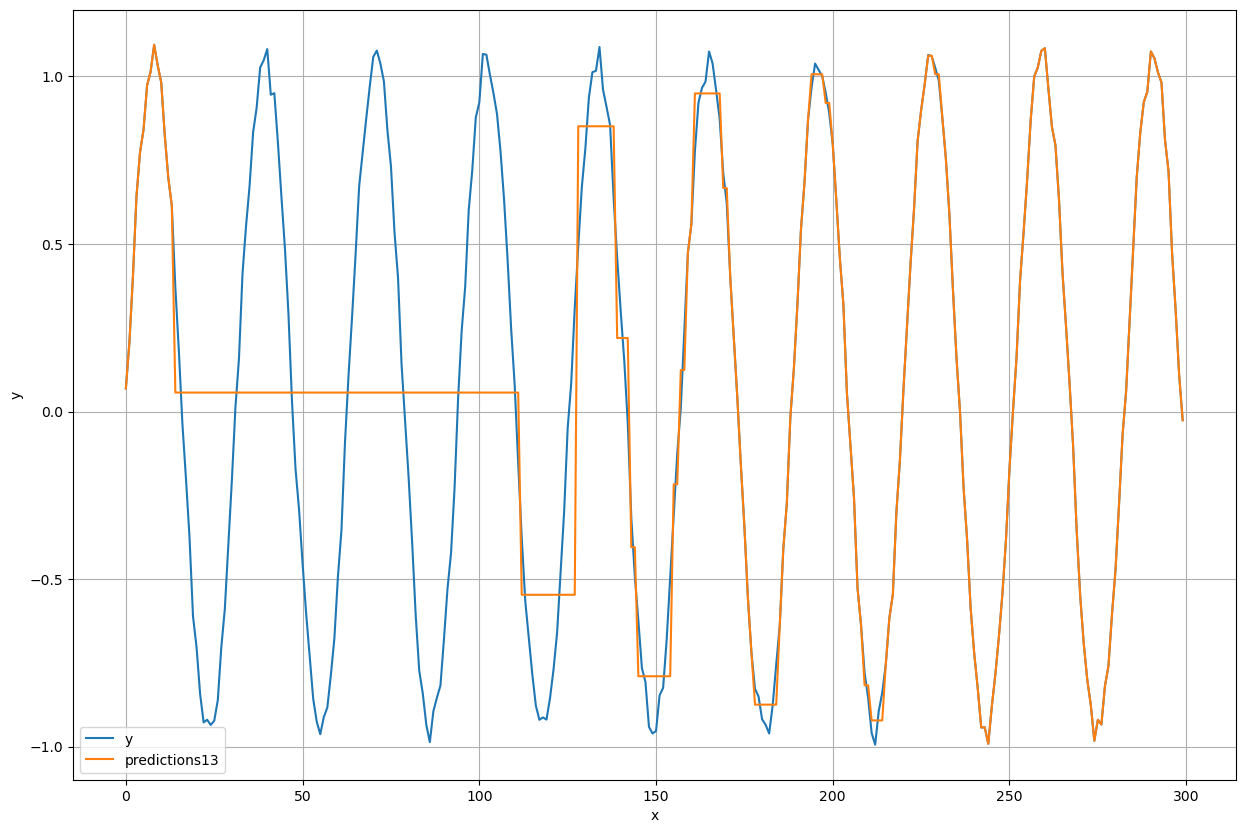

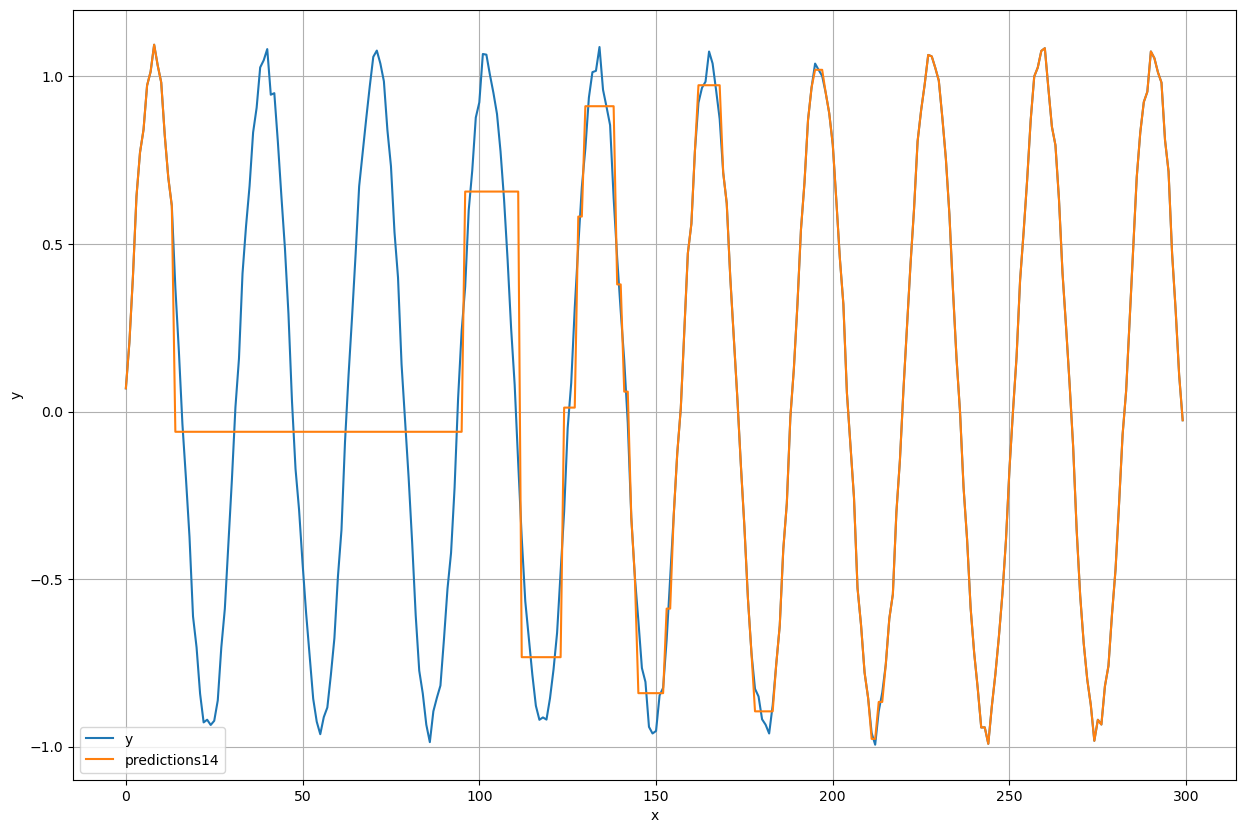

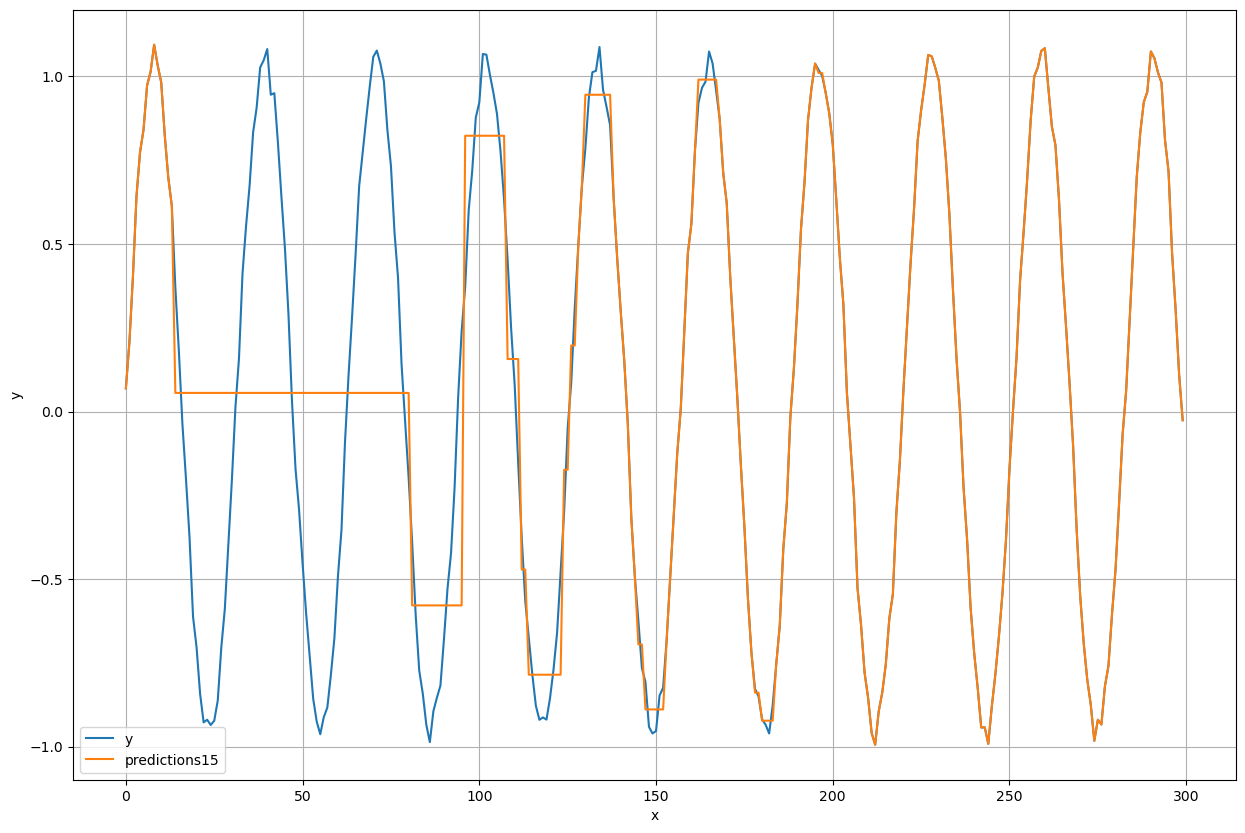

In [18]:
for i in range(15):
    plt.figure(figsize=(15, 10))
    plt.plot(y,label = 'y')
    plt.plot(predicts_2[i],label = f'predictions{i+1}')
    plt.grid()
    plt.ylabel(r"y")
    plt.xlabel(r"x")
    plt.legend()

In [19]:
mse_2 = []
for i in range(15):
    a = mean_squared_error(y, predicts_2[i])
    print(f"depth={i+1}",mean_squared_error(y, predicts_2[i]))
    mse_2.append(a)

depth=1 0.4782126999728545
depth=2 0.45336577591136046
depth=3 0.4305297567859056
depth=4 0.4028341093681442
depth=5 0.3782915121382313
depth=6 0.35130960731541155
depth=7 0.3258233376153984
depth=8 0.2979719599750831
depth=9 0.2742751244220825
depth=10 0.24506900825433803
depth=11 0.22064092042589412
depth=12 0.19148158421835448
depth=13 0.16886095584646355
depth=14 0.13866022027229177
depth=15 0.1160286185673353


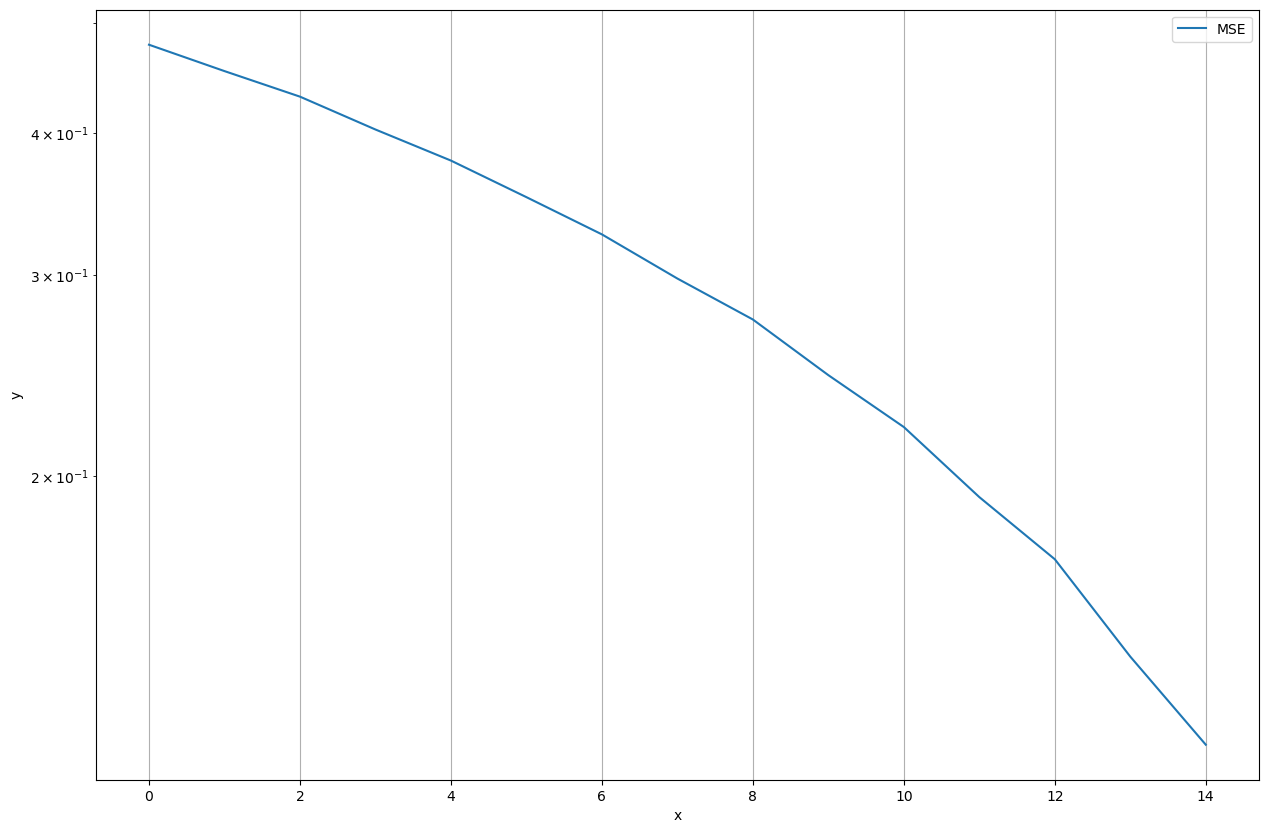

In [20]:
plt.figure(figsize=(15, 10))
plt.plot(mse_2,label = 'MSE')
plt.grid()
plt.ylabel(r"y")
plt.xlabel(r"x")
plt.legend()
plt.yscale('log')

Рассмотрим sin(20x) с большим количеством данных.

In [21]:
x_shape = 600
x = np.arange(x_shape) / 200

In [22]:
tree_2, predicts_2 = [], []
y = np.sin(20*x) + np.random.random(x_shape) / 10

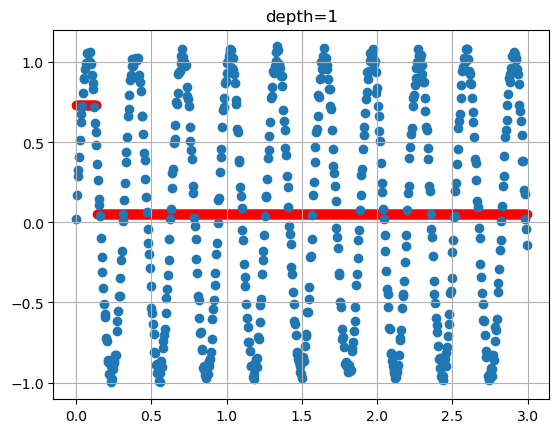

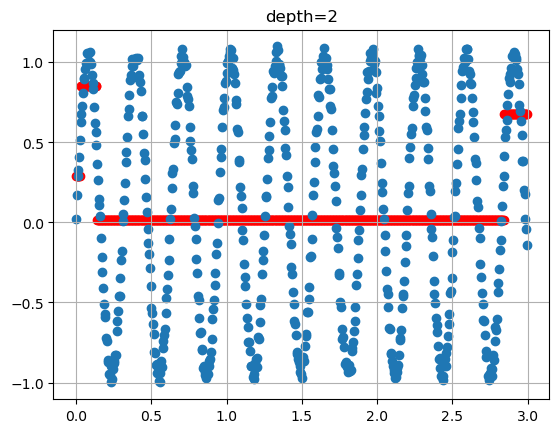

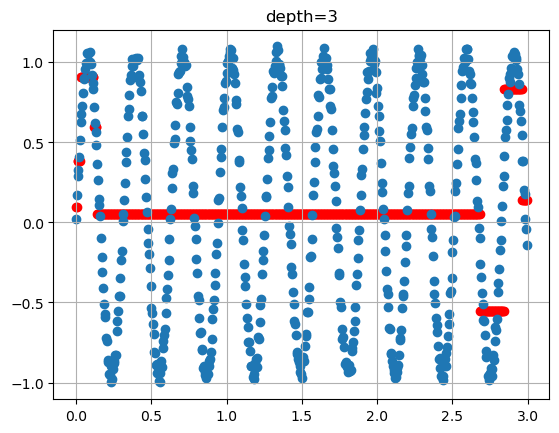

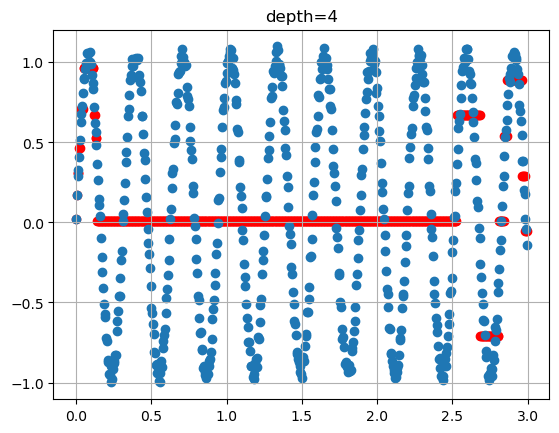

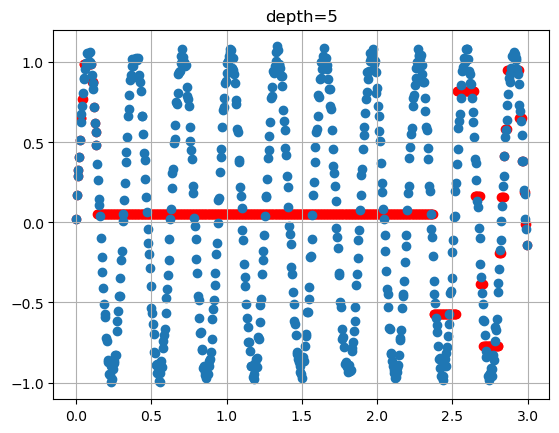

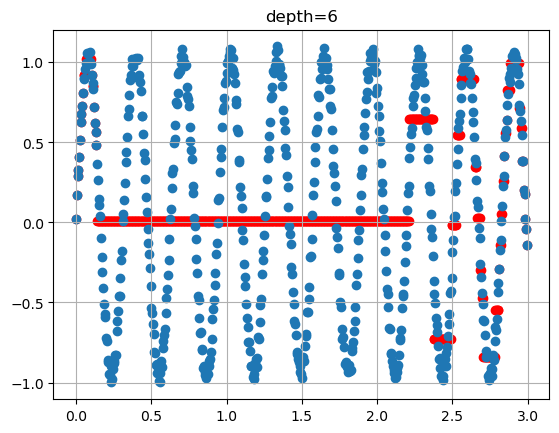

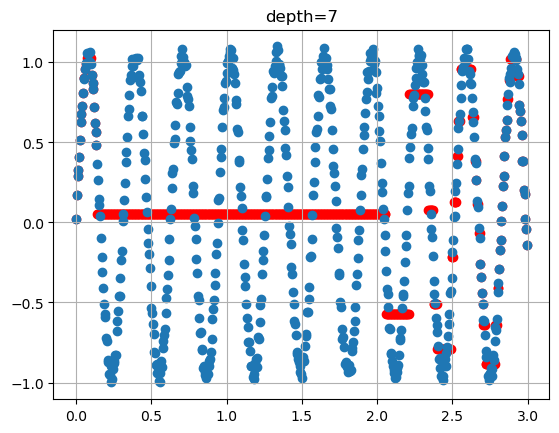

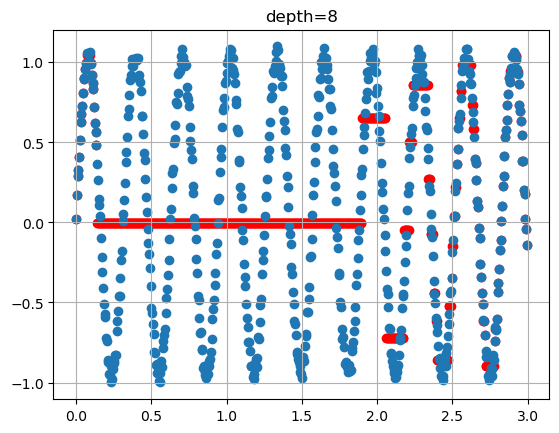

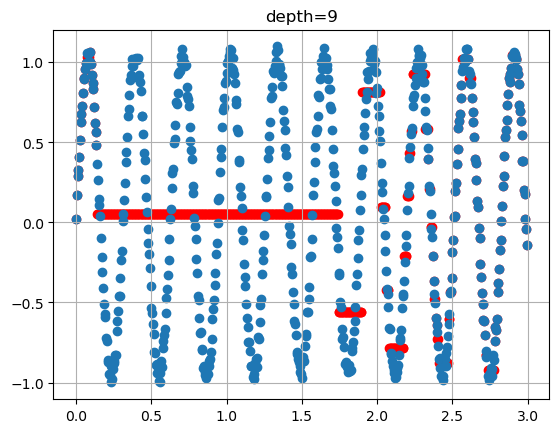

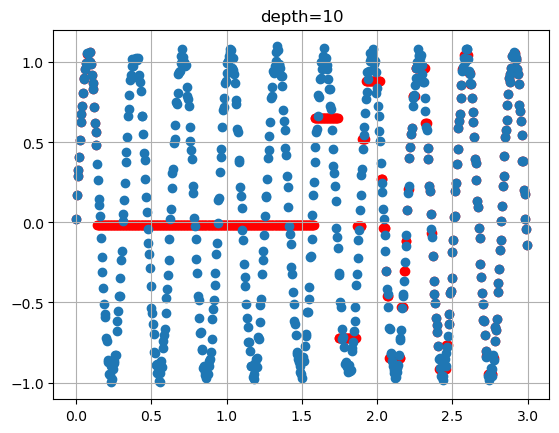

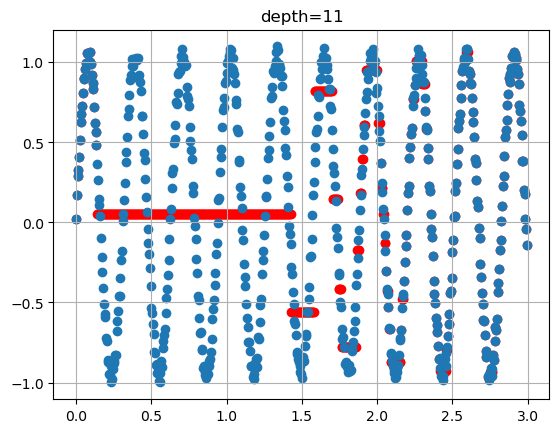

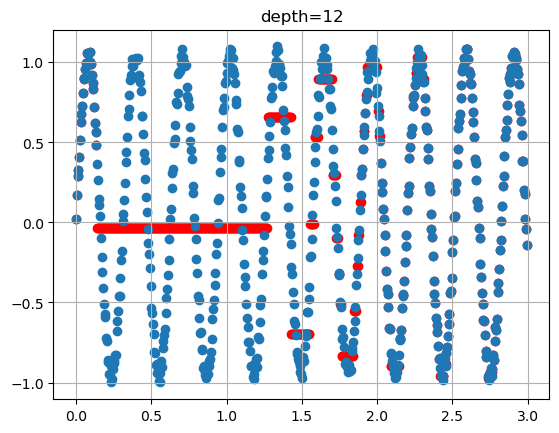

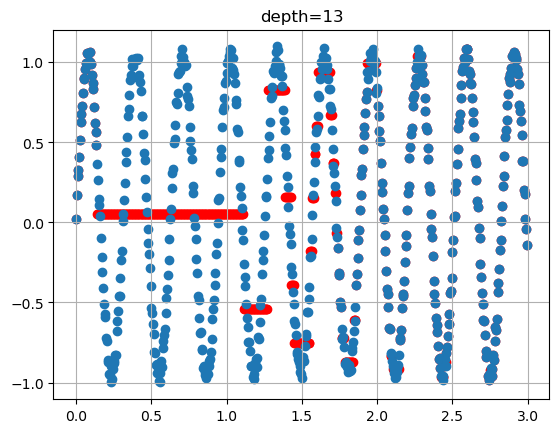

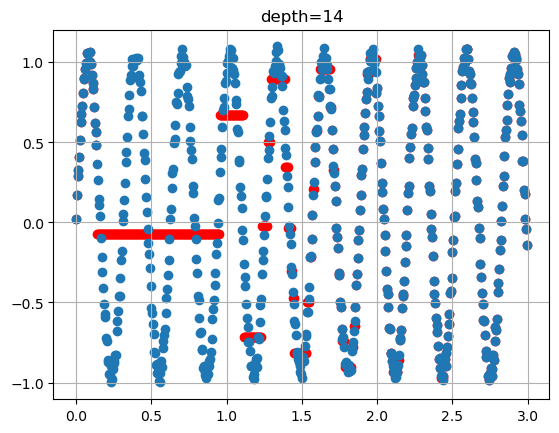

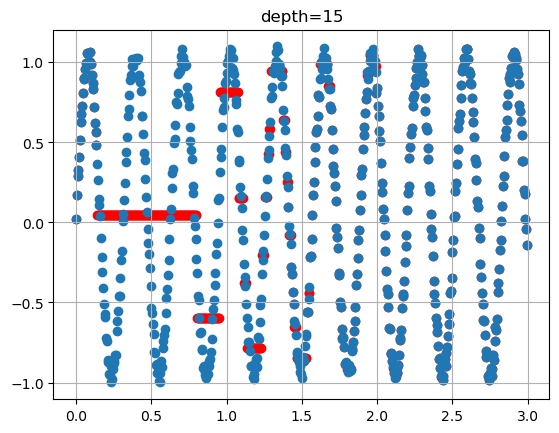

In [23]:
for i in range(15):
    reg_tree = RegressionDecisionTree (max_depth=i + 1, min_leaf_size=1)
    reg_tree.fit(x, y)
    predictions = reg_tree.predict(x)
    plt.scatter(x, predictions, color = 'red')
    plt.scatter(x, y)
    plt.grid()
    plt.title(f"depth={i+1}")
    plt.show()
    tree_2.append(reg_tree)
    predicts_2.append(predictions)

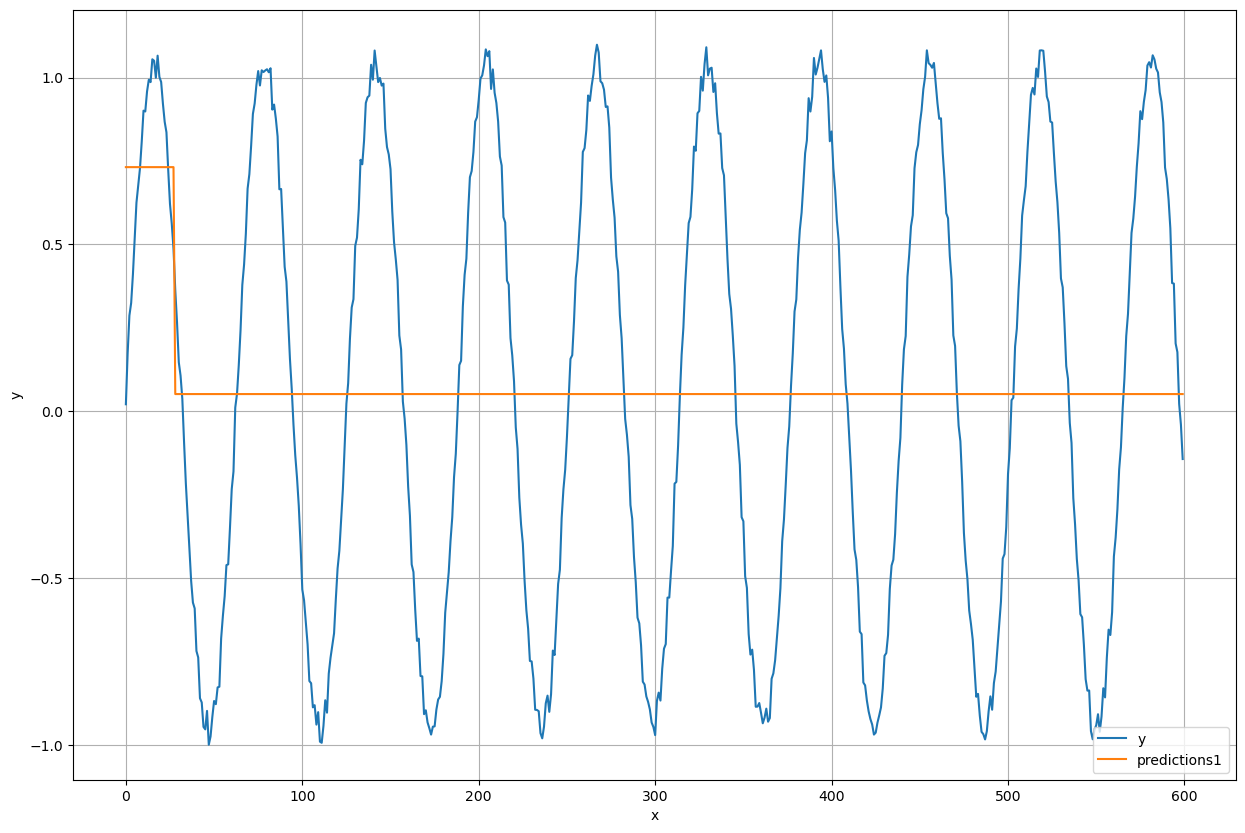

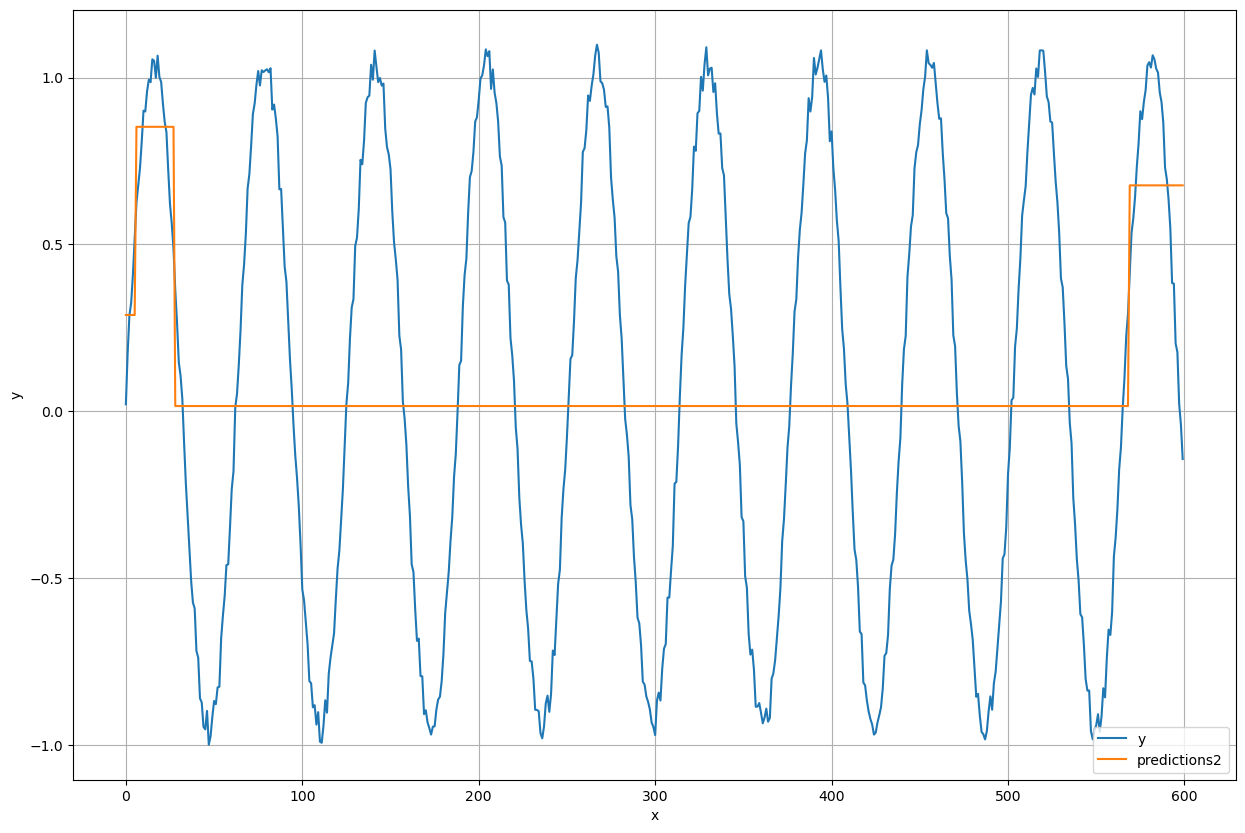

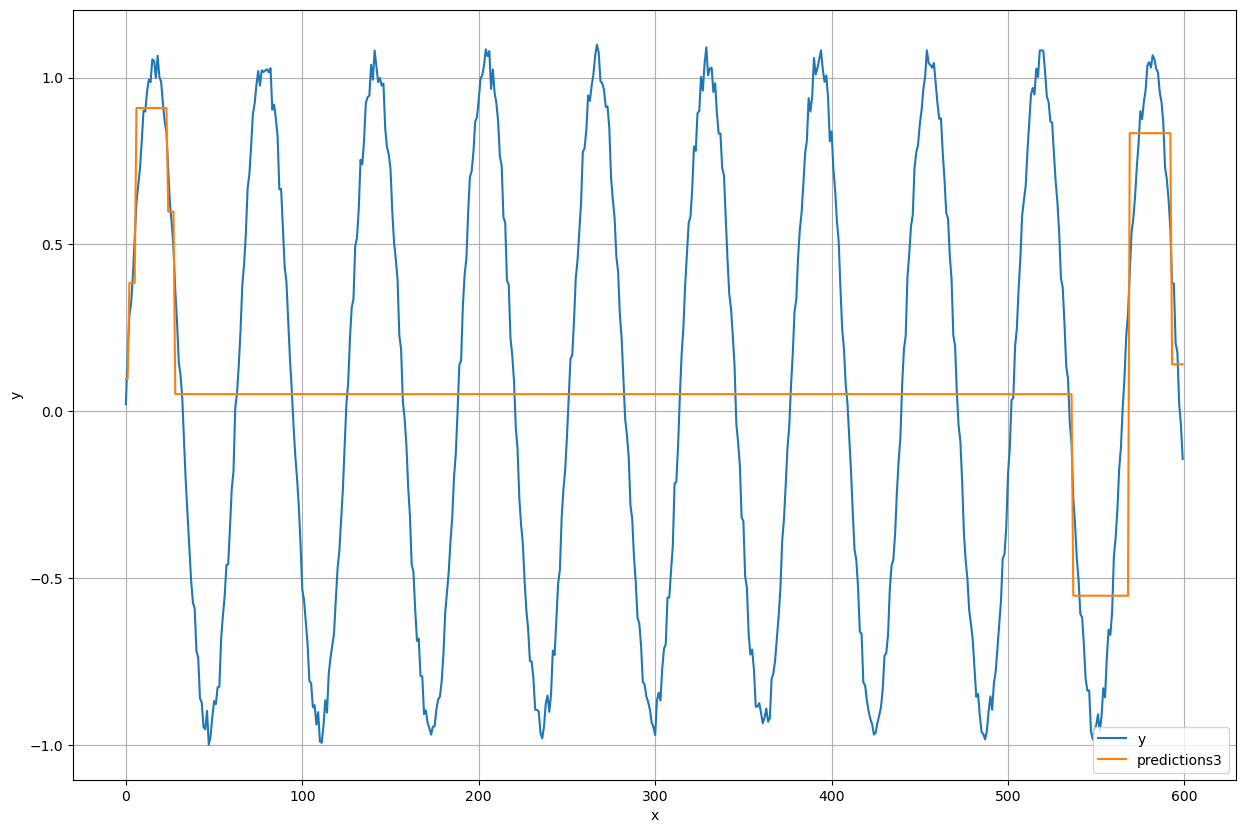

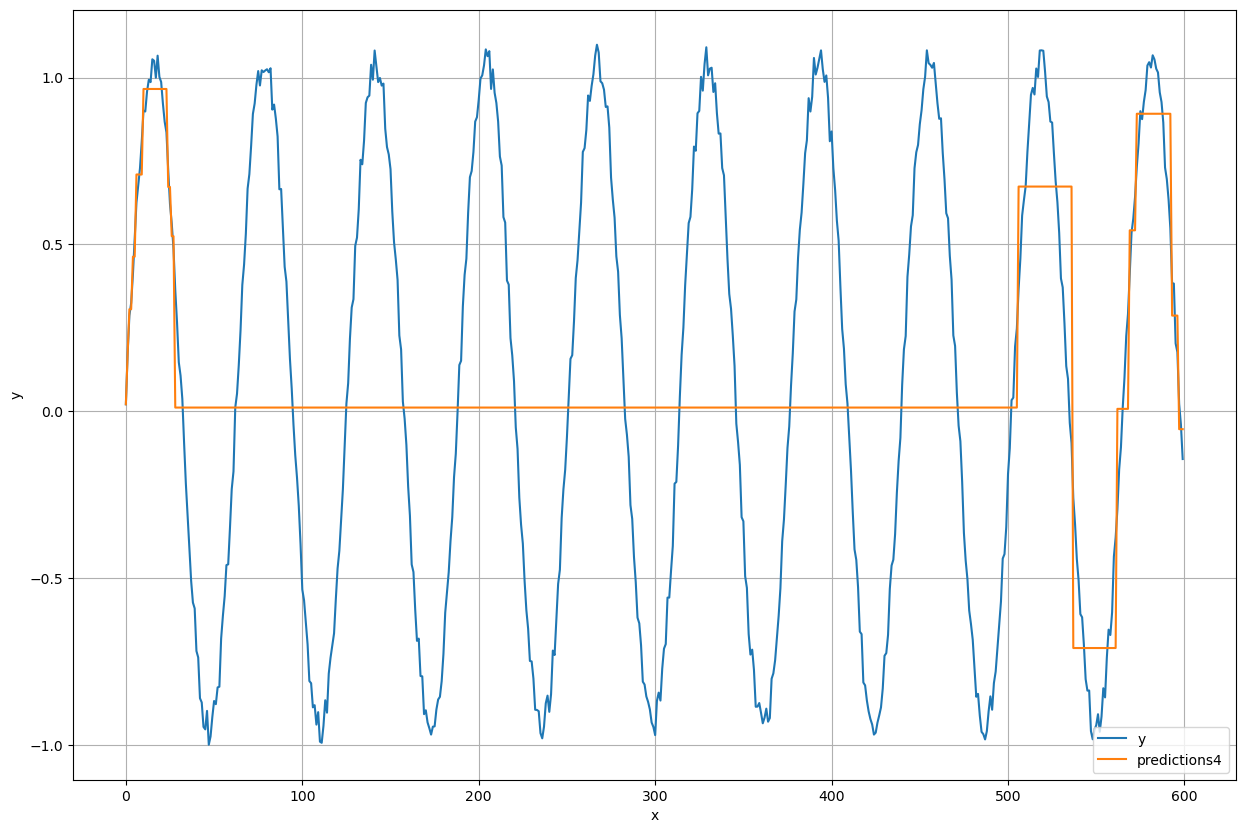

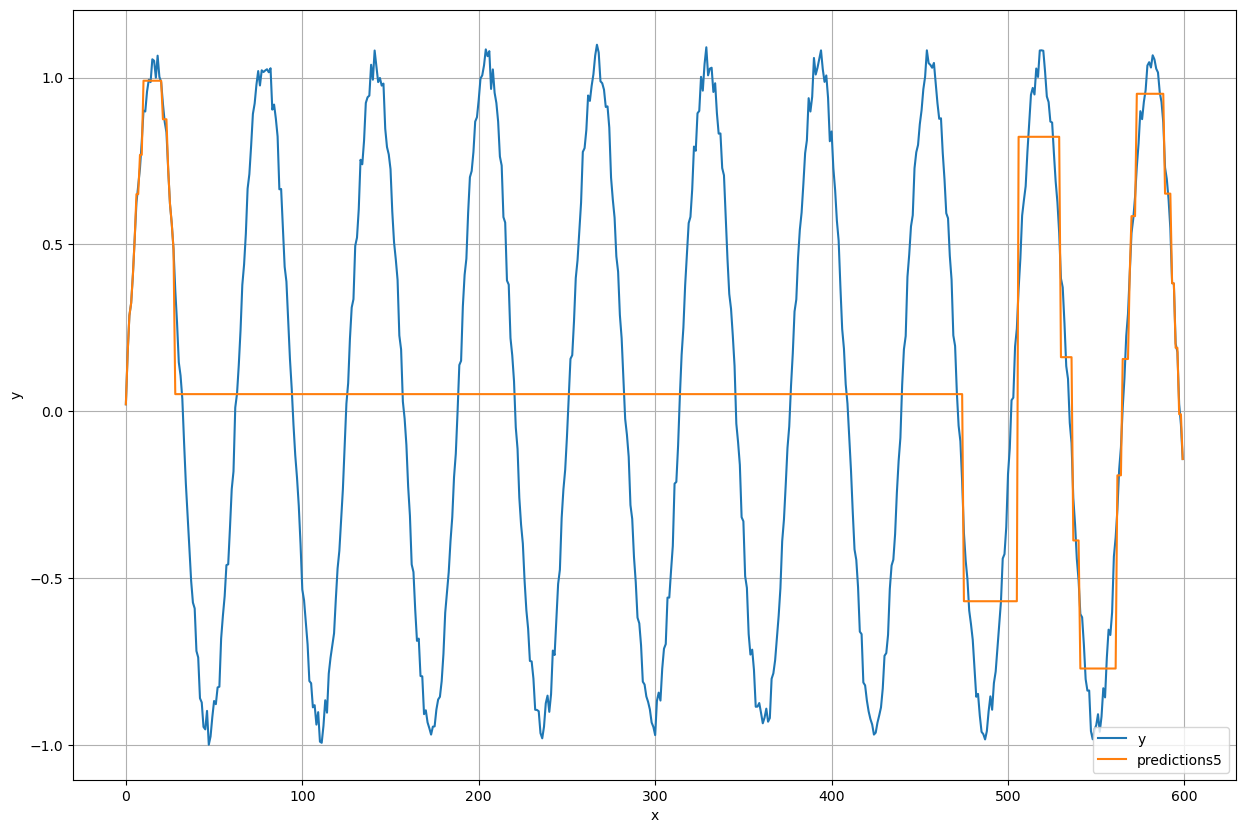

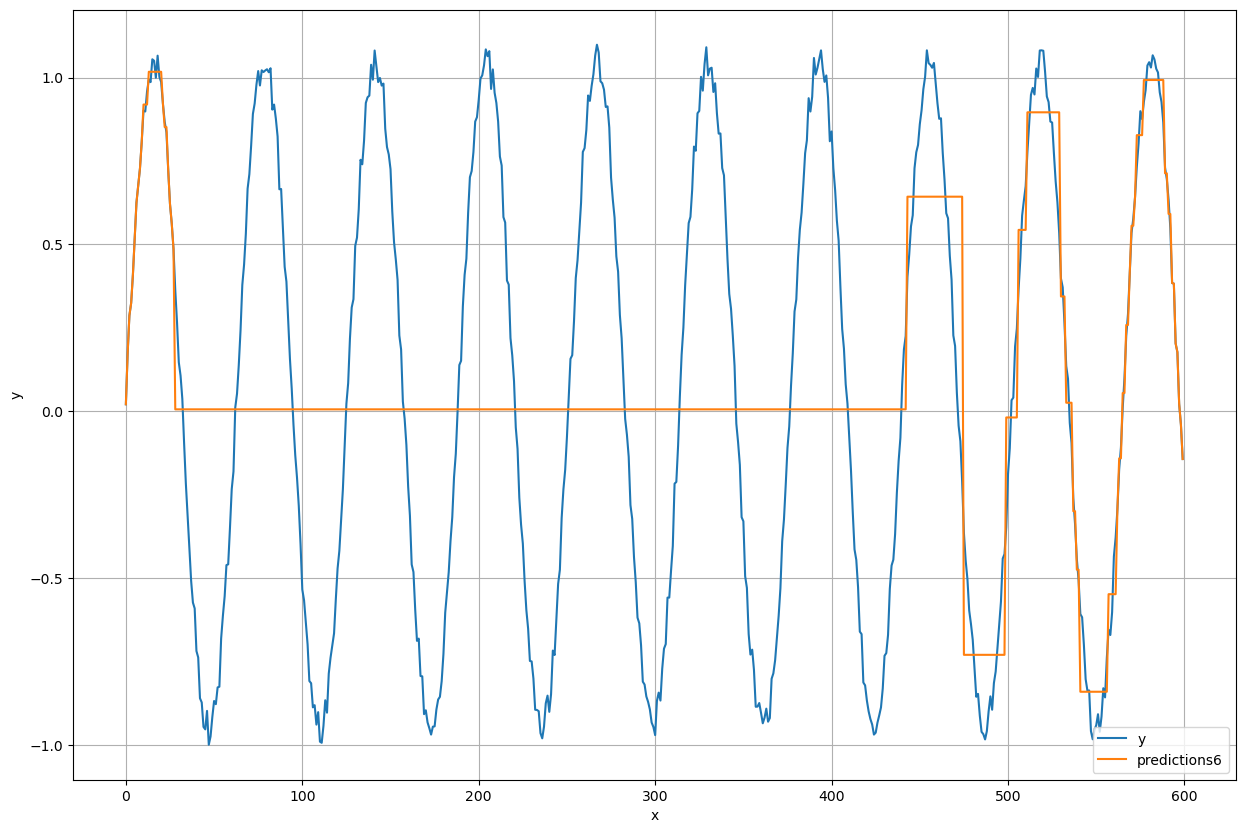

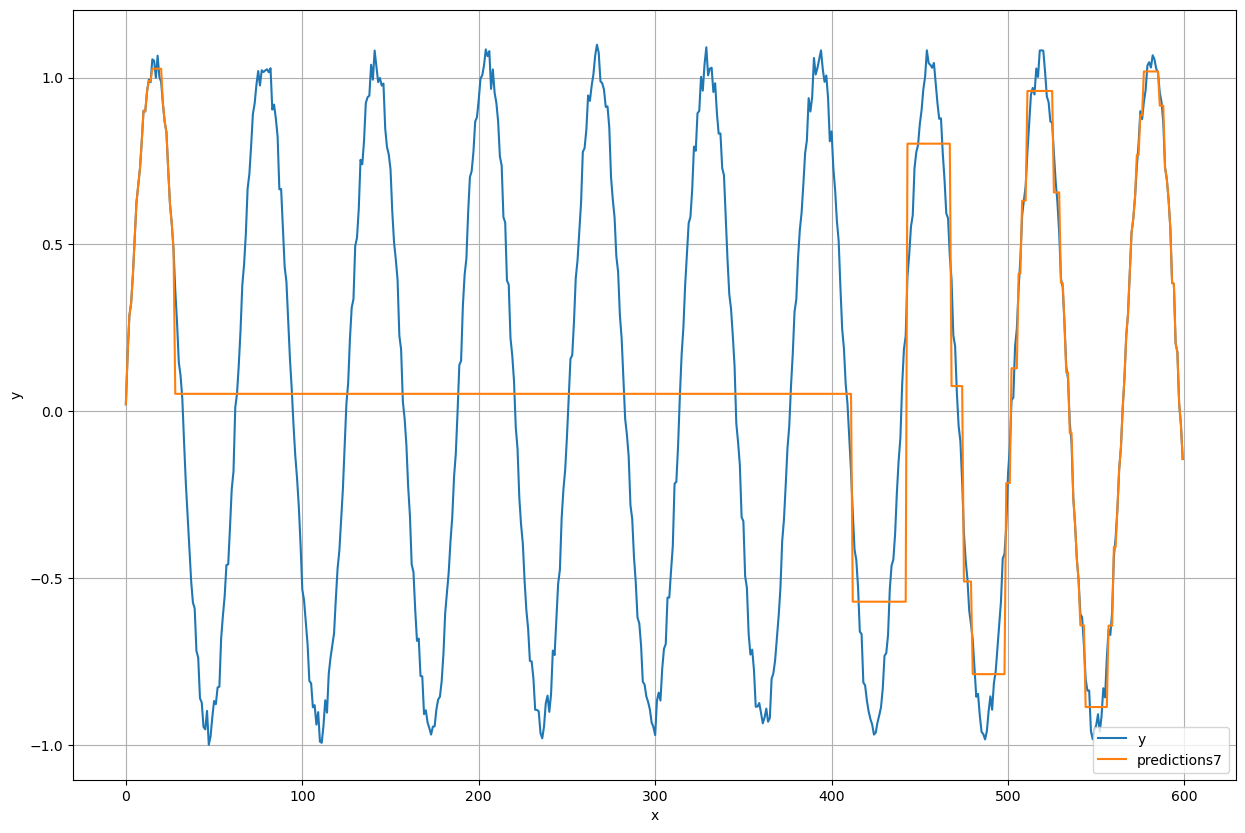

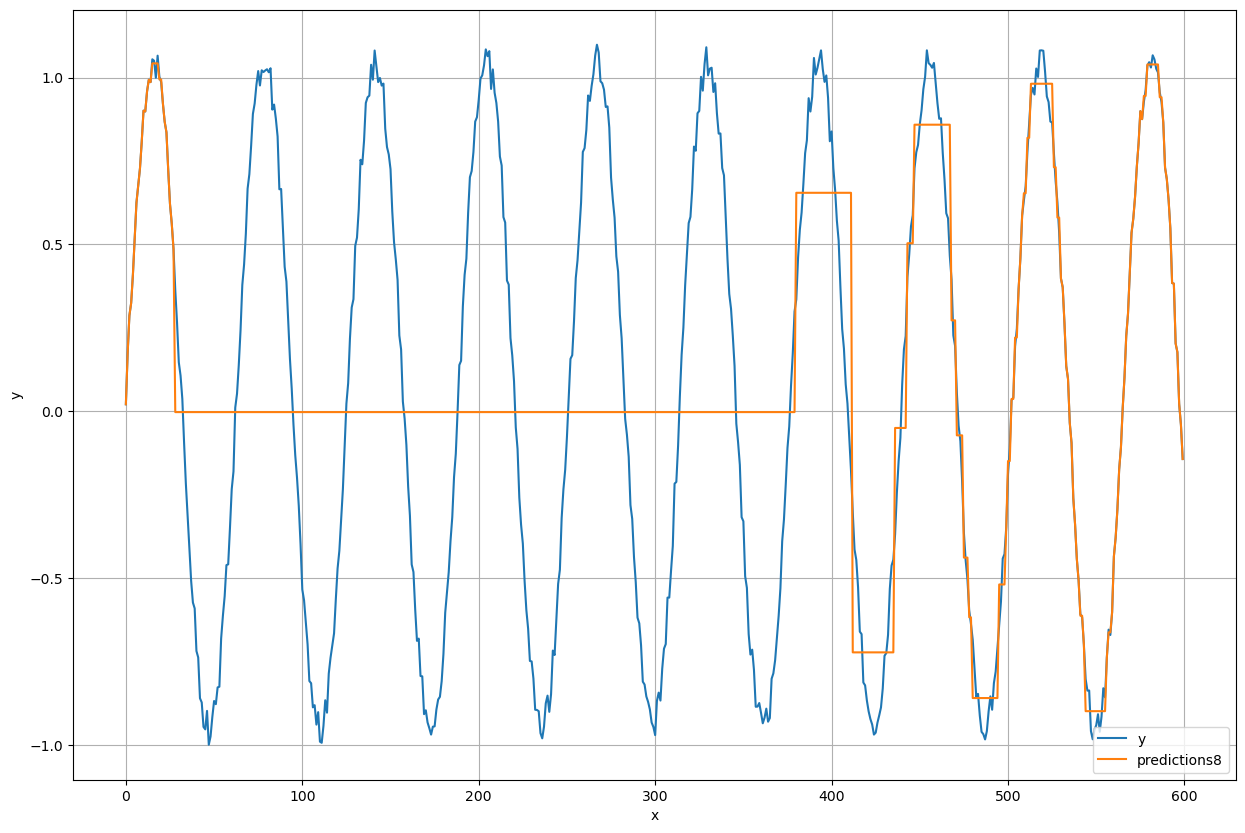

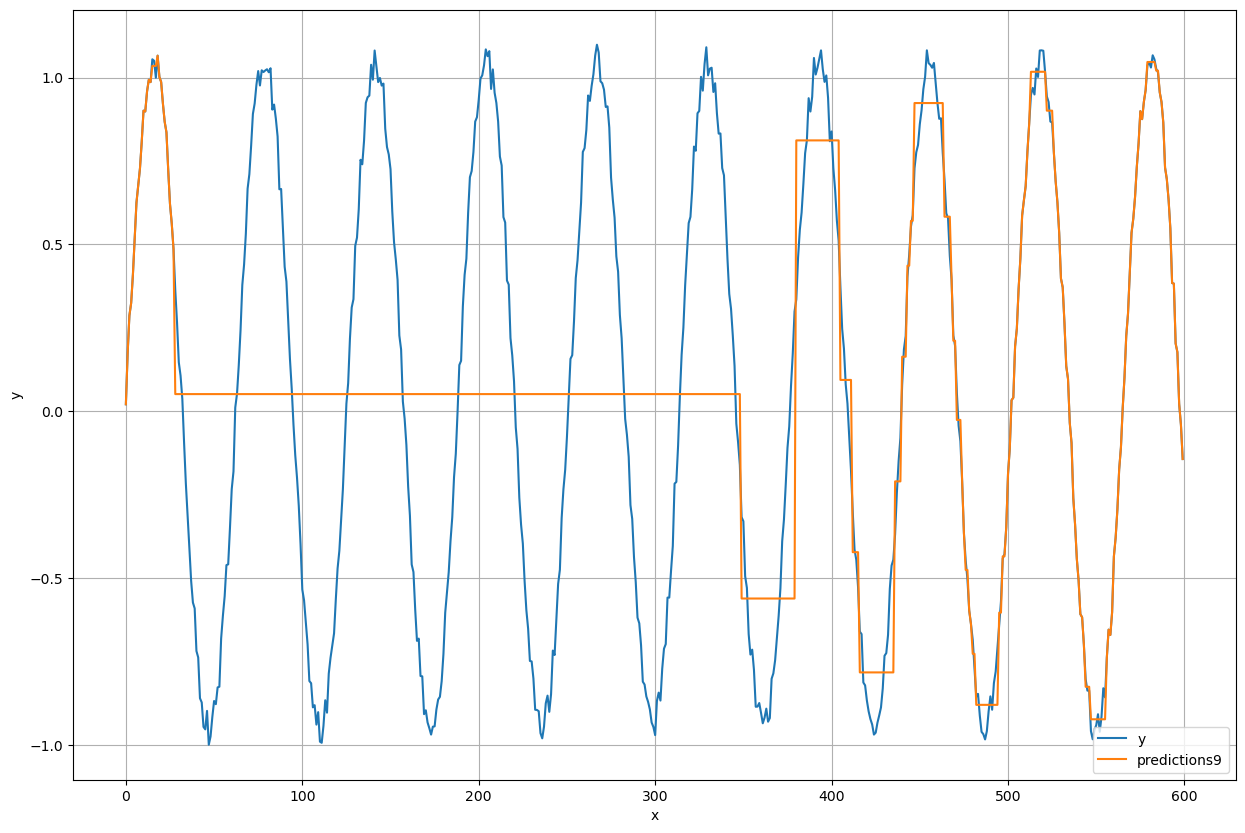

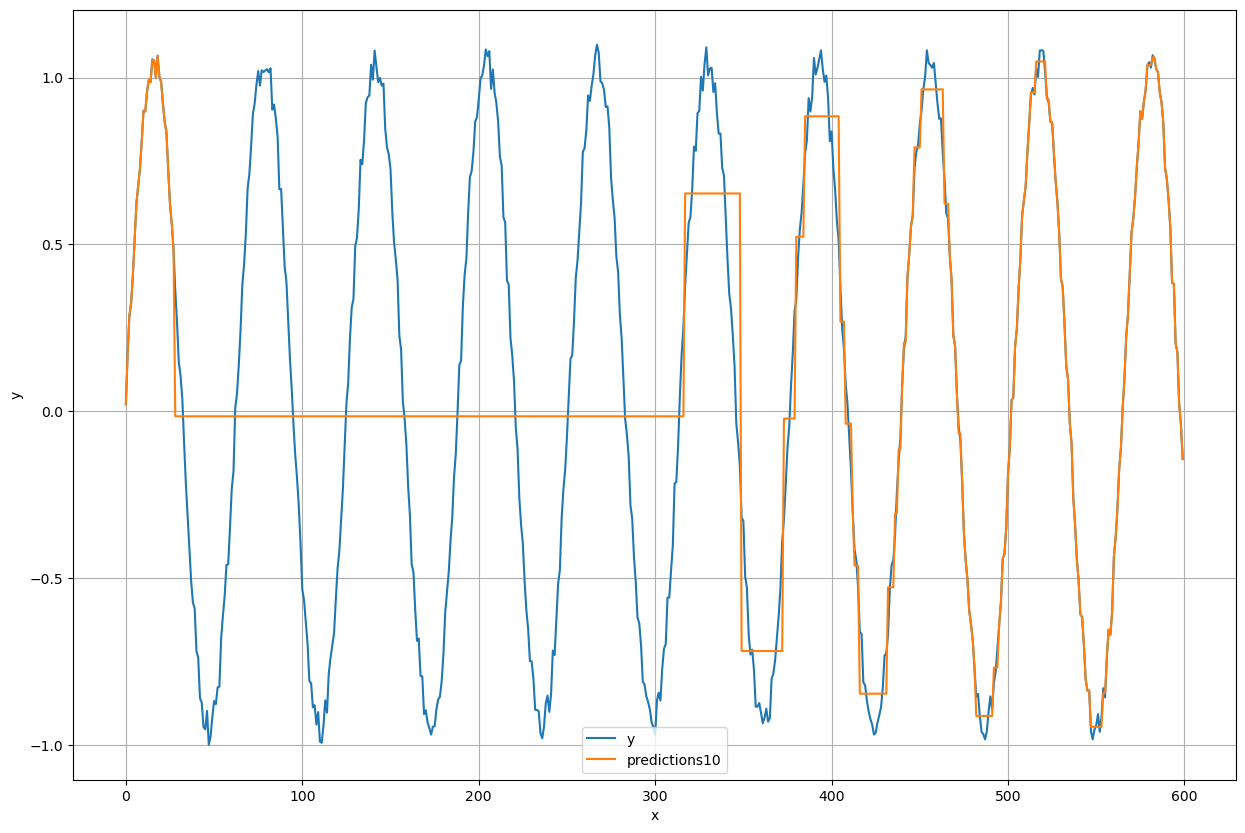

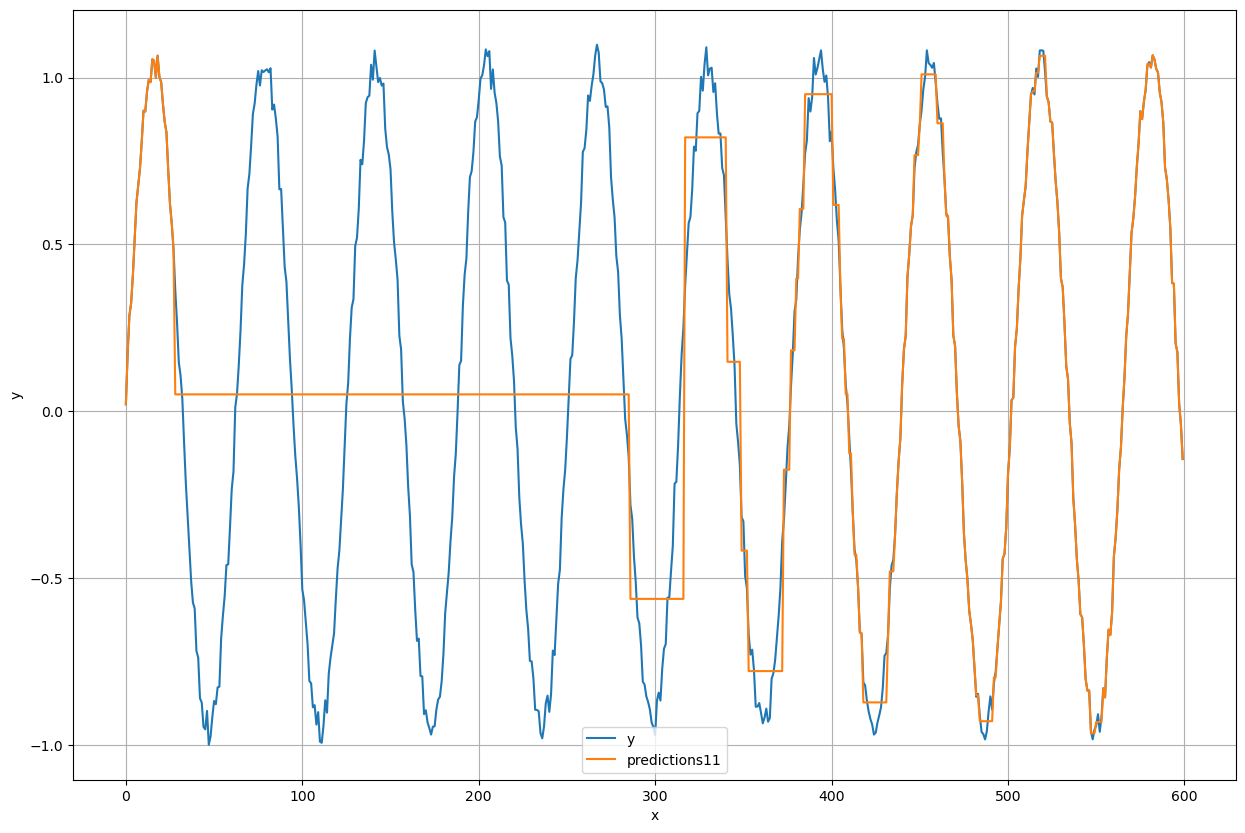

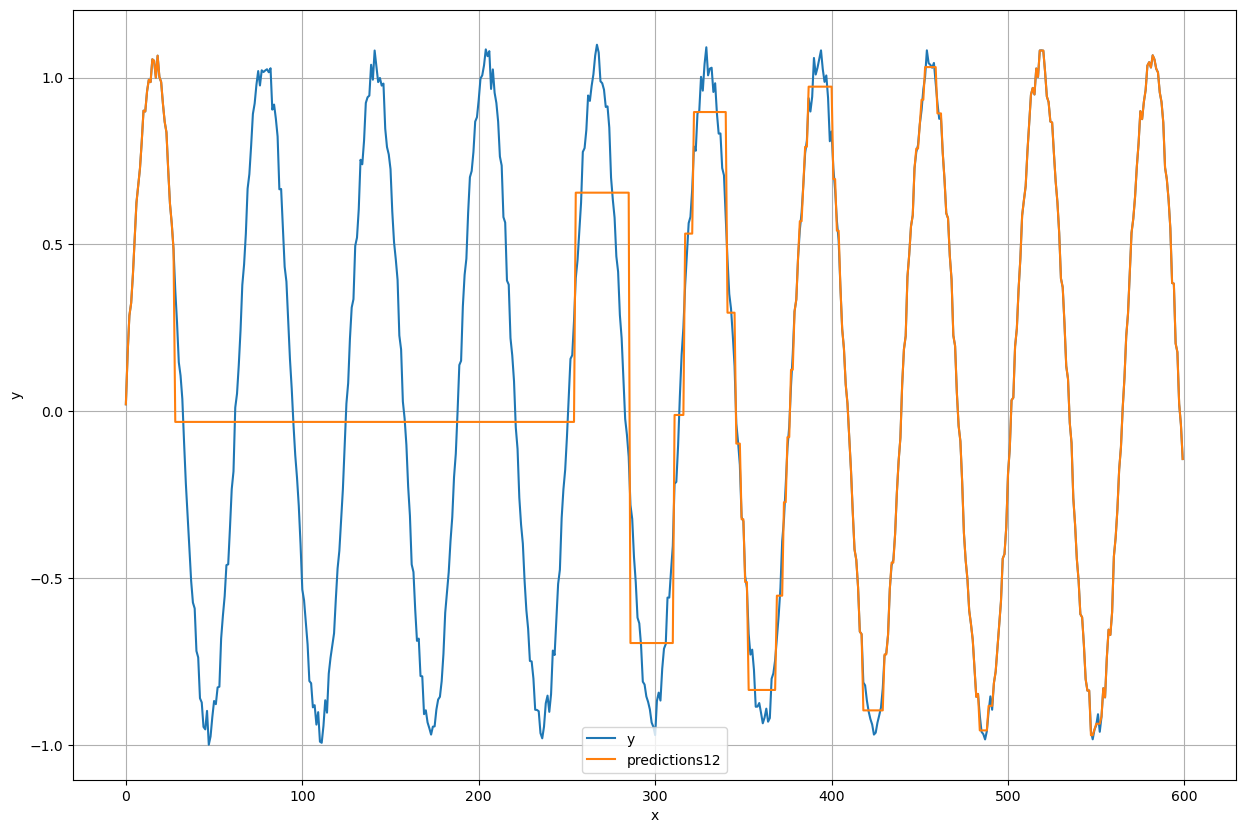

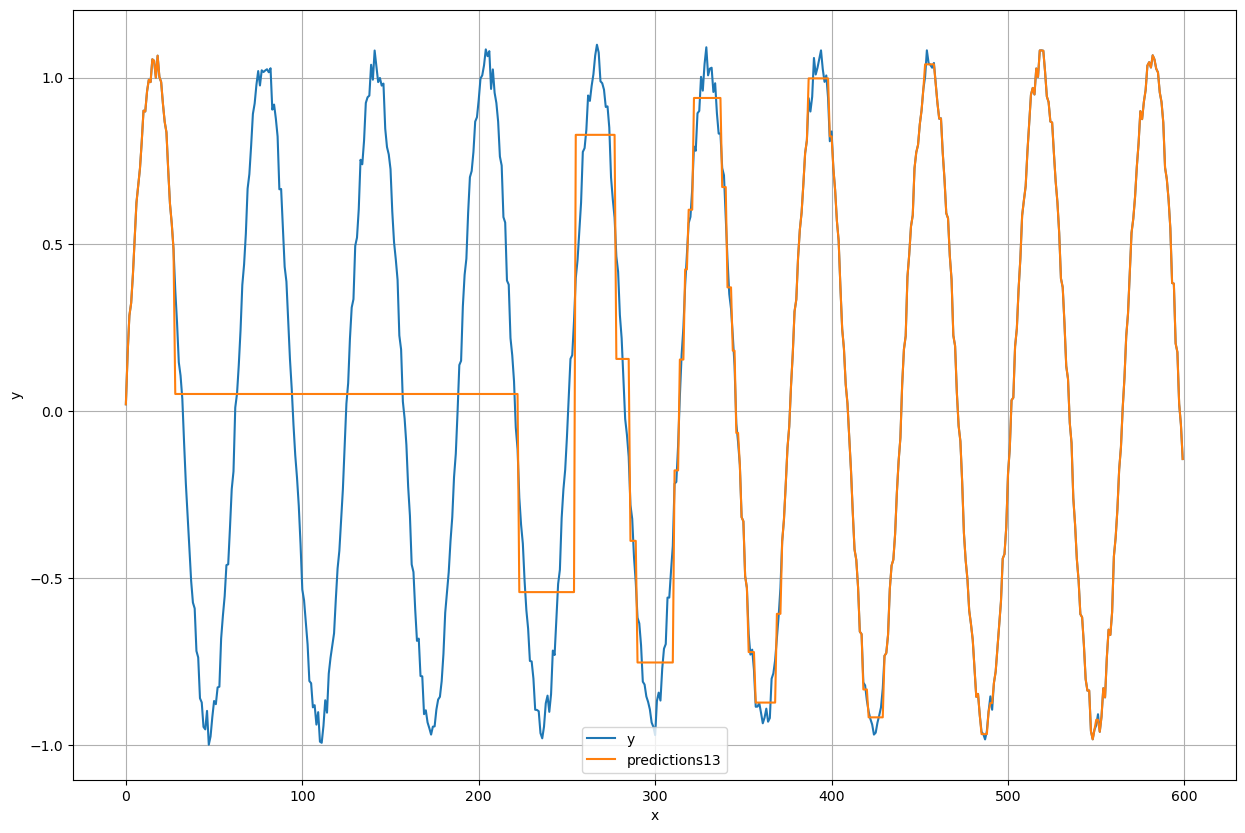

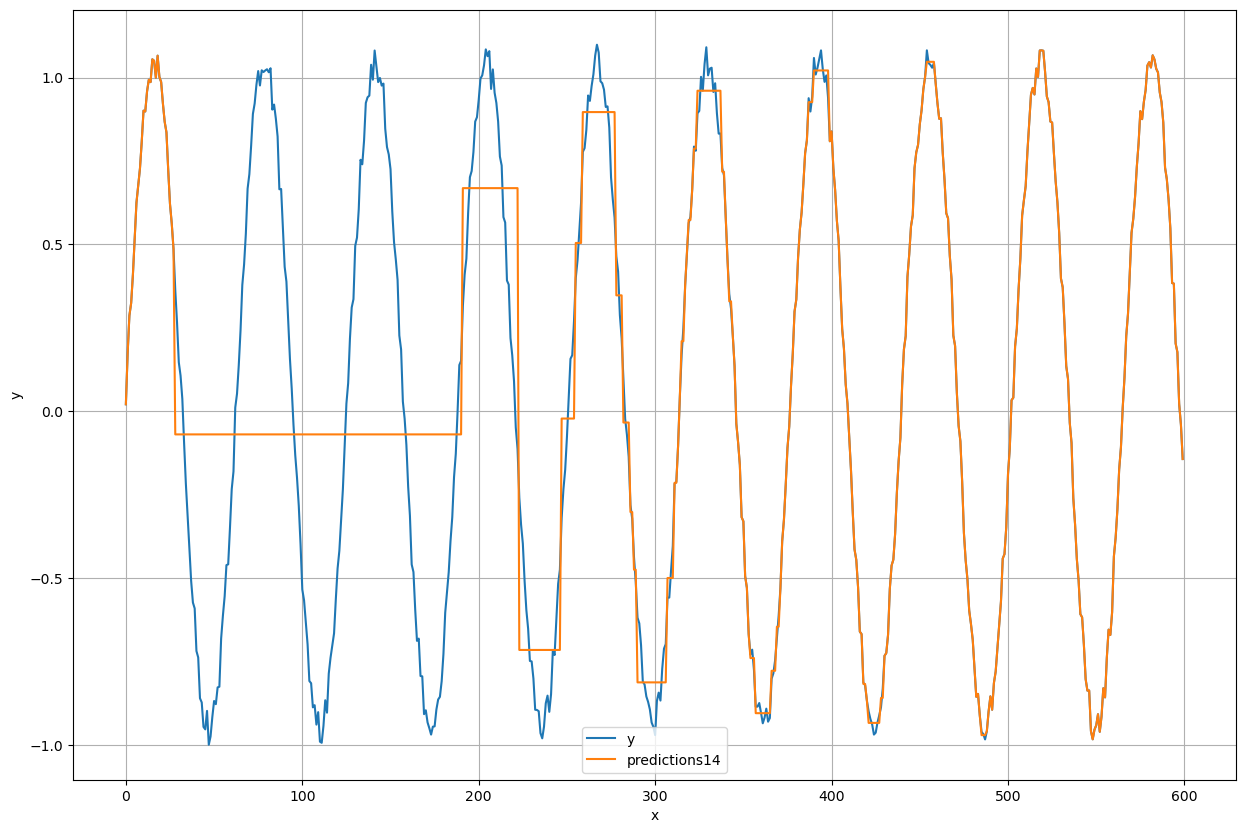

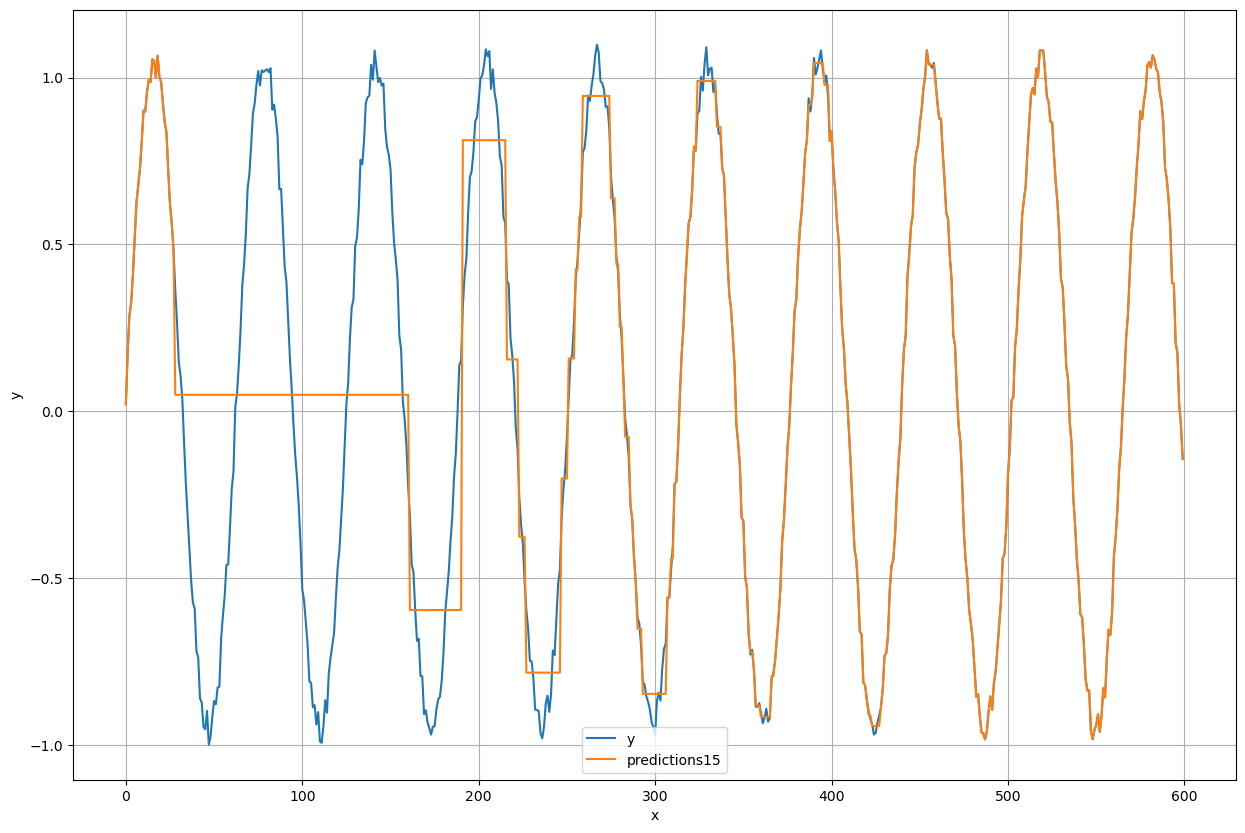

In [24]:
for i in range(15):
    plt.figure(figsize=(15, 10))
    plt.plot(y,label = 'y')
    plt.plot(predicts_2[i],label = f'predictions{i+1}')
    plt.grid()
    plt.ylabel(r"y")
    plt.xlabel(r"x")
    plt.legend()

In [25]:
mse_2 = []
for i in range(15):
    a = mean_squared_error(y, predicts_2[i])
    print(f"depth={i+1}",mean_squared_error(y, predicts_2[i]))
    mse_2.append(a)

depth=1 0.473371988211386
depth=2 0.44948578474479994
depth=3 0.42610780269675164
depth=4 0.398675978195797
depth=5 0.3742355703769431
depth=6 0.34751306860192005
depth=7 0.3221724063048889
depth=8 0.29490482690916553
depth=9 0.2703876404248525
depth=10 0.24240759339597828
depth=11 0.21833360384856523
depth=12 0.1908156618186783
depth=13 0.168383011739704
depth=14 0.13702225456512943
depth=15 0.11390008693011637


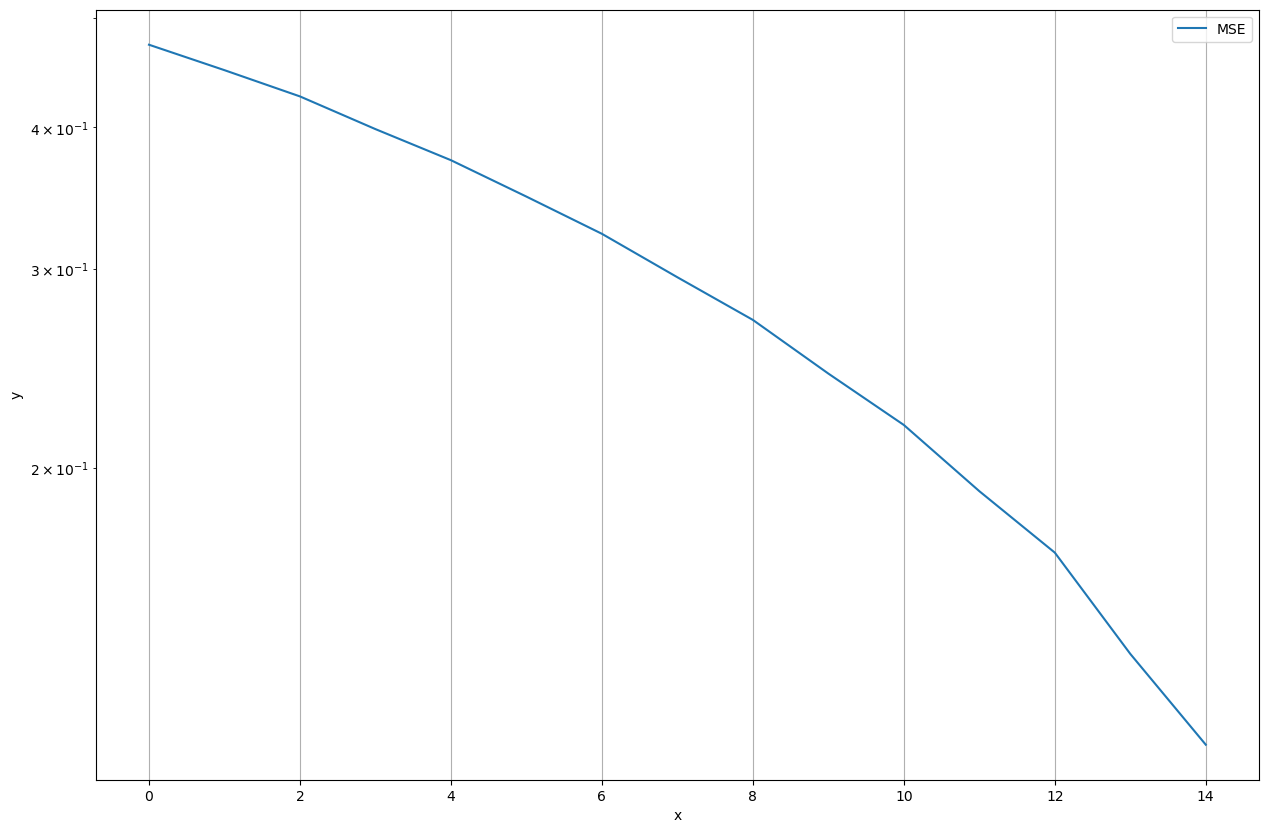

In [26]:
plt.figure(figsize=(15, 10))
plt.plot(mse_2,label = 'MSE')
plt.grid()
plt.ylabel(r"y")
plt.xlabel(r"x")
plt.legend()
plt.yscale('log')

Можно заметить, что при больших количествах данных, улучшение качества продолжается

4. (4 балла) Протестируйте различные реализации `random_forest` на `fetch_covtype` датасете (можно загрузить с помощью `sklearn.datasets.fetch_covtype`). Возможно, поможет ноутбук с семинара `ensembles_seminar.ipynb`. Для честного сравнения старайтесь использовать похожий набор гиперпараметров.
- ваша реализация (import `RandomForestClassifier as MyRandomForestClassifier` ниже)
- sklearn https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- lightgbm https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMModel.html см. параметр `boosting_type`
- xgboost https://xgboost.readthedocs.io/en/stable/tutorials/rf.html

    Что нужно сделать: 
- Разбейте данные на train и test. 
- Оцените качество алгоритмов по метрике (balanced_accuracy_score)[https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html]
- Оцените время работы `train` и `predict`
- Сделайте выводы

In [181]:
import sys
sys.path.extend(['/Users/alkrasnov/Documents/AM_ML_2_24']) # change your path

In [54]:
from sem_dt_rf.random_forest.random_forest import RandomForestClassifier as MyRandomForestClassifier

In [55]:
from sklearn.datasets import fetch_covtype
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import xgboost as xgb

In [56]:
cov_type = fetch_covtype()

In [57]:
X = cov_type['data']
y = cov_type['target']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
y_train -= 1
y_test -= 1

Проверим модели на глубине деревьев 4 и 30 деревьях

In [80]:
params1 = {
    'num_leaves': 2 ** 4,
    'min_data_in_leaf': 50,
    'objective': 'multiclass',
    'num_classes': len(np.unique(y)),
    'max_depth': 4,
    "boosting": "rf",
    "seed": 0,
    "bagging_frequency": 0.65,
    "subsample": .8,
    "subsample_freq": 1,
    "verbose": -1,
}
params2 = {
    "booster": "gbtree",
    "subsample": .632,
    "max_depth": 4,
    "num_parallel_tree": 30,
    "objective": "multi:softmax",
    "num_class": len(np.unique(y)),
    "eta":1,
    "random_state": 0,
    "n_jobs": -1,
}

In [81]:
rf = MyRandomForestClassifier(
            max_depth=4,
            n_estimators=30,
            random_state=1
        )
clf = RandomForestClassifier(n_estimators=30, max_depth=4, max_samples=0.9)

In [82]:
%%time
rf.fit(X_train, y_train)

CPU times: user 30.7 s, sys: 932 ms, total: 31.6 s
Wall time: 31.6 s


In [83]:
y_predict = rf.predict(X_test)

In [84]:
from sklearn.metrics import balanced_accuracy_score

In [85]:
balanced_accuracy_score(y_test, y_predict)

0.3893489748504918

In [86]:
%%time
clf.fit(X_train, y_train)

CPU times: user 6.04 s, sys: 20 ms, total: 6.06 s
Wall time: 6.06 s


RandomForestClassifier(max_depth=4, max_samples=0.9, n_estimators=30)

In [87]:
y_pred_skl = clf.predict(X_test)

In [88]:
balanced_accuracy_score(y_test, y_pred_skl)

0.29465599251707636

In [89]:
data1 = lgb.Dataset(data=X_train, label=y_train)

In [91]:
%%time
clf = lgb.train(params1, train_set=data1, num_boost_round=100)

CPU times: user 34.9 s, sys: 491 ms, total: 35.4 s
Wall time: 3.04 s


In [92]:
y_pred_lgb = clf.predict(X_test)

In [93]:
y_pred_ = np.argmax(y_pred_lgb,axis=1)

In [94]:
balanced_accuracy_score(y_test, y_pred_)

0.6323758408088438

In [95]:
data2 = xgb.DMatrix(X_train, label=y_train)

In [96]:
data_test = xgb.DMatrix(X_test, label=y_test)

In [97]:
%%time
bst = xgb.train(params2, data2, num_boost_round=1)

CPU times: user 35.1 s, sys: 1.28 s, total: 36.4 s
Wall time: 3.08 s


In [98]:
y_pred_bst = bst.predict(data_test)

In [99]:
balanced_accuracy_score(y_test, y_pred_bst)

0.452148932295755

Можно заметить, что lightgbm обучается быстрее всех, при этом имеет наилучшую точность. xgboost обучается почти также быстро, но имеет точность хуже. Почему-то наша реализация имеет гораздо большую точность, чем реализация из sklearn, зоть и обучается сильно медленнее, чем она.

Проверим на 100 деревьях глубины 5

In [116]:
rf100 = MyRandomForestClassifier(
            max_depth=5,
            n_estimators=100,
            random_state=1
        )
clf100 = RandomForestClassifier(n_estimators=100, max_depth=5, max_samples=0.9)

In [117]:
%%time
rf100.fit(X_train, y_train)

CPU times: user 2min 2s, sys: 3.68 s, total: 2min 6s
Wall time: 2min 6s


In [118]:
y_predict_100 = rf100.predict(X_test)

In [119]:
balanced_accuracy_score(y_test, y_predict_100)

0.4285054551994582

In [120]:
%%time
clf100.fit(X_train, y_train)

CPU times: user 26.2 s, sys: 4.1 ms, total: 26.2 s
Wall time: 26.2 s


RandomForestClassifier(max_depth=5, max_samples=0.9)

In [121]:
y_pred_skl_100 = clf100.predict(X_test)

In [122]:
balanced_accuracy_score(y_test, y_pred_skl_100)

0.30313422540308865

In [123]:
params2_100 = {
    "booster": "gbtree",
    "subsample": .632,
    "max_depth": 5,
    "num_parallel_tree": 100,
    "objective": "multi:softmax",
    "num_class": len(np.unique(y)),
    "eta":1,
    "random_state": 0,
    "n_jobs": -1,
}

In [124]:
%%time
bst = xgb.train(params2_100, data2, num_boost_round=1)

CPU times: user 2min 7s, sys: 4.87 s, total: 2min 12s
Wall time: 11.4 s


In [125]:
y_pred_bst_100 = bst.predict(data_test)

In [126]:
balanced_accuracy_score(y_test, y_pred_bst_100)

0.5046239954670335

Наша реализация неплохое улучшение и обучалась в 4 раза дольше. xgboost тоже обучалась в 4 раза дольше и получила неплохое улучшение. А реализация sklearn получила мнимальное улучшение.

In [127]:
params1_100 = {
    'num_leaves': 2 ** 5,
    'min_data_in_leaf': 50,
    'objective': 'multiclass',
    'num_classes': len(np.unique(y)),
    'max_depth': 5,
    "boosting": "rf",
    "seed": 0,
    "bagging_frequency": 0.65,
    "subsample": .8,
    "subsample_freq": 1,
    "verbose": -1,
}

In [128]:
%%time
clf = lgb.train(params1_100, train_set=data1, num_boost_round=100)

CPU times: user 1min 3s, sys: 1.98 s, total: 1min 5s
Wall time: 5.83 s


In [129]:
y_pred_lgb_100 = clf.predict(X_test)

In [130]:
y_pred_100 = np.argmax(y_pred_lgb_100,axis=1)

In [131]:
balanced_accuracy_score(y_test, y_pred_100)

0.6769827443631992

lightgbm тоже получило неплохое улучшение при глубине деревьев 5